# **New York City Yellow Taxi Data**

***SUBMISSION BY : JAYDEEP CHAKRAVARTY***


## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
from IPython.core.pylabtools import figsize
from matplotlib.pyplot import xticks
# Install Libraries with desired version
%pip install numpy == 1.26.4 pandas == 2.2.2 matplotlib == 3.10.0 seaborn == 0.13.2
%pip install fastparquet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [358]:
# Import warnings
import warnings

warnings.filterwarnings("ignore")


In [359]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [360]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [361]:
# Try loading one file
df = pd.read_parquet('datasets/trip_records/2023-1.parquet')
display(df.head())
display(df.info())

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

None

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [362]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [363]:
# from google.colab import drive
# drive.mount('/content/drive')

In [364]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# FINDING - There are 12 parquet files, but they don't correspond to a month each.
# Each file can contain -
#   - data for more than one month - [This can be safely ignored]
#   - can also contain data for years other than 2023 [This is important to filter out]

import os

DATASET_PATH = os.path.join(os.getcwd(), 'datasets/trip_records')  # path to the dataset
file_list = os.listdir(DATASET_PATH)  # list of parquet files
df = pd.DataFrame()  # empty dataframe to hold results

SAMPLE_PERCENTAGE = 0.05  # 5% data sampling
RANDOM_SEED = 2857  # an arbitrary number to be used as seed consistently across this code


def read_sample_for_hour(hour: int, dframe: pd.DataFrame):
    """ Function to sample 5% of the data for the given hour """
    hour_data = dframe[dframe.pickup_hour == hour]
    return hour_data.sample(frac=SAMPLE_PERCENTAGE, random_state=RANDOM_SEED)


def read_sample_for_all_hours(dframe: pd.DataFrame):
    """ Function to sample 5% of the data from each hour """
    sampled_data = pd.DataFrame()
    for hour in range(24):  # Iterate through each hour of the selected date
        sample = read_sample_for_hour(hour, dframe)  # Sample 5% of the hourly data randomly
        sampled_data = pd.concat([sampled_data, sample])
    return sampled_data


def process_file(file_name: str):
    """ Function to process a single file """
    df_f = pd.DataFrame()  # hold all samples of the current file
    try:
        if not file_name.endswith('.parquet'):  # ignore non-parquet files, if any and return empty dataframe
            return pd.DataFrame()
        file_path = os.path.join(DATASET_PATH, file_name)

        # Reading the current file
        print("Reading file:", file_name)
        df_cur_file = pd.read_parquet(file_path)

        # filter-out 2023 year's data only
        df_cur_file = df_cur_file[df_cur_file.tpep_pickup_datetime.dt.year == 2023]

        # create column for filtering
        df_cur_file['pickup_hour'] = df_cur_file.tpep_pickup_datetime.dt.hour

        for day in df_cur_file.tpep_pickup_datetime.dt.date.unique():  # Loop through dates
            # get sample for each hour and add to the dataframe holding all sample data
            df_day = read_sample_for_all_hours(df_cur_file[df_cur_file.tpep_pickup_datetime.dt.date == day])
            df_f = pd.concat([df_f, df_day])

        return df_f
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")


# list of all dataframes for all sampled data
df_list = []
# iterate through the list of files and sample one by one:
for file_name in file_list:
    df_list.append(process_file(file_name))

# Concatenate the sampled data of all the dates to a single dataframe
df_sd = pd.concat(df_list)


Reading file: 2023-12.parquet
Reading file: 2023-6.parquet
Reading file: 2023-7.parquet
Reading file: 2023-5.parquet
Reading file: 2023-11.parquet
Reading file: 2023-10.parquet
Reading file: 2023-4.parquet
Reading file: 2023-1.parquet
Reading file: 2023-8.parquet
Reading file: 2023-9.parquet
Reading file: 2023-2.parquet
Reading file: 2023-3.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [365]:
# verify 5% sampling -
total_rows = 0
for file_name in file_list:
    df_t = pd.read_parquet(os.path.join(DATASET_PATH, file_name))
    total_rows += df_t[df_t.tpep_pickup_datetime.dt.year == 2023].shape[0]
print(f"Total Data Rows of 2023 : {total_rows}")
print(f"Total Sampled rows : {df_sd.shape[0]} which is {round(df_sd.shape[0] / total_rows * 100, 2)}%")

Total Data Rows of 2023 : 37928457
Total Sampled rows : 1896399 which is 5.0%


In [366]:
# Store the df in csv/parquet
df_sd.to_parquet('output/sampled_data.parquet')
# df_sd.to_csv('output/sampled_data.csv', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [724]:
# Load the new data file
df = pd.read_parquet('output/sampled_data.parquet')

In [725]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
index                                                                           
559             2  2023-12-01 00:08:12   2023-12-01 00:21:54              1.0   
3196648         2  2023-12-01 00:00:08   2023-12-01 00:23:43              NaN   
2876            2  2023-12-01 00:10:28   2023-12-01 00:21:14              1.0   
850             1  2023-12-01 00:49:36   2023-12-01 01:02:21              1.0   
323             2  2023-12-01 00:18:12   2023-12-01 00:32:04              2.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
index                                                                 
559               2.66         1.0                  N           163   
3196648           5.18         NaN               None           232   
2876              2.06         1.0                  N            48   
850               2.70         1.0                  N           114   
323               3.36         1.0                  N            79   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
index                                ...                               
559               158             1  ...    1.0      0.5        3.98   
3196648           236             0  ...    0.0      0.5        0.00   
2876              249             1  ...    1.0      0.5        3.56   
850               256             1  ...    3.5      0.5        4.25   
323               161             1  ...    1.0      0.5        4.40   

         tolls_amount  improvement_surcharge  total_amount  \
index                                                        
559               0.0                    1.0         23.88   
3196648           0.0                    1.0         27.70   
2876              0.0                    1.0         21.36   
850               0.0                    1.0         25.55   
323               0.0                    1.0         26.40   

         congestion_surcharge  Airport_fee  pickup_hour  airport_fee  
index                                                                 
559                       2.5          0.0            0          NaN  
3196648                   NaN          NaN            0          NaN  
2876                      2.5          0.0            0          NaN  
850                       2.5          0.0            0          NaN  
323                       2.5          0.0            0          NaN  

[5 rows x 21 columns]

In [726]:
print(df.columns.tolist())
df.info()

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour', 'airport_fee']
<class 'pandas.core.frame.DataFrame'>
Index: 1896399 entries, 559 to 3207278
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount 

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [727]:
# Fix the index and drop any columns that are not needed

# We'll handle the airport_fee columns in the next section (2.1.2)
# Columns to Drop :
# - store_and_fwd_flag = This is not required for analysis because whether trip record was held in vehicle's memory, is irrelevant for our analysis.

df.drop('store_and_fwd_flag', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

# updated columns :
print("\nUpdated columns:", df.columns.tolist())
print(f"Shape : {df.shape}")
df.info()



Updated columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour', 'airport_fee']
Shape : (1896399, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896399 entries, 0 to 1896398
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64    

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [728]:
# First Check if the values of Airport_fee and airport_fee column differs anywhere (except for when either of them is null)
mask = (df['Airport_fee'] != df['airport_fee']) & (df['Airport_fee'].notna()) & (df['airport_fee'].notna())
print("No conflicting values found." if not mask.any() else "Conflicting values found.")


No conflicting values found.


In [729]:
# Combine the two airport fee columns
# Given values are not conflicting, we safely combine them by picking non-null value from both columns
df['airport_fee'] = df['Airport_fee'].combine_first(df['airport_fee'])
# now drop one of the columns and reset index
df = df.drop('Airport_fee', axis=1)
df.reset_index(drop=True, inplace=True)


In [730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896399 entries, 0 to 1896398
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  pickup_hour            int32         
 18  airport_fee           

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [731]:
# check where values of fare amount are negative
if df[df.fare_amount < 0].empty:
    print("No negative fare amounts found")
else:
    print("Negative fare amounts found")


No negative fare amounts found


Did you notice something different in the `RatecodeID` column for above records?

In [732]:
# Analyse RatecodeID for the negative fare amounts
# - No Negative fare amounts were found so analysing their RatecodeID is not needed

In [733]:
# Find which columns have negative values
# list all numeric columns of df that has negative values
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
negative_cols = df[numeric_cols][df[numeric_cols] < 0].any()
print("Columns with negative values:")
for col in negative_cols[negative_cols].index:
    print(f"{col} : {df[col][df[col] < 0].unique()}")



Columns with negative values:
extra : [-1.5 -2.5]
mta_tax : [-0.5  -0.05]
improvement_surcharge : [-1.]
total_amount : [-4.   -3.25 -2.25 -1.5  -1.   -3.5  -2.75 -5.75 -5.25 -1.05]
congestion_surcharge : [-2.5]
airport_fee : [-1.75 -1.25]


In [734]:
# review the negative value columns
df.extra.value_counts()

extra
 0.00     763669
 2.50     462022
 1.00     364073
 5.00     133546
 3.50     106220
           ...  
 7.00          1
 0.77          1
 0.02          1
-1.50          1
 14.25         1
Name: count, Length: 61, dtype: int64

In [735]:
df.mta_tax.value_counts()

mta_tax
 0.50    1878090
 0.00      18152
-0.50         81
 0.80         56
 0.05         17
 4.00          2
-0.05          1
Name: count, dtype: int64

In [736]:
df.improvement_surcharge.value_counts()

improvement_surcharge
 1.0    1894243
 0.3       1210
 0.0        854
-1.0         92
Name: count, dtype: int64

In [737]:
df.congestion_surcharge.value_counts()

congestion_surcharge
 2.5    1688161
 0.0     138864
-2.5         56
 1.0          2
Name: count, dtype: int64

In [738]:
df.airport_fee.value_counts()

airport_fee
 0.00    1666487
 1.75     120828
 1.25      39742
-1.75         14
-1.25         12
Name: count, dtype: int64

In [739]:
# fix these negative values
for col in negative_cols[negative_cols].index:
    df[col] = df[col].abs()



In [740]:
# verify no columns with negative values now -
negative_cols = df[numeric_cols][df[numeric_cols] < 0].any()
for col in negative_cols[negative_cols].index:
    print(f"{col} : {df[col][df[col] < 0].unique()}")

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [741]:
# Find the proportion of missing values in each column
def missing_values_proportion(df):
    """ Function to find the proportion of missing values in each column """
    missing_values = df.isnull().mean()

    # Filter columns with missing values
    missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

    # Display as percentages
    if len(missing_values) > 0:
        print("Columns with missing values and proportion :")
        for col, prop in missing_values.items():
            print(f"{col}: {prop:.4f} ({prop * 100:.2f}%)")
    else:
        print("No missing values found in any column.")


# print current missing values proportion
missing_values_proportion(df)

Columns with missing values and proportion :
passenger_count: 0.0366 (3.66%)
RatecodeID: 0.0366 (3.66%)
congestion_surcharge: 0.0366 (3.66%)
airport_fee: 0.0366 (3.66%)


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [742]:
# Display the rows with null values
print("Rows with null values in passenger_count:")
df[df['passenger_count'].isnull()]

Rows with null values in passenger_count:


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1               2  2023-12-01 00:00:08   2023-12-01 00:23:43              NaN   
14              1  2023-12-01 00:04:14   2023-12-01 00:25:16              NaN   
21              1  2023-12-01 00:34:01   2023-12-01 00:51:36              NaN   
45              2  2023-12-01 00:12:00   2023-12-01 00:26:00              NaN   
54              1  2023-12-01 00:06:34   2023-12-01 00:16:07              NaN   
...           ...                  ...                   ...              ...   
1896295         2  2023-06-30 23:55:11   2023-07-01 00:14:45              NaN   
1896329         2  2023-06-30 23:28:49   2023-06-30 23:52:58              NaN   
1896341         2  2023-06-30 23:19:18   2023-06-30 23:33:41              NaN   
1896346         2  2023-06-30 23:58:21   2023-07-01 00:06:01              NaN   
1896349         2  2023-06-30 23:23:18   2023-06-30 23:41:27              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1                 5.18         NaN           232           236             0   
14                0.00         NaN           186            74             0   
21                3.60         NaN            50           166             0   
45                3.63         NaN            79           141             0   
54                0.00         NaN           161           107             0   
...                ...         ...           ...           ...           ...   
1896295           5.32         NaN            17            40             0   
1896329          10.94         NaN            45             7             0   
1896341           2.66         NaN           142           234             0   
1896346           2.65         NaN           107           140             0   
1896349           2.28         NaN            48           114             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
1              23.70    0.0      0.5        0.00           0.0   
14             30.31    0.0      0.5        0.00           0.0   
21             16.30    1.0      0.5        5.32           0.0   
45             18.30    0.0      0.5        4.46           0.0   
54             20.38    0.0      0.5        0.00           0.0   
...              ...    ...      ...         ...           ...   
1896295        21.27    0.0      0.5        0.00           0.0   
1896329        39.36    0.0      0.5        4.34           0.0   
1896341        17.52    0.0      0.5        0.00           0.0   
1896346        15.43    0.0      0.5        8.00           0.0   
1896349        15.86    0.0      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
1                          1.0         27.70                   NaN   
14                         1.0         34.31                   NaN   
21                         1.0         26.62                   NaN   
45                         1.0         26.76                   NaN   
54                         1.0         24.38                   NaN   
...                        ...           ...                   ...   
1896295                    1.0         22.77                   NaN   
1896329                    1.0         47.70                   NaN   
1896341                    1.0         21.52                   NaN   
1896346                    1.0         27.43                   NaN   
1896349                    1.0         19.86                   NaN   

         pickup_hour  airport_fee  
1                  0          NaN  
14                 0          NaN  
21                 0          NaN  
45                 0          NaN  
54                 0          NaN  
...              ...          ...  
1896295           23          NaN  
1896329           23          NaN  
1896341           23          NaN  
1896346           23          NaN  
1896349           23          NaN  

[69316 r

In [743]:
# Impute NaN values in 'passenger_count'

median_passenger_count = df['passenger_count'].median()
print(f"Median passenger count: {median_passenger_count}")

# Impute missing values with the median :
df['passenger_count'] = df['passenger_count'].fillna(median_passenger_count)

# print rows with null values (should be zero now)
df[df['passenger_count'].isnull()]

Median passenger count: 1.0


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_hour, airport_fee]
Index: []

In [744]:
# Check if there are any zero values in passenger_count
df[df['passenger_count'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
238             1  2023-12-01 01:31:52   2023-12-01 01:41:16              0.0   
241             1  2023-12-01 01:16:42   2023-12-01 01:20:21              0.0   
335             1  2023-12-01 02:08:45   2023-12-01 02:13:30              0.0   
353             1  2023-12-01 02:32:38   2023-12-01 02:49:05              0.0   
354             1  2023-12-01 02:41:21   2023-12-01 03:12:10              0.0   
...           ...                  ...                   ...              ...   
1895825         1  2023-06-30 21:27:11   2023-06-30 21:33:34              0.0   
1895863         1  2023-06-30 21:36:28   2023-06-30 21:40:44              0.0   
1896042         1  2023-06-30 22:22:19   2023-06-30 22:27:20              0.0   
1896220         1  2023-06-30 23:23:26   2023-06-30 23:30:45              0.0   
1896325         1  2023-06-30 23:36:49   2023-06-30 23:49:25              0.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
238                2.2         1.0           231           164             1   
241                0.6         1.0            79           107             1   
335                1.4         1.0           249           186             1   
353                3.6         1.0           142            74             1   
354                7.1         1.0           113            41             1   
...                ...         ...           ...           ...           ...   
1895825            2.1         1.0           237            75             1   
1895863            0.7         1.0           142           143             1   
1896042            0.9         1.0           236            75             4   
1896220            2.0         1.0           230           239             1   
1896325            2.2         1.0            48           239             1   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
238             12.1    3.5      0.5        3.40           0.0   
241              5.8    3.5      0.5        2.15           0.0   
335              7.9    3.5      0.5        2.55           0.0   
353             20.5    3.5      0.5        4.59           0.0   
354             35.2    3.5      0.5        8.00           0.0   
...              ...    ...      ...         ...           ...   
1895825         10.7    3.5      0.5        2.50           0.0   
1895863          5.8    3.5      0.5        2.15           0.0   
1896042          6.5    3.5      0.5        0.00           0.0   
1896220         10.7    3.5      0.5        3.30           0.0   
1896325         14.2    3.5      0.5        3.80           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
238                        1.0         20.50                   2.5   
241                        1.0         12.95                   2.5   
335                        1.0         15.45                   2.5   
353                        1.0         30.09                   2.5   
354                        1.0         48.20                   2.5   
...                        ...           ...                   ...   
1895825                    1.0         18.20                   2.5   
1895863                    1.0         12.95                   2.5   
1896042                    1.0         11.50                   2.5   
1896220                    1.0         19.00                   2.5   
1896325                    1.0         23.00                   2.5   

         pickup_hour  airport_fee  
238                1          0.0  
241                1          0.0  
335                2          0.0  
353                2          0.0  
354                2          0.0  
...              ...          ...  
1895825           21          0.0  
1895863           21          0.0  
1896042           22          0.0  
1896220           23          0.0  
1896325           23          0.0  

[28658 r

In [745]:
# update zero values to median
df.loc[df['passenger_count'] == 0, 'passenger_count'] = median_passenger_count

# print rows with zero values (should be zero now)
df[df['passenger_count'] == 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_hour, airport_fee]
Index: []

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [746]:
# Fix missing values in 'RatecodeID'
# print rows with null values
df[df['RatecodeID'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1               2  2023-12-01 00:00:08   2023-12-01 00:23:43              1.0   
14              1  2023-12-01 00:04:14   2023-12-01 00:25:16              1.0   
21              1  2023-12-01 00:34:01   2023-12-01 00:51:36              1.0   
45              2  2023-12-01 00:12:00   2023-12-01 00:26:00              1.0   
54              1  2023-12-01 00:06:34   2023-12-01 00:16:07              1.0   
...           ...                  ...                   ...              ...   
1896295         2  2023-06-30 23:55:11   2023-07-01 00:14:45              1.0   
1896329         2  2023-06-30 23:28:49   2023-06-30 23:52:58              1.0   
1896341         2  2023-06-30 23:19:18   2023-06-30 23:33:41              1.0   
1896346         2  2023-06-30 23:58:21   2023-07-01 00:06:01              1.0   
1896349         2  2023-06-30 23:23:18   2023-06-30 23:41:27              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1                 5.18         NaN           232           236             0   
14                0.00         NaN           186            74             0   
21                3.60         NaN            50           166             0   
45                3.63         NaN            79           141             0   
54                0.00         NaN           161           107             0   
...                ...         ...           ...           ...           ...   
1896295           5.32         NaN            17            40             0   
1896329          10.94         NaN            45             7             0   
1896341           2.66         NaN           142           234             0   
1896346           2.65         NaN           107           140             0   
1896349           2.28         NaN            48           114             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
1              23.70    0.0      0.5        0.00           0.0   
14             30.31    0.0      0.5        0.00           0.0   
21             16.30    1.0      0.5        5.32           0.0   
45             18.30    0.0      0.5        4.46           0.0   
54             20.38    0.0      0.5        0.00           0.0   
...              ...    ...      ...         ...           ...   
1896295        21.27    0.0      0.5        0.00           0.0   
1896329        39.36    0.0      0.5        4.34           0.0   
1896341        17.52    0.0      0.5        0.00           0.0   
1896346        15.43    0.0      0.5        8.00           0.0   
1896349        15.86    0.0      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
1                          1.0         27.70                   NaN   
14                         1.0         34.31                   NaN   
21                         1.0         26.62                   NaN   
45                         1.0         26.76                   NaN   
54                         1.0         24.38                   NaN   
...                        ...           ...                   ...   
1896295                    1.0         22.77                   NaN   
1896329                    1.0         47.70                   NaN   
1896341                    1.0         21.52                   NaN   
1896346                    1.0         27.43                   NaN   
1896349                    1.0         19.86                   NaN   

         pickup_hour  airport_fee  
1                  0          NaN  
14                 0          NaN  
21                 0          NaN  
45                 0          NaN  
54                 0          NaN  
...              ...          ...  
1896295           23          NaN  
1896329           23          NaN  
1896341           23          NaN  
1896346           23          NaN  
1896349           23          NaN  

[69316 r

In [747]:
df.RatecodeID.value_counts()

RatecodeID
1.0     1723953
2.0       71933
99.0      10577
5.0       10538
3.0        6266
4.0        3815
6.0           1
Name: count, dtype: int64

In [748]:
# Update RateCodeID with 1 for null values, as 1 is the most common value
df['RatecodeID'] = df['RatecodeID'].fillna(1)

# print rows with null values (should be zero now)
df[df['RatecodeID'].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_hour, airport_fee]
Index: []

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [749]:
# handle null values in congestion_surcharge
# print rows with null values
df[df['congestion_surcharge'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1               2  2023-12-01 00:00:08   2023-12-01 00:23:43              1.0   
14              1  2023-12-01 00:04:14   2023-12-01 00:25:16              1.0   
21              1  2023-12-01 00:34:01   2023-12-01 00:51:36              1.0   
45              2  2023-12-01 00:12:00   2023-12-01 00:26:00              1.0   
54              1  2023-12-01 00:06:34   2023-12-01 00:16:07              1.0   
...           ...                  ...                   ...              ...   
1896295         2  2023-06-30 23:55:11   2023-07-01 00:14:45              1.0   
1896329         2  2023-06-30 23:28:49   2023-06-30 23:52:58              1.0   
1896341         2  2023-06-30 23:19:18   2023-06-30 23:33:41              1.0   
1896346         2  2023-06-30 23:58:21   2023-07-01 00:06:01              1.0   
1896349         2  2023-06-30 23:23:18   2023-06-30 23:41:27              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1                 5.18         1.0           232           236             0   
14                0.00         1.0           186            74             0   
21                3.60         1.0            50           166             0   
45                3.63         1.0            79           141             0   
54                0.00         1.0           161           107             0   
...                ...         ...           ...           ...           ...   
1896295           5.32         1.0            17            40             0   
1896329          10.94         1.0            45             7             0   
1896341           2.66         1.0           142           234             0   
1896346           2.65         1.0           107           140             0   
1896349           2.28         1.0            48           114             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
1              23.70    0.0      0.5        0.00           0.0   
14             30.31    0.0      0.5        0.00           0.0   
21             16.30    1.0      0.5        5.32           0.0   
45             18.30    0.0      0.5        4.46           0.0   
54             20.38    0.0      0.5        0.00           0.0   
...              ...    ...      ...         ...           ...   
1896295        21.27    0.0      0.5        0.00           0.0   
1896329        39.36    0.0      0.5        4.34           0.0   
1896341        17.52    0.0      0.5        0.00           0.0   
1896346        15.43    0.0      0.5        8.00           0.0   
1896349        15.86    0.0      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
1                          1.0         27.70                   NaN   
14                         1.0         34.31                   NaN   
21                         1.0         26.62                   NaN   
45                         1.0         26.76                   NaN   
54                         1.0         24.38                   NaN   
...                        ...           ...                   ...   
1896295                    1.0         22.77                   NaN   
1896329                    1.0         47.70                   NaN   
1896341                    1.0         21.52                   NaN   
1896346                    1.0         27.43                   NaN   
1896349                    1.0         19.86                   NaN   

         pickup_hour  airport_fee  
1                  0          NaN  
14                 0          NaN  
21                 0          NaN  
45                 0          NaN  
54                 0          NaN  
...              ...          ...  
1896295           23          NaN  
1896329           23          NaN  
1896341           23          NaN  
1896346           23          NaN  
1896349           23          NaN  

[69316 r

In [750]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    1688217
0.0     138864
1.0          2
Name: count, dtype: int64

In [751]:
# update missing values of congestion_surcharge with 2.5 as most common value
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(2.5)

# verify no missing values now
df[df['congestion_surcharge'].isnull()]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_hour, airport_fee]
Index: []

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [752]:
# Handle any remaining missing values
# print all columns with missing values
missing_values = df.isnull().mean()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Columns with missing values and proportion :")
for col, prop in missing_values.items():
    print(f"{col}: ({prop * 100:.2f}%)")


Columns with missing values and proportion :
airport_fee: (3.66%)


In [753]:
df['airport_fee'].value_counts()

airport_fee
0.00    1666487
1.75     120842
1.25      39754
Name: count, dtype: int64

In [754]:
# update missing values of airport_fee with 0 as most common value
df['airport_fee'] = df['airport_fee'].fillna(0)

In [755]:
# ensure no missing values now
missing_values = df.isnull().mean()
missing_values[missing_values > 0]

Series([], dtype: float64)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [756]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.896399e+06     1.896399e+06   1.896399e+06  1.896399e+06   
mean   1.737452e+00     1.371663e+00   3.910216e+00  1.619391e+00   
std    4.458758e-01     8.643179e-01   1.471584e+02  7.303426e+00   
min    1.000000e+00     1.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.050000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.800000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.410000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   1.451965e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.896399e+06  1.896399e+06  1.896399e+06  1.896399e+06  1.896399e+06   
mean   1.653024e+02  1.640477e+02  1.160135e+00  1.990800e+01  1.575480e+00   
std    6.407321e+01  6.985544e+01  5.097106e-01  1.836734e+01  1.824516e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00   
75%    2.340000e+02  2.340000e+02  1.000000e+00  2.253000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  4.000000e+00  1.726600e+03  1.425000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  1.896399e+06  1.896399e+06  1.896399e+06           1.896399e+06   
mean   4.952224e-01  3.556506e+00  6.005472e-01           9.991030e-01   
std    4.886339e-02  4.084159e+00  2.200802e+00           2.760739e-02   
min    0.000000e+00  0.000000e+00  0.000000e+00           0.000000e+00   
25%    5.000000e-01  1.000000e+00  0.000000e+00           1.000000e+00   
50%    5.000000e-01  2.850000e+00  0.000000e+00           1.000000e+00   
75%    5.000000e-01  4.450000e+00  0.000000e+00           1.000000e+00   
max    4.000000e+00  4.829000e+02  1.130000e+02           1.000000e+00   

       total_amount  congestion_surcharge   airport_fee  
count  1.896399e+06          1.896399e+06  1.896399e+06  
mean   2.898560e+01          2.316936e+00  1.377168e-01  
std    2.294244e+01          6.512656e-01  4.570960e-01  
min    0.000000e+00          0.000000e+00  0.000000e+00  
25%    1.596000e+01          2.500000e+00  0.000000e+00  
50%    2.110000e+01          2.500000e+00  0.000000e+00  
75%    3.105000e+01          2.500000e+00  0.000000e+00  
max    1.736290e+03          2.500000e+00  1.750000e+00

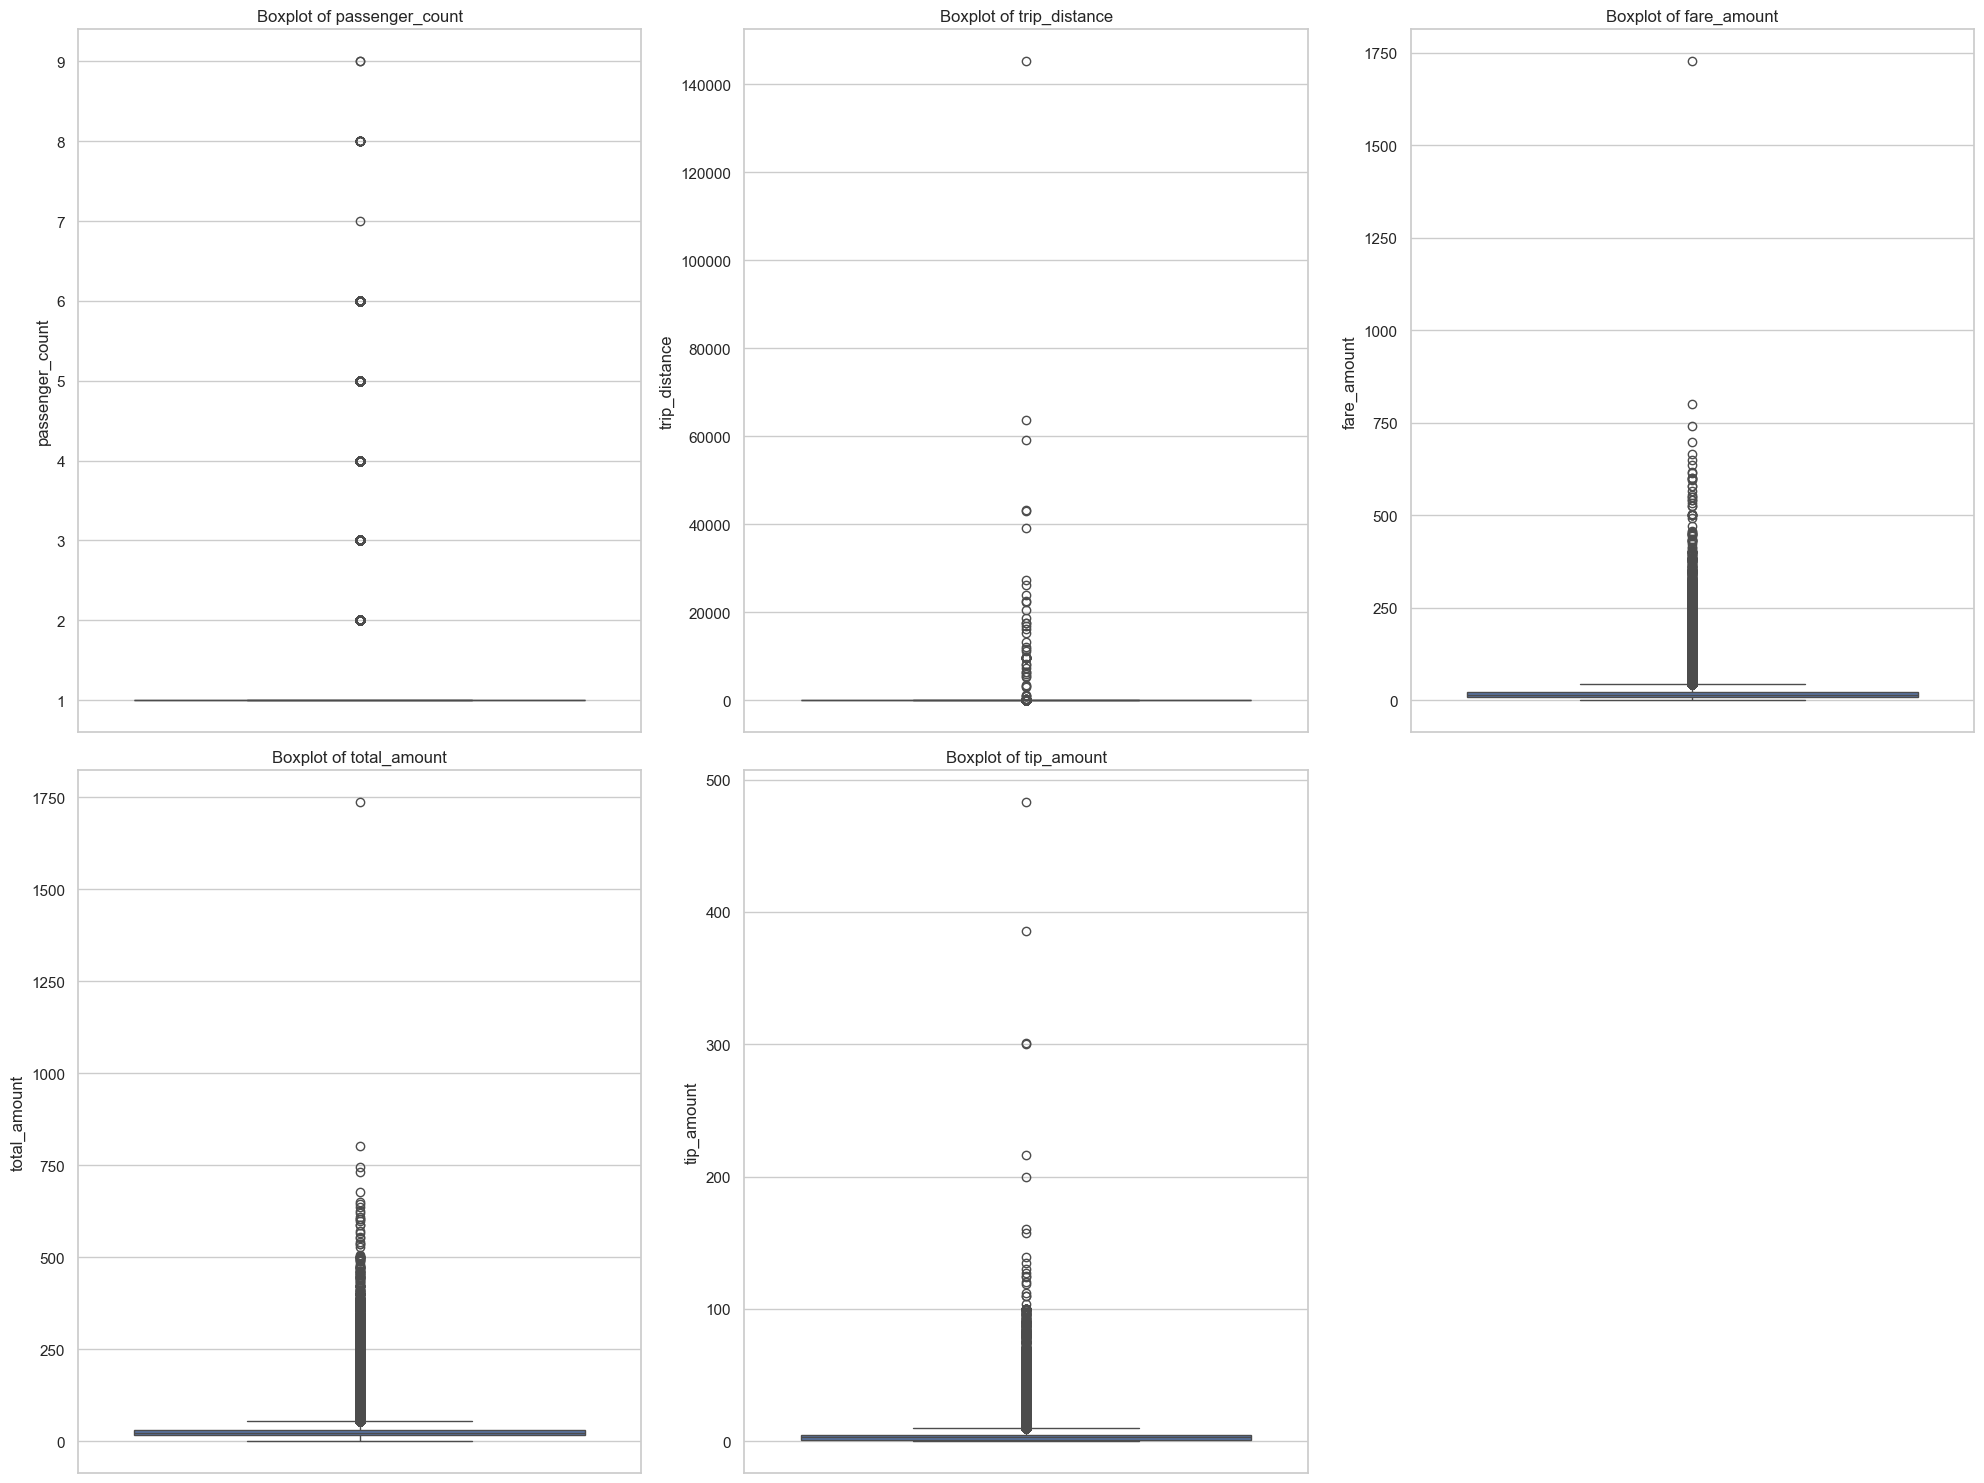

In [757]:
plt.figure(figsize=(20, 15))  # Set up the figure size for plots
# Create boxplots for key numerical columns
cols_to_plot = ['passenger_count', 'trip_distance', 'fare_amount', 'total_amount', 'tip_amount']
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


In [758]:
# Examine outlier cases:
# Trips with extremely high fare amounts (outlier):
df[df['fare_amount'] > 300]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3473            2  2023-12-01 16:54:23   2023-12-01 18:51:56              3.0   
8896            2  2023-12-02 13:39:04   2023-12-02 15:54:02              2.0   
17738           2  2023-12-04 01:16:19   2023-12-04 01:16:25              1.0   
22196           2  2023-12-04 21:09:40   2023-12-04 22:06:12              1.0   
41498           2  2023-12-07 23:39:43   2023-12-07 23:39:59              1.0   
...           ...                  ...                   ...              ...   
1875938         2  2023-06-27 02:31:22   2023-06-27 03:24:21              1.0   
1890752         2  2023-06-29 20:56:07   2023-06-29 20:56:15              1.0   
1891356         2  2023-06-29 22:19:18   2023-06-29 23:27:32              4.0   
1895505         2  2023-06-30 20:56:05   2023-06-30 22:24:48              1.0   
1896357         2  2023-06-30 23:34:14   2023-07-01 00:33:31              2.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
3473             52.63         4.0           138           265             1   
8896            113.73         5.0           132           265             1   
17738             0.00         5.0           265           265             1   
22196            74.51         4.0           132           265             4   
41498             0.00         5.0           265           265             2   
...                ...         ...           ...           ...           ...   
1875938          44.68         5.0           191           265             1   
1890752           0.00         5.0           265           265             1   
1891356          71.94         5.0           219           265             2   
1895505          84.16         5.0           138           265             2   
1896357          65.72         5.0           222           265             1   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
3473          343.90    7.5      0.0       25.00         21.69   
8896          430.00    0.0      0.0        1.00          0.00   
17738         369.69    0.0      0.0       74.14          0.00   
22196         319.40    1.0      0.5        0.00          6.94   
41498         319.00    0.0      0.0        0.00          0.00   
...              ...    ...      ...         ...           ...   
1875938       325.00    0.0      0.0       67.75         12.75   
1890752       350.00    0.0      0.0       70.20          0.00   
1891356       550.00    0.0      0.0        0.00          0.00   
1895505       579.50    5.0      0.0        0.00          0.00   
1896357       400.00    0.0      0.0       60.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
3473                       1.0        400.84                   0.0   
8896                       1.0        433.75                   0.0   
17738                      1.0        444.83                   0.0   
22196                      1.0        330.59                   0.0   
41498                      1.0        320.00                   0.0   
...                        ...           ...                   ...   
1875938                    1.0        406.50                   0.0   
1890752                    1.0        421.20                   0.0   
1891356                    1.0        551.00                   0.0   
1895505                    1.0        587.25                   0.0   
1896357                    1.0        461.00                   0.0   

         pickup_hour  airport_fee  
3473              16         1.75  
8896              13         1.75  
17738              1         0.00  
22196             21         1.75  
41498             23         0.00  
...              ...          ...  
1875938            2         0.00  
1890752           20         0.00  
1891356           22         0.00  
1895505           20         1.75  
1896357           23         0.00  

[179 row

In [759]:
# Trips with extremely long distances (outlier):
df[df['trip_distance'] > 250]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
14738           2  2023-12-03 12:03:43   2023-12-03 12:56:27              1.0   
24953           2  2023-12-05 13:53:27   2023-12-05 14:11:51              2.0   
42722           2  2023-12-08 08:32:00   2023-12-08 09:00:00              1.0   
91456           2  2023-12-15 19:04:19   2023-12-15 19:09:21              1.0   
195073          2  2023-04-05 15:38:08   2023-04-05 16:02:56              1.0   
261265          2  2023-04-15 18:20:00   2023-04-15 18:46:00              1.0   
288929          2  2023-04-26 18:34:17   2023-04-26 18:40:00              2.0   
289334          2  2023-04-26 19:28:52   2023-04-26 19:53:44              2.0   
331929          2  2023-05-01 14:15:00   2023-05-01 14:34:00              1.0   
345457          2  2023-05-09 07:35:00   2023-05-09 07:54:00              1.0   
365951          2  2023-05-10 15:32:41   2023-05-10 16:18:54              1.0   
383504          2  2023-05-06 12:54:00   2023-05-06 13:42:00              1.0   
395296          2  2023-05-15 15:54:20   2023-05-15 16:04:59              2.0   
413852          2  2023-05-14 17:52:09   2023-05-14 18:17:10              1.0   
416825          2  2023-05-16 09:18:00   2023-05-16 09:39:00              1.0   
455492          1  2023-05-22 16:44:55   2023-05-22 17:08:11              1.0   
470134          2  2023-05-25 07:15:00   2023-05-25 07:33:00              1.0   
473759          2  2023-05-25 18:06:00   2023-05-25 18:17:00              1.0   
516415          2  2023-02-03 12:02:00   2023-02-03 12:23:00              1.0   
526084          2  2023-02-05 08:42:00   2023-02-05 08:51:00              1.0   
557028          2  2023-02-11 09:57:12   2023-02-11 13:32:24              1.0   
566410          2  2023-02-13 04:20:00   2023-02-13 04:34:00              1.0   
592481          2  2023-02-17 22:36:00   2023-02-17 23:00:00              1.0   
724569          2  2023-11-14 06:35:00   2023-11-14 06:57:00              1.0   
766697          2  2023-11-21 12:17:26   2023-11-21 14:58:59              1.0   
818869          2  2023-10-02 07:24:00   2023-10-02 07:41:00              1.0   
823550          2  2023-10-03 06:33:25   2023-10-03 06:46:39              1.0   
912994          2  2023-10-19 05:35:26   2023-10-19 05:51:04              1.0   
979750          1  2023-10-30 14:56:07   2023-10-30 15:30:11              1.0   
998658          2  2023-08-03 11:44:00   2023-08-03 12:58:00              1.0   
1022009         2  2023-08-08 14:49:00   2023-08-08 15:15:00              1.0   
1061074         2  2023-08-16 22:43:00   2023-08-16 22:55:00              1.0   
1224085         2  2023-01-21 00:59:00   2023-01-21 01:23:00              1.0   
1244348         2  2023-01-25 09:20:00   2023-01-25 09:37:00              1.0   
1303609         2  2023-07-07 15:42:12   2023-07-07 16:03:37              1.0   
1311382         2  2023-07-09 09:38:00   2023-07-09 09:45:00              1.0   
1416857         2  2023-07-30 15:17:00   2023-07-30 15:36:00              1.0   
1454681         2  2023-09-07 19:18:55   2023-09-07 19:53:42              1.0   
1498835         2  2023-09-15 13:54:00   2023-09-15 14:33:00              1.0   
1515892         2  2023-09-18 18:49:22   2023-09-18 19:22:13              1.0   
1530175         2  2023-09-22 16:34:00   2023-09-22 17:18:00              1.0   
1683259         2  2023-03-19 20:09:00   2023-03-19 20:53:00              1.0   
1735244         2  2023-06-01 14:46:33   2023-06-01 15:39:08              1.0   
1781327         2  2023-06-09 15:53:18   2023-06-09 16:00:02              1.0   
1806153         2  2023-06-14 06:13:00   2023-06-14 06:25:00              1.0   
1824411         2  2023-06-17 02:45:00   2023-06-17 03:09:00              1.0   
1849448         2  2023-06-22 06:34:00   2023-06-22 06:47:00              1.0   
1883633         2  2023-06-28 15:41:28   2023-06-28 16:02:16              4.0   

         trip_distance  RatecodeID  PUL

In [760]:
# Trips with zero distance but non-zero fare (likely error in registering the trip):
df[(df['trip_distance'] == 0) & (df['fare_amount'] > 0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
14              1  2023-12-01 00:04:14   2023-12-01 00:25:16              1.0   
54              1  2023-12-01 00:06:34   2023-12-01 00:16:07              1.0   
88              2  2023-12-01 00:37:58   2023-12-01 00:49:21              2.0   
96              2  2023-12-01 00:29:36   2023-12-01 00:29:41              1.0   
124             2  2023-12-01 00:09:11   2023-12-01 00:09:20              1.0   
...           ...                  ...                   ...              ...   
1895724         1  2023-06-30 21:59:35   2023-06-30 22:00:33              1.0   
1895744         2  2023-06-30 21:16:31   2023-06-30 21:29:44              1.0   
1895937         1  2023-06-30 22:03:03   2023-06-30 22:03:46              1.0   
1896224         2  2023-06-30 23:06:42   2023-06-30 23:11:01              1.0   
1896292         2  2023-06-30 23:15:42   2023-06-30 23:35:22              2.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
14                 0.0         1.0           186            74             0   
54                 0.0         1.0           161           107             0   
88                 0.0         1.0           264           264             2   
96                 0.0         5.0           164           164             1   
124                0.0         2.0           125           125             2   
...                ...         ...           ...           ...           ...   
1895724            0.0         1.0           261           261             0   
1895744            0.0         1.0           246           161             1   
1895937            0.0         1.0           230            48             3   
1896224            0.0         5.0           132           132             1   
1896292            0.0         1.0           142           137             1   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
14             30.31    0.0      0.5        0.00           0.0   
54             20.38    0.0      0.5        0.00           0.0   
88             10.70    1.0      0.5        0.00           0.0   
96             18.00    0.0      0.0       20.00           0.0   
124            70.00    0.0      0.5        0.00           0.0   
...              ...    ...      ...         ...           ...   
1895724         3.00    1.0      0.5        0.00           0.0   
1895744        12.10    1.0      0.5        3.08           0.0   
1895937         3.00    3.5      0.5        0.00           0.0   
1896224        50.00    0.0      0.0        3.00           0.0   
1896292        16.30    1.0      0.5        2.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
14                         1.0         34.31                   2.5   
54                         1.0         24.38                   2.5   
88                         1.0         15.70                   2.5   
96                         1.0         41.50                   2.5   
124                        1.0         74.00                   2.5   
...                        ...           ...                   ...   
1895724                    1.0          8.00                   2.5   
1895744                    1.0         20.18                   2.5   
1895937                    1.0          8.00                   2.5   
1896224                    1.0         54.00                   0.0   
1896292                    1.0         23.30                   2.5   

         pickup_hour  airport_fee  
14                 0          0.0  
54                 0          0.0  
88                 0          0.0  
96                 0          0.0  
124                0          0.0  
...              ...          ...  
1895724           21          0.0  
1895744           21          0.0  
1895937           22          0.0  
1896224           23          0.0  
1896292           23          0.0  

[35829 r

In [761]:
# Trips with different pickup and dropoff locations but zero distance or fare (another case of error in registering the trip) :
df[(df['PULocationID'] != df['DOLocationID']) & ((df['trip_distance'] == 0) | (df['fare_amount'] == 0))]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
14              1  2023-12-01 00:04:14   2023-12-01 00:25:16              1.0   
54              1  2023-12-01 00:06:34   2023-12-01 00:16:07              1.0   
442             1  2023-12-01 05:06:33   2023-12-01 05:14:15              1.0   
443             1  2023-12-01 05:33:07   2023-12-01 05:46:18              1.0   
454             2  2023-12-01 05:55:52   2023-12-01 06:07:13              1.0   
...           ...                  ...                   ...              ...   
1895533         1  2023-06-30 20:31:54   2023-06-30 20:37:15              1.0   
1895675         1  2023-06-30 20:16:29   2023-06-30 20:55:32              1.0   
1895744         2  2023-06-30 21:16:31   2023-06-30 21:29:44              1.0   
1895937         1  2023-06-30 22:03:03   2023-06-30 22:03:46              1.0   
1896292         2  2023-06-30 23:15:42   2023-06-30 23:35:22              2.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
14                 0.0         1.0           186            74             0   
54                 0.0         1.0           161           107             0   
442                0.0         1.0           162            68             1   
443                0.0         1.0           236           226             1   
454                0.0         1.0            48           166             2   
...                ...         ...           ...           ...           ...   
1895533            0.0         1.0             4            79             0   
1895675            0.0         1.0            14           229             1   
1895744            0.0         1.0           246           161             1   
1895937            0.0         1.0           230            48             3   
1896292            0.0         1.0           142           137             1   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
14             30.31    0.0      0.5        0.00           0.0   
54             20.38    0.0      0.5        0.00           0.0   
442             7.90    3.5      0.5        2.55           0.0   
443            21.50    0.0      0.5        0.00           0.0   
454            10.70    1.0      0.5        0.00           0.0   
...              ...    ...      ...         ...           ...   
1895533         6.83    0.0      0.5        0.00           0.0   
1895675        46.50    0.0      0.5        0.00           0.0   
1895744        12.10    1.0      0.5        3.08           0.0   
1895937         3.00    3.5      0.5        0.00           0.0   
1896292        16.30    1.0      0.5        2.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
14                         1.0         34.31                   2.5   
54                         1.0         24.38                   2.5   
442                        1.0         15.45                   2.5   
443                        1.0         23.00                   0.0   
454                        1.0         15.70                   2.5   
...                        ...           ...                   ...   
1895533                    1.0         10.83                   2.5   
1895675                    1.0         48.00                   0.0   
1895744                    1.0         20.18                   2.5   
1895937                    1.0          8.00                   2.5   
1896292                    1.0         23.30                   2.5   

         pickup_hour  airport_fee  
14                 0          0.0  
54                 0          0.0  
442                5          0.0  
443                5          0.0  
454                5          0.0  
...              ...          ...  
1895533           20          0.0  
1895675           20          0.0  
1895744           21          0.0  
1895937           22          0.0  
1896292           23          0.0  

[22124 r

In [762]:
# Check for invalid payment types:
df['payment_type'].value_counts()

payment_type
1    1489991
2     314792
0      69316
4      13603
3       8697
Name: count, dtype: int64

In [763]:
# Trips with possibly unreasonable duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
# trips with negative duration
df[df['trip_duration'] < 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
60868           6  2023-12-11 06:12:56   2023-12-11 06:12:15              1.0   
181512          6  2023-04-03 20:04:45   2023-04-03 20:04:20              1.0   
334766          6  2023-05-08 06:05:49   2023-05-08 06:05:13              1.0   
363510          6  2023-05-10 07:05:24   2023-05-10 07:05:06              1.0   
400807          6  2023-05-12 14:05:36   2023-05-12 14:05:15              1.0   
...           ...                  ...                   ...              ...   
1808643         6  2023-06-14 14:06:56   2023-06-14 14:06:30              1.0   
1824703         6  2023-06-17 07:06:47   2023-06-17 07:06:11              1.0   
1856681         6  2023-06-23 11:06:55   2023-06-23 11:06:49              1.0   
1884641         6  2023-06-28 18:06:58   2023-06-28 18:06:30              1.0   
1885037         6  2023-06-28 19:06:51   2023-06-28 19:06:16              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
60868            13.77         1.0           265             7             0   
181512            7.88         1.0           265           171             0   
334766           14.35         1.0           265            50             0   
363510            6.33         1.0           265           140             0   
400807            8.51         1.0           265            42             0   
...                ...         ...           ...           ...           ...   
1808643           1.75         1.0           265             7             0   
1824703           9.89         1.0           265           189             0   
1856681           1.03         1.0           265           152             0   
1884641           3.27         1.0           265            50             0   
1885037          16.58         1.0           265            10             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
60868          50.20    0.0      0.5         0.0           0.0   
181512         34.20    0.0      0.5         0.0           0.0   
334766         46.54    0.0      0.5         0.0           0.0   
363510         36.43    0.0      0.5         0.0           0.0   
400807         44.71    0.0      0.5         0.0           0.0   
...              ...    ...      ...         ...           ...   
1808643        30.20    0.0      0.5         0.0           0.0   
1824703        33.65    0.0      0.5         0.0           0.0   
1856681        24.20    0.0      0.5         0.0           0.0   
1884641        45.32    0.0      0.5         0.0           0.0   
1885037        65.28    0.0      0.5         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
60868                      0.3         51.00                   2.5   
181512                     0.3         35.00                   2.5   
334766                     0.3         47.34                   2.5   
363510                     0.3         37.23                   2.5   
400807                     0.3         45.51                   2.5   
...                        ...           ...                   ...   
1808643                    0.3         31.00                   2.5   
1824703                    0.3         34.45                   2.5   
1856681                    0.3         25.00                   2.5   
1884641                    0.3         46.12                   2.5   
1885037                    0.3         66.08                   2.5   

         pickup_hour  airport_fee  trip_duration  
60868              6          0.0      -0.683333  
181512            20          0.0      -0.416667  
334766             6          0.0      -0.600000  
363510             7          0.0      -0.300000  
400807            14          0.0      -0.350000  
...              ...          ...            ...  
1808643           14          0.0      -0.433333  
1824703            7          0.0

In [764]:
# Trips with zero duration
df[df['trip_duration'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
862             1  2023-12-01 08:30:30   2023-12-01 08:30:30              2.0   
3151            1  2023-12-01 15:29:18   2023-12-01 15:29:18              1.0   
3490            1  2023-12-01 16:56:41   2023-12-01 16:56:41              1.0   
3660            1  2023-12-01 17:52:13   2023-12-01 17:52:13              1.0   
4630            1  2023-12-01 19:42:25   2023-12-01 19:42:25              1.0   
...           ...                  ...                   ...              ...   
1869093         1  2023-06-25 16:18:17   2023-06-25 16:18:17              1.0   
1877938         1  2023-06-27 13:35:20   2023-06-27 13:35:20              4.0   
1886318         1  2023-06-28 23:19:21   2023-06-28 23:19:21              1.0   
1886746         2  2023-06-29 04:42:45   2023-06-29 04:42:45              2.0   
1892828         1  2023-06-30 10:32:11   2023-06-30 10:32:11              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
862               0.00         1.0           138           264             4   
3151              0.00         1.0           170           264             2   
3490              0.00        99.0           239           264             1   
3660              0.00         2.0           132           264             2   
4630              0.00         1.0           164           264             4   
...                ...         ...           ...           ...           ...   
1869093           0.00         2.0           132           264             2   
1877938           0.00         1.0           246           264             2   
1886318           0.00         1.0           132           264             2   
1886746           0.02         5.0           132           264             1   
1892828           0.00         1.0           238           264             2   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
862             0.00   0.00      0.0         0.0           0.0   
3151           15.60   2.50      0.5         0.0           0.0   
3490           20.64   0.00      0.0         0.0           0.0   
3660           70.00   6.75      0.5         0.0           0.0   
4630            0.00   0.00      0.0         0.0           0.0   
...              ...    ...      ...         ...           ...   
1869093        70.00   1.75      0.5         0.0           0.0   
1877938        12.80   2.50      0.5         0.0           0.0   
1886318        52.00   2.75      0.5         0.0           0.0   
1886746        82.00   0.00      0.0        16.4           0.0   
1892828        12.80   2.50      0.5         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
862                        0.0          0.00                   0.0   
3151                       1.0         19.60                   2.5   
3490                       0.0         20.64                   0.0   
3660                       1.0         78.25                   0.0   
4630                       0.0          0.00                   0.0   
...                        ...           ...                   ...   
1869093                    1.0         73.25                   0.0   
1877938                    1.0         16.80                   2.5   
1886318                    1.0         56.25                   0.0   
1886746                    0.0         98.40                   0.0   
1892828                    1.0         16.80                   2.5   

         pickup_hour  airport_fee  trip_duration  
862                8         0.00            0.0  
3151              15         0.00            0.0  
3490              16         0.00            0.0  
3660              17         1.75            0.0  
4630              19         0.00            0.0  
...              ...          ...            ...  
1869093           16         1.75            0.0  
1877938           13         0.00

In [765]:
# Trips with extremely long duration (>24 hours)
df[df['trip_duration'] > 24 * 60]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
799467          2  2023-11-27 17:23:53   2023-11-29 06:04:37              1.0   
858770          2  2023-10-09 13:23:39   2023-10-10 14:50:07              1.0   
1203137         2  2023-01-17 08:41:18   2023-01-18 16:02:49              1.0   
1235157         2  2023-01-23 11:21:51   2023-01-30 10:31:02              1.0   
1888375         2  2023-06-29 13:48:32   2023-06-30 15:48:02              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
799467           14.44         1.0           229            93             2   
858770           16.80         2.0           132           132             2   
1203137           0.00         5.0           162            50             2   
1235157           0.00         1.0           207            95             2   
1888375           3.09         1.0           164           193             2   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
799467          60.4    2.5      0.5         0.0          6.94   
858770          70.0    0.0      0.5         0.0          6.94   
1203137         81.8    0.0      0.0         0.0          0.00   
1235157          3.0    0.0      0.5         0.0          0.00   
1888375         24.7    0.0      0.5         0.0          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
799467                     1.0         73.84                   2.5   
858770                     1.0         82.69                   2.5   
1203137                    1.0         85.30                   2.5   
1235157                    1.0          4.50                   0.0   
1888375                    1.0         28.70                   2.5   

         pickup_hour  airport_fee  trip_duration  
799467            17         0.00    2200.733333  
858770            13         1.75    1526.466667  
1203137            8         0.00    1881.516667  
1235157           11         0.00   10029.183333  
1888375           13         0.00    1559.500000

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [766]:
print(f"Number of rows: {df.shape[0]}")

Number of rows: 1896399


In [767]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
print(f"Number of rows: {df.shape[0]}")

Number of rows: 1896380


In [768]:
# Continue with outlier handling
# Remove trips with 0 trip_distance but fare amount over 300
df = df[~((df['trip_distance'] < 2) & (df['fare_amount'] > 300))]
print(f"Number of rows: {df.shape[0]}")

Number of rows: 1896333


In [769]:
# Remove Trips with extremely long distances (> 250):
df = df[df['trip_distance'] < 250]
print(f"Number of rows: {df.shape[0]}")

Number of rows: 1896285


In [770]:
# Remove Trips with zero distance but non-zero fare (likely error in registering the trip):
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] > 0))]
print(f"Number of rows: {df.shape[0]}")

Number of rows: 1860508


In [771]:
# Remove Trips with different pickup and dropoff locations but zero distance or fare (another case of error in registering the trip) :
df = df[~((df['PULocationID'] != df['DOLocationID']) & ((df['trip_distance'] == 0) | (df['fare_amount'] == 0)))]
print(f"Number of rows: {df.shape[0]}")

Number of rows: 1860255


In [772]:
# Remove Trips with zero duration
df = df[df['trip_duration'] > 0]
print(f"Number of rows: {df.shape[0]}")

Number of rows: 1860099


In [773]:
# Remove Trips with extremely long duration (>24)
df = df[df['trip_duration'] < 24 * 60]
print(f"Number of rows: {df.shape[0]}")

Number of rows: 1860096


In [774]:
# Remove rows with payment_type 0
df = df[df['payment_type'] != 0]
print(f"Number of rows: {df.shape[0]}")

Number of rows: 1805905


In [775]:
# Do any columns need standardising?

# Verify all categorical columns with fixed possible values for them
df['VendorID'].value_counts()
df['payment_type'].value_counts()
df['RatecodeID'].value_counts()


RatecodeID
1.0     1711374
2.0       70179
99.0       9444
3.0        5950
5.0        5162
4.0        3796
Name: count, dtype: int64

In [776]:
# RateCodeID has some values of 99. It's not in the data dictionary. Remove those rows
df = df[df['RatecodeID'] != 99]
print(f"Number of rows: {df.shape[0]}")

Number of rows: 1796461


In [777]:
# Store the cleaned data post outlier removal to parquet file, for easy of re-loading fresh during Analysis.
df.to_parquet('output/cleaned_data.parquet')

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [984]:
# Load the new cleaned data file
df = pd.read_parquet('output/cleaned_data.parquet')
print(f"Number of rows: {df.shape[0]}")

Number of rows: 1796461


In [985]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_hour',
 'airport_fee',
 'trip_duration']

In [986]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1796461 entries, 0 to 1896398
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  pickup_hour            int32         
 18  airport_fee            floa

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Temporal (can be used as categorical)
* `tpep_dropoff_datetime`: Temporal (can be used as categorical)
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`:  Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: Numerical
* `extra`: Numerical
* `mta_tax`: Numerical
* `tip_amount`: Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge`: Numerical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

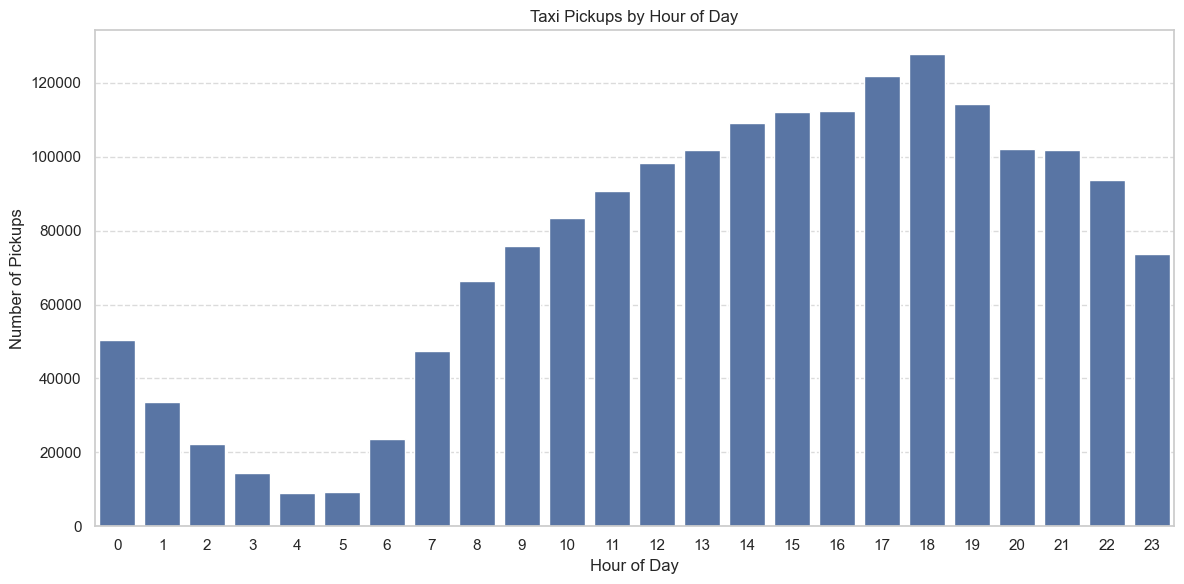

In [991]:
# Find and show the hourly trends in taxi pickups

# Define function to plot distribution (for better readability and reusability)
def plot_distribution(x_values, y_values, title, xlabel, ylabel, rotation=0, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x_values, y=y_values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


# Extract custom variables for ease of filtering -
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()

# Plot hourly distribution
hourly_pickups = df['pickup_hour'].value_counts().sort_index()
plot_distribution(
    x_values=hourly_pickups.index,
    y_values=hourly_pickups.values,
    title='Taxi Pickups by Hour of Day',
    xlabel='Hour of Day',
    ylabel='Number of Pickups'
)


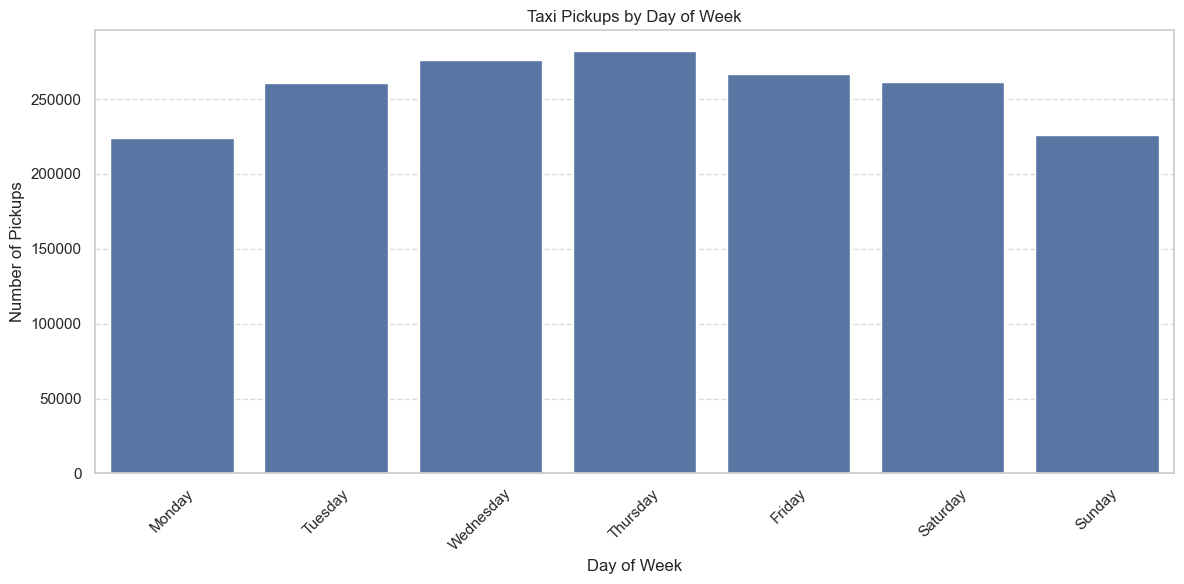

In [992]:
# Find and show the daily trends in taxi pickups (days of the week)

# Plot daily distribution (days of the week)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups = df['pickup_day_of_week'].value_counts().reindex(day_order)
plot_distribution(
    x_values=daily_pickups.index,
    y_values=daily_pickups.values,
    title='Taxi Pickups by Day of Week',
    xlabel='Day of Week',
    ylabel='Number of Pickups',
    rotation=45
)


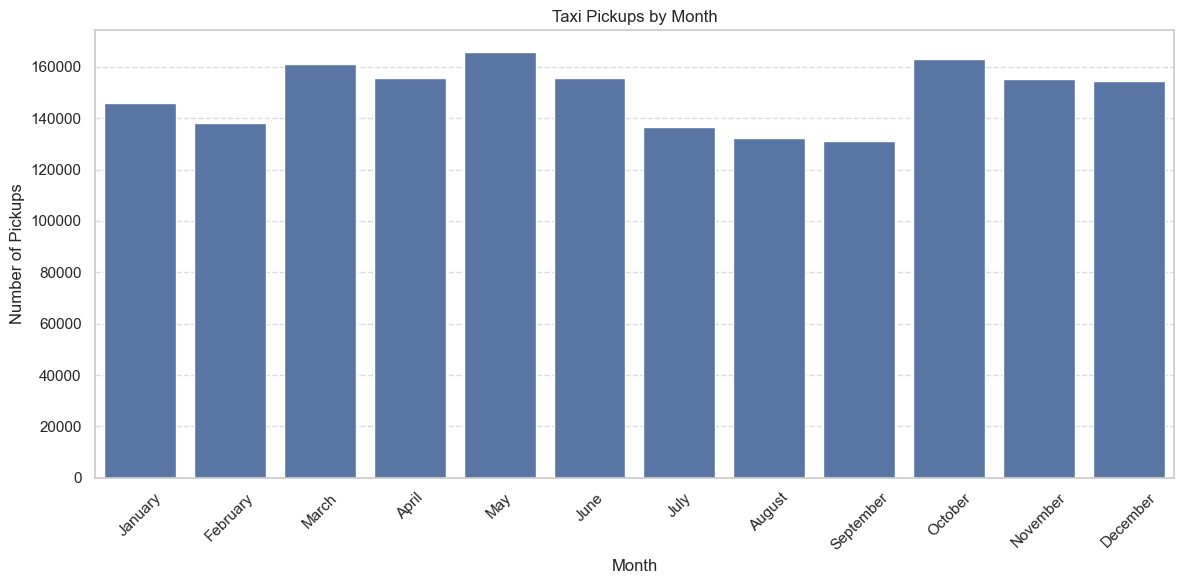

In [993]:
# Show the monthly trends in pickups

# Get monthly pickups
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_pickups = df['pickup_month'].value_counts().reindex(month_order)

# Plot monthly distribution
plot_distribution(
    x_values=monthly_pickups.index,
    y_values=monthly_pickups.values,
    title='Taxi Pickups by Month',
    xlabel='Month',
    ylabel='Number of Pickups',
    rotation=45
)


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [994]:
# Analyse the above parameters

# Check for zero or negative values in financial parameters
financial_params = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for param in financial_params:
    zero_count = (df[param] == 0).sum()
    neg_count = (df[param] < 0).sum()
    total_count = len(df)

    zero_percent = (zero_count / total_count) * 100
    neg_percent = (neg_count / total_count) * 100

    print(
        f"{param}: Zero values: {zero_count} ({zero_percent:.2f}%) | Negative values: {neg_count} ({neg_percent:.2f}%)")

# No negative values expected as they've already been handled during Data Cleaning Process.

fare_amount: Zero values: 323 (0.02%) | Negative values: 0 (0.00%)
tip_amount: Zero values: 385474 (21.46%) | Negative values: 0 (0.00%)
total_amount: Zero values: 159 (0.01%) | Negative values: 0 (0.00%)
trip_distance: Zero values: 202 (0.01%) | Negative values: 0 (0.00%)


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [995]:
# Analyze the zero values for the trip_distance
df[df.trip_distance == 0][['fare_amount', 'tip_amount', 'total_amount']].value_counts()

fare_amount  tip_amount  total_amount
0.0          0.00        0.00            129
                         1.00             18
                         4.00             17
                         2.75             11
                         1.50             10
                         3.25              5
                         3.50              3
                         5.00              3
                         2.25              2
             0.01        0.01              2
             0.00        5.75              1
             127.00      128.50            1
Name: count, dtype: int64

In [996]:
# Create a df with non zero entries for the selected parameters.

# For tip_amount- we can't exclude zero values as they're legitimate and makes up a significant portion of the data.
# For trip_distance also, it doesn't really matter much whether we exclude or include. Because fare_amount for these entries is zero for almost all of them. Which means they're anyways going to be excluded when excluding fare_amount = 0. So, we'll exclude them for our case.

# Create a copy of the dataframe excluding zero values for financial parameters
df_1 = df.copy()

# Filter out zero values for fare_amount, tip_amount, and total_amount
df_1 = df_1[(df_1['fare_amount'] > 0) &
            (df_1['total_amount'] > 0) &
            (df_1['trip_distance'] > 0)]

# Display the shape of the original and filtered dataframes
print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape (non-zero financial values): {df_1.shape}")
print(
    f"Removed {df.shape[0] - df_1.shape[0]} rows ({((df.shape[0] - df_1.shape[0]) / df.shape[0]) * 100:.2f}% of data)")

# Let's see the summary statistics of our filtered dataframe
print("\nSummary statistics for filtered dataframe:")
df_1[financial_params].describe()


Original DataFrame shape: (1796461, 22)
Filtered DataFrame shape (non-zero financial values): (1796138, 22)
Removed 323 rows (0.02% of data)

Summary statistics for filtered dataframe:


fare_amount    tip_amount  total_amount  trip_distance
count  1.796138e+06  1.796138e+06  1.796138e+06   1.796138e+06
mean   1.961560e+01  3.607140e+00  2.881136e+01   3.477336e+00
std    1.799023e+01  4.034632e+00  2.272329e+01   4.560546e+00
min    1.000000e-02  0.000000e+00  1.010000e+00   1.000000e-02
25%    9.300000e+00  1.000000e+00  1.596000e+01   1.080000e+00
50%    1.350000e+01  2.880000e+00  2.100000e+01   1.800000e+00
75%    2.190000e+01  4.480000e+00  3.060000e+01   3.390000e+00
max    7.408000e+02  4.829000e+02  7.458000e+02   1.927600e+02

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

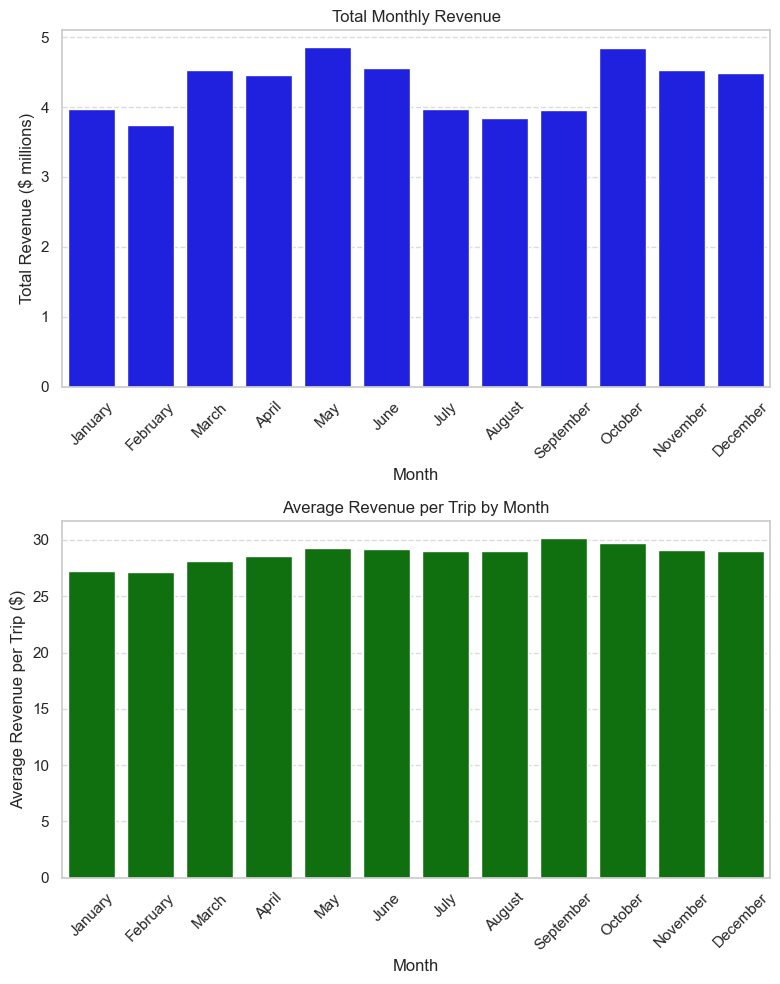

In [1054]:
# Group data by month and analyse monthly revenue

# Data is already grouped by month using the pickup_month column created before.

def sort_months(df_rev):
    """Function to sort the index to get the months in order"""
    return df_rev.reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December'])

monthly_revenue = df_1.groupby('pickup_month')['total_amount'].sum()
# sort the index to get the months in order
monthly_revenue = sort_months(monthly_revenue)

avg_revenue_per_trip = df_1.groupby('pickup_month')['total_amount'].mean()
avg_revenue_per_trip = sort_months(avg_revenue_per_trip)

plt.figure(figsize=(8, 10))
# plot total monthly revenue (in millions) using seaborn
sns.set_theme(style="whitegrid")
plt.subplot(2, 1, 1)
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values / 1_000_000, color='Blue')
plt.title('Total Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($ millions)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# plot average revenue per trip by month using seaborn
plt.subplot(2, 1, 2)
sns.barplot(x=avg_revenue_per_trip.index, y=avg_revenue_per_trip.values, color='Green')
plt.title('Average Revenue per Trip by Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue per Trip ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

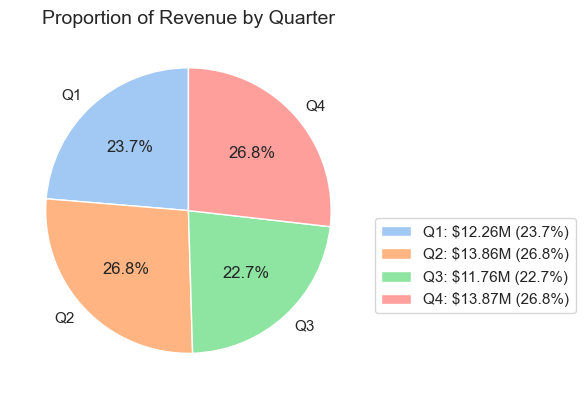

Total Revenue ($)  Proportion (%)
quarter                                   
1              12256458.94           23.68
2              13859372.38           26.78
3              11763226.37           22.73
4              13870121.76           26.80

In [998]:
# Calculate proportion of each quarter

# create a function that returns the quarter number, when passed with Month name
def get_quarter(month):
    """ Function to get the quarter number from month name
    """
    month = month.lower()
    if month in ['january', 'february', 'march']:
        return "1"
    elif month in ['april', 'may', 'june']:
        return "2"
    elif month in ['july', 'august', 'september']:
        return "3"
    elif month in ['october', 'november', 'december']:
        return "4"


# Create a new quarter column
df_1['quarter'] = df_1['pickup_month'].apply(lambda x: get_quarter(x))

# Revenue by quarter
quarterly_revenue = df_1.groupby('quarter')['total_amount'].sum()
# Proportion for each quarter
quarterly_proportion = quarterly_revenue / quarterly_revenue.sum() * 100

# Visualize the proportion
plt.figure(figsize=(6, 6))
plt.pie(quarterly_proportion, labels=[f'Q{i}' for i in quarterly_proportion.index],
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Proportion of Revenue by Quarter', fontsize=14)

# Add legend
legend_labels = [f'Q{i}: ${quarterly_revenue[i] / 1_000_000:.2f}M ({quarterly_proportion[i]:.1f}%)'
                 for i in quarterly_revenue.index]
plt.legend(legend_labels, loc='best', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

# Display the quarterly revenue and proportion in a table as well -
quarter_summary = pd.DataFrame({
    'Total Revenue ($)': quarterly_revenue,
    'Proportion (%)': quarterly_proportion.round(2)
})
display(quarter_summary)


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

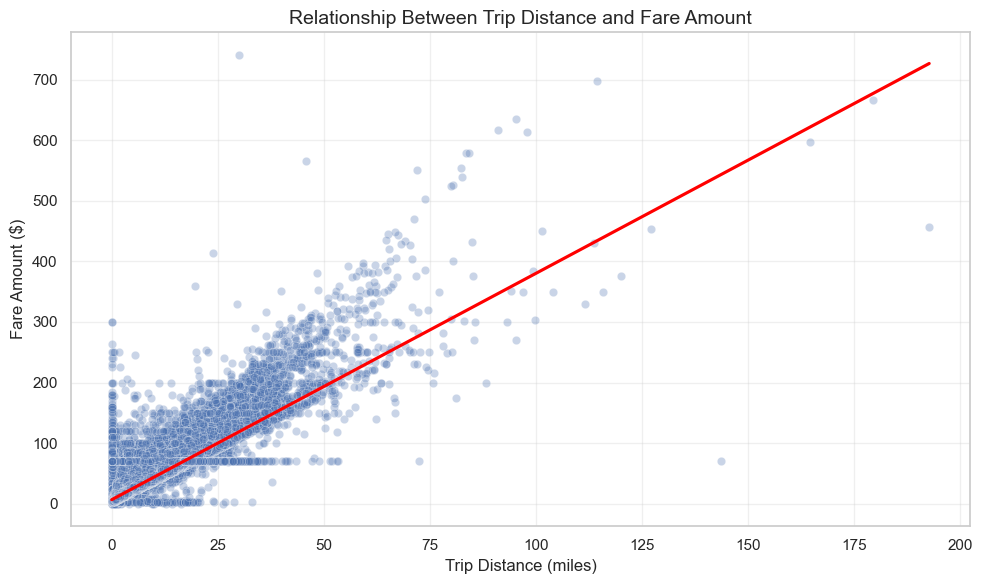

Correlation between trip_distance and fare_amount: 0.9466


In [999]:
# Show how trip fare is affected by distance

def show_relationship(data, x_col, y_col, xlabel, ylabel, title, figsize=(10, 6)):
    """Function to show relationship between two variables"""
    plt.figure(figsize=figsize)
    # show scatter plot
    sns.scatterplot(x=x_col, y=y_col, data=data, alpha=0.3)

    # Add a trend line
    sns.regplot(data=data, x=x_col, y=y_col,
                scatter=False, line_kws={"color": "red"})
    # Customize
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Display Correlation
    correlation = data[[x_col, y_col]].corr().iloc[0, 1]
    print(f"Correlation between {x_col} and {y_col}: {correlation:.4f}")


# trip_distance zero was already filtered out before, so using dataframe as-is.
show_relationship(data=df_1,
                  x_col='trip_distance',
                  y_col='fare_amount',
                  xlabel='Trip Distance (miles)',
                  ylabel='Fare Amount ($)',
                  title='Relationship Between Trip Distance and Fare Amount')


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

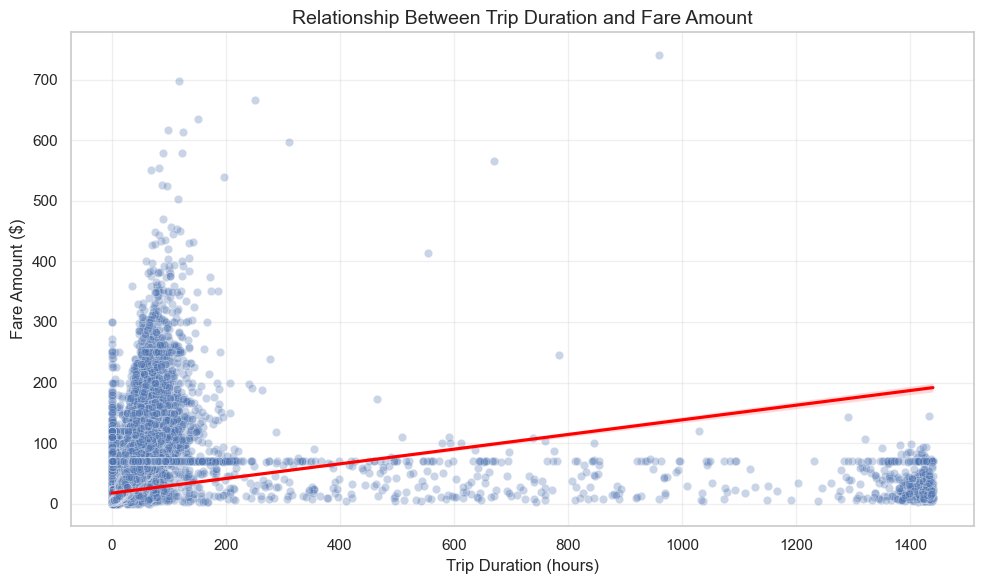

Correlation between trip_duration and fare_amount: 0.2752


In [1000]:
# Show relationship between fare and trip duration

show_relationship(data=df_1,
                  x_col='trip_duration',
                  y_col='fare_amount',
                  xlabel='Trip Duration (hours)',
                  ylabel='Fare Amount ($)',
                  title='Relationship Between Trip Duration and Fare Amount')

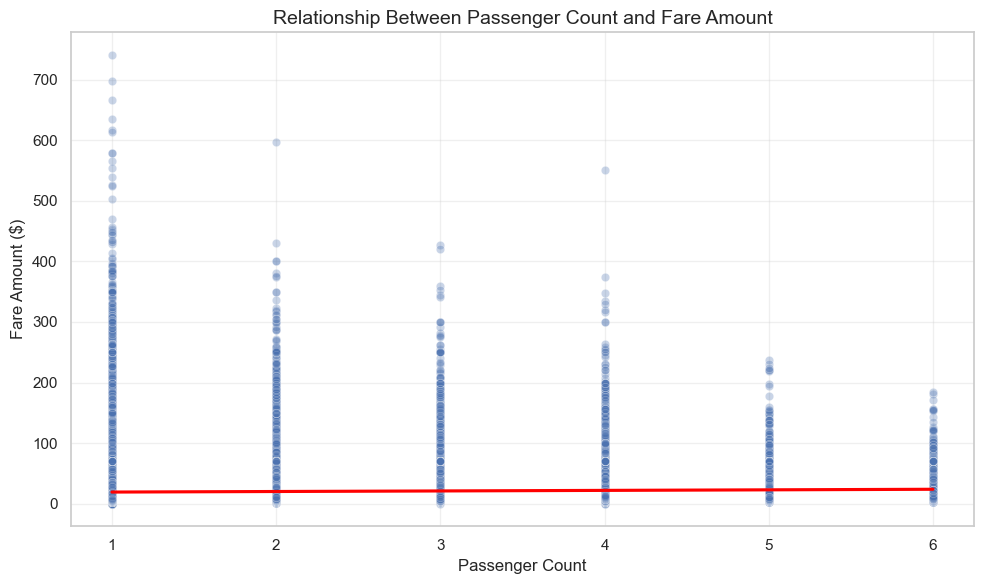

Correlation between passenger_count and fare_amount: 0.0449


In [1001]:
# Show relationship between fare and number of passengers
show_relationship(data=df_1,
                  x_col='passenger_count',
                  y_col='fare_amount',
                  xlabel='Passenger Count',
                  ylabel='Fare Amount ($)',
                  title='Relationship Between Passenger Count and Fare Amount')


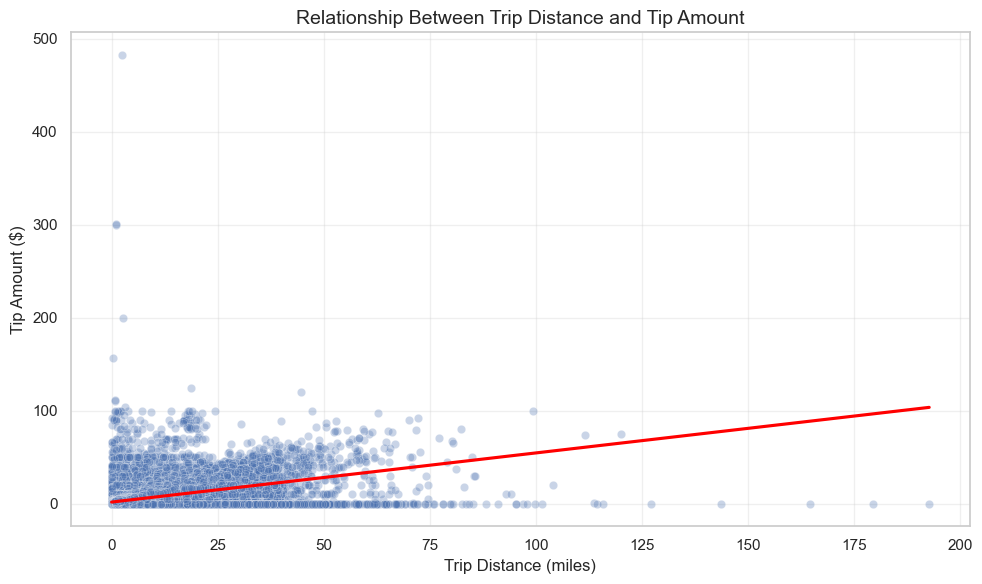

Correlation between trip_distance and tip_amount: 0.5974


In [1002]:
# Show relationship between tip and trip distance
show_relationship(data=df_1,
                  x_col='trip_distance',
                  y_col='tip_amount',
                  xlabel='Trip Distance (miles)',
                  ylabel='Tip Amount ($)',
                  title='Relationship Between Trip Distance and Tip Amount')


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [1043]:
# Analyse the distribution of different payment types (payment_type).

payment_counts = df_1['payment_type'].value_counts().sort_index()
payment_counts = payment_counts.rename(index={
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
})
display(payment_counts)

# show value_counts with percentage for payment_counts
payment_counts = df_1['payment_type'].value_counts(normalize=True).sort_values(ascending=False).mul(100).round(2)
payment_counts = payment_counts.rename(index={
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
})
payment_counts


payment_type
Credit card    1467875
Cash            309337
No charge         6717
Dispute          12209
Name: count, dtype: int64

payment_type
Credit card    81.72
Cash           17.22
Dispute         0.68
No charge       0.37
Name: proportion, dtype: float64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [1004]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [1005]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('datasets/taxi_zones/taxi_zones.shp')  # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

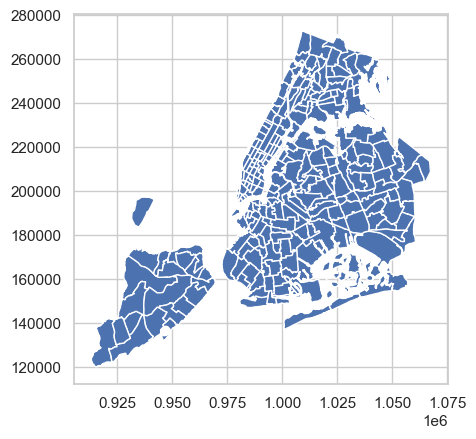

In [1006]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [1046]:
# Merge zones and trip records using locationID and PULocationID

merged_data = df_1.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

# Check the first few rows of the merged data
merged_data.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-01 00:08:12   2023-12-01 00:21:54              1.0   
1         2  2023-12-01 00:10:28   2023-12-01 00:21:14              1.0   
2         1  2023-12-01 00:49:36   2023-12-01 01:02:21              1.0   
3         2  2023-12-01 00:18:12   2023-12-01 00:32:04              2.0   
4         1  2023-12-01 00:42:51   2023-12-01 00:49:28              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           2.66         1.0           163           158             1   
1           2.06         1.0            48           249             1   
2           2.70         1.0           114           256             1   
3           3.36         1.0            79           161             1   
4           0.70         1.0           237           161             1   

   fare_amount  ...  fare_per_mile  distance_tier   avg_speed  OBJECTID  \
0         14.9  ...       5.601504      2-5 miles  698.978102     163.0   
1         12.8  ...       6.213592      2-5 miles  688.792570      48.0   
2         16.3  ...       6.037037      2-5 miles  762.352941     114.0   
3         17.0  ...       5.059524      2-5 miles  872.307692      79.0   
4          7.2  ...      10.285714      0-2 miles  380.856423     237.0   

   Shape_Leng  Shape_Area                     zone  LocationID    borough  \
0    0.034177    0.000041            Midtown North       163.0  Manhattan   
1    0.043747    0.000094             Clinton East        48.0  Manhattan   
2    0.031727    0.000047  Greenwich Village South       114.0  Manhattan   
3    0.042625    0.000108             East Village        79.0  Manhattan   
4    0.042213    0.000096    Upper East Side South       237.0  Manhattan   

                                            geometry  
0  POLYGON ((989412.663 219020.943, 990045.841 21...  
1  POLYGON ((986694.313 214463.846, 986568.184 21...  
2  POLYGON ((986306.712 203122.786, 986300.242 20...  
3  POLYGON ((988746.067 202151.955, 988733.885 20...  
4  POLYGON ((993633.442 216961.016, 993507.232 21...  

[5 rows x 33 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [1048]:
# Group data by location and calculate the number of trips

trips_per_location = merged_data.groupby('PULocationID').size().reset_index(name='trip_count')
trips_per_location.head()


PULocationID  trip_count
0             1          52
1             2           2
2             3           4
3             4        1784
4             6          18

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [1009]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = zones.merge(trips_per_location, left_on='LocationID', right_on='PULocationID', how='left')



The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

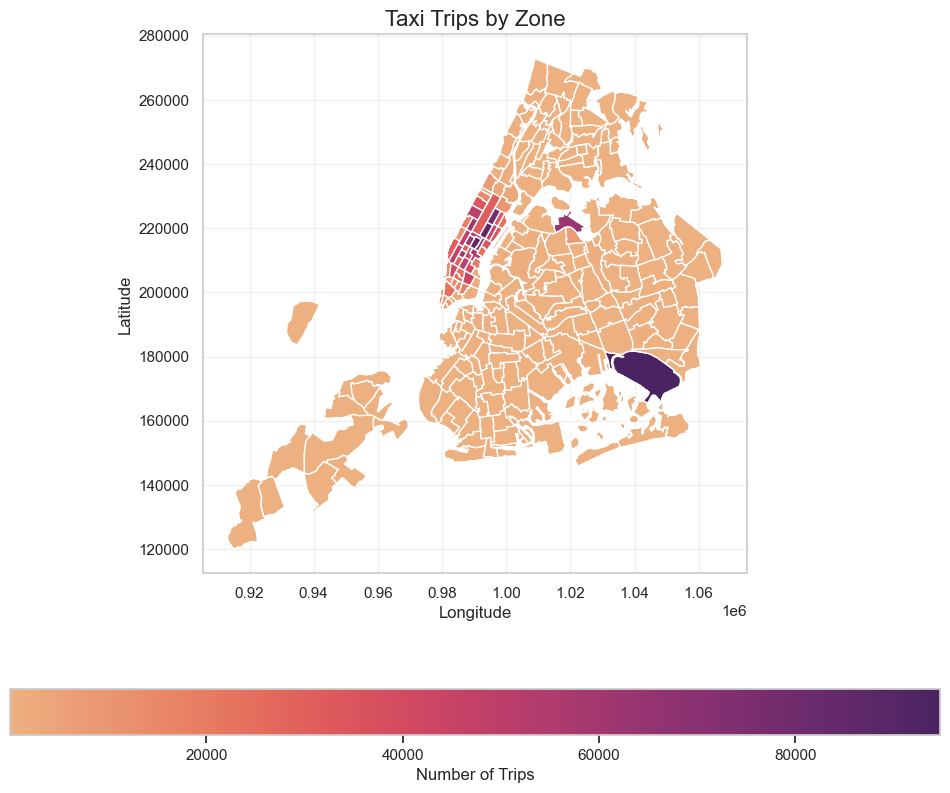

In [1010]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
# Plot the map and display it
zones_with_trips.plot(column='trip_count',
                      ax=ax,
                      figsize=fig,
                      cmap='flare',
                      legend=True,
                      legend_kwds={'label': "Number of Trips",
                                   'orientation': "horizontal"})
plt.title('Taxi Trips by Zone', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


In [1011]:
# can you try displaying the zones DF sorted by the number of trips?

sorted_zones = zones_with_trips.sort_values(by='trip_count', ascending=False)
sorted_zones[['zone', 'trip_count']]



zone  trip_count
131               JFK Airport     94725.0
236     Upper East Side South     86890.0
160            Midtown Center     85401.0
235     Upper East Side North     77015.0
161              Midtown East     65550.0
..                        ...         ...
155           Mariners Harbor         NaN
171    New Dorp/Midland Beach         NaN
186             Port Richmond         NaN
213  South Beach/Dongan Hills         NaN
220                 Stapleton         NaN

[263 rows x 2 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [1012]:
# Find routes which have the slowest speeds at different times of the day
# A route is defined by the pickup and dropoff zones.

# Merge zones data to add pickup and drop zone names
route_data = df_1[['PULocationID', 'DOLocationID', 'trip_distance', 'trip_duration','pickup_hour']]
route_data = route_data.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID',
                              how='left').drop(columns=['LocationID']).rename(columns={'zone': 'pickup_zone'})
route_data = route_data.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID',
                              how='left').drop(columns=['LocationID']).rename(columns={'zone': 'drop_zone'})
# Add the route column by concatenating PULocationID and  DOLocationID
route_data['route'] = route_data['pickup_zone'].astype(str) + ' TO ' + route_data['drop_zone'].astype(str)
# new speed column
route_data['speed'] = route_data['trip_distance'] / (route_data['trip_duration'] / 60)


In [1013]:
# slowest routes in general -
route_speed_data = route_data[['route', 'speed']].groupby(['route']).agg(
    avg_speed=('speed', 'mean'),
    trip_count=('speed', 'count'),
).sort_values(by=('trip_count'), ascending=True)
# consider routes with atleast 100 trips -
route_speed_data[route_speed_data['trip_count'] > 100].sort_values(by='avg_speed', ascending=True)

avg_speed  trip_count
route                                                                   
Midtown Center TO Times Sq/Theatre District         5.022321        2562
Penn Station/Madison Sq West TO Garment District    5.148274        1115
Midtown East TO Times Sq/Theatre District           5.225392        2132
Penn Station/Madison Sq West TO Midtown South       5.362229        1391
Midtown East TO Midtown Center                      5.490554        2311
...                                                      ...         ...
Sunnyside TO Sunnyside                             55.566271         106
Central Harlem TO Central Harlem                   62.083387         351
East Village TO nan                                68.346911         139
JFK Airport TO JFK Airport                         94.305438        2349
Union Sq TO nan                                   448.538923         127

[2558 rows x 2 columns]

In [1014]:
# slowest routes, considering hour of the day -
route_speed_data = route_data[['route', 'speed', 'pickup_hour']].groupby(['route', 'pickup_hour']).agg(
    avg_speed=('speed', 'mean'),
    trip_count=('speed', 'count'),
).sort_values(by=('trip_count'), ascending=True)
# consider routes and hours with atleast 10 trips -
route_speed_data[route_speed_data['trip_count'] > 10].sort_values(by='avg_speed', ascending=True)

avg_speed  \
route                                            pickup_hour                
Penn Station/Madison Sq West TO Garment District 12              3.483450   
                                                 10              3.765588   
Garment District TO Garment District             12              3.779307   
SoHo TO SoHo                                     16              3.785884   
Garment District TO Garment District             15              3.796722   
...                                                                   ...   
Central Harlem TO Central Harlem                 19            512.490413   
Midtown North TO Midtown North                   7             517.078707   
JFK Airport TO JFK Airport                       2             537.710511   
Central Park TO Central Park                     21            659.599741   
East Elmhurst TO East Elmhurst                   23           1142.039796   

                                                              trip_count  
route                                            pickup_hour              
Penn Station/Madison Sq West TO Garment District 12                   83  
                                                 10                   67  
Garment District TO Garment District             12                   23  
SoHo TO SoHo                                     16                   15  
Garment District TO Garment District             15                   31  
...                                                                  ...  
Central Harlem TO Central Harlem                 19                   20  
Midtown North TO Midtown North                   7                    16  
JFK Airport TO JFK Airport                       2                    16  
Central Park TO Central Park                     21                   50  
East Elmhurst TO East Elmhurst                   23                   11  

[33541 rows x 2 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

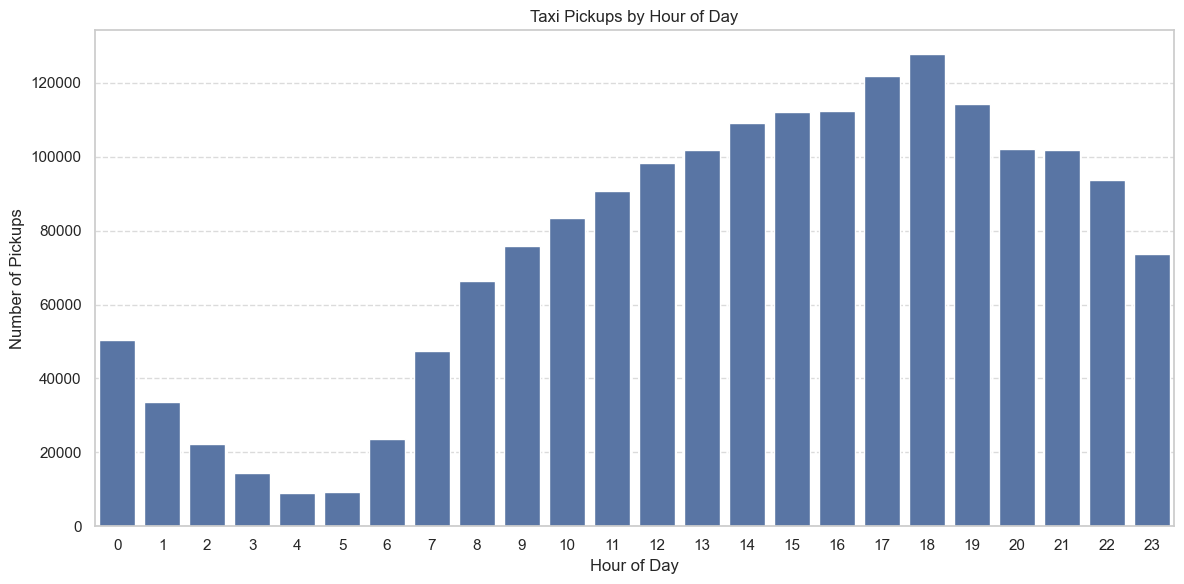

Five Busiest hours : 


pickup_hour
18    127835
17    121850
19    114337
16    112300
15    112103
Name: count, dtype: int64

In [1015]:
# Visualise the number of trips per hour and find the busiest hour
hourly_pickups = df_1['pickup_hour'].value_counts().sort_index()
plot_distribution(
    x_values=hourly_pickups.index,
    y_values=hourly_pickups.values,
    title='Taxi Pickups by Hour of Day',
    xlabel='Hour of Day',
    ylabel='Number of Pickups'
)
print("Five Busiest hours : ")
df_1['pickup_hour'].value_counts().sort_values(ascending=False).head(5)


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

Estimated actual number of trips in the five busiest hours:


Hour  Sample Count  Estimated Actual Count
4    15        112103               2242060.0
3    16        112300               2246000.0
1    17        121850               2437000.0
0    18        127835               2556700.0
2    19        114337               2286740.0

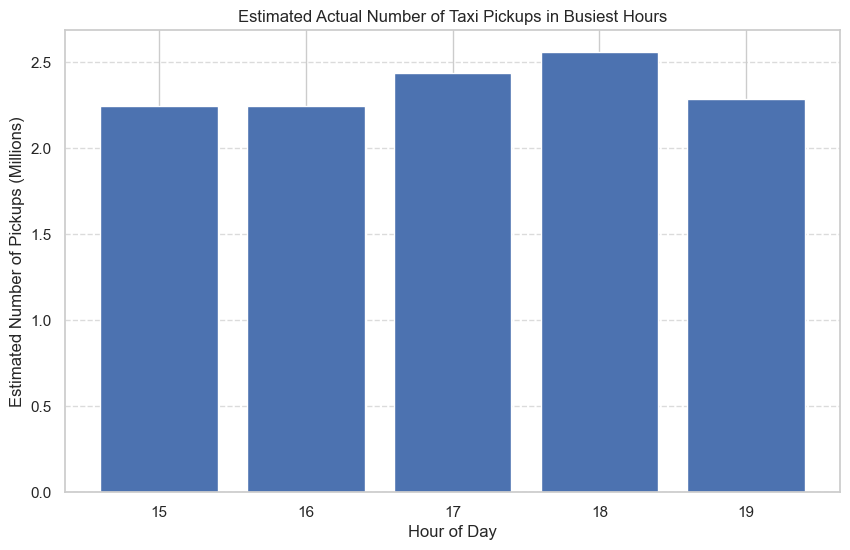

In [1016]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

# Get the five busiest hours
busiest_hours = df_1['pickup_hour'].value_counts().sort_values(ascending=False).head(5)

# Scale up the number of trips by dividing by the sampling fraction
scaled_busiest_hours = busiest_hours / sample_fraction

# Create a DataFrame for better presentation
scaled_hours_df = pd.DataFrame({
    'Hour': busiest_hours.index,
    'Sample Count': busiest_hours.values,
    'Estimated Actual Count': scaled_busiest_hours.values
})

# Sort by hour for better readability
scaled_hours_df = scaled_hours_df.sort_values('Hour')

print("Estimated actual number of trips in the five busiest hours:")
display(scaled_hours_df)

# Visualize the scaled counts
plt.figure(figsize=(10, 6))
plt.bar(scaled_hours_df['Hour'], scaled_hours_df['Estimated Actual Count'] / 1000000)
plt.title('Estimated Actual Number of Taxi Pickups in Busiest Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Number of Pickups (Millions)')
plt.xticks(scaled_hours_df['Hour'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

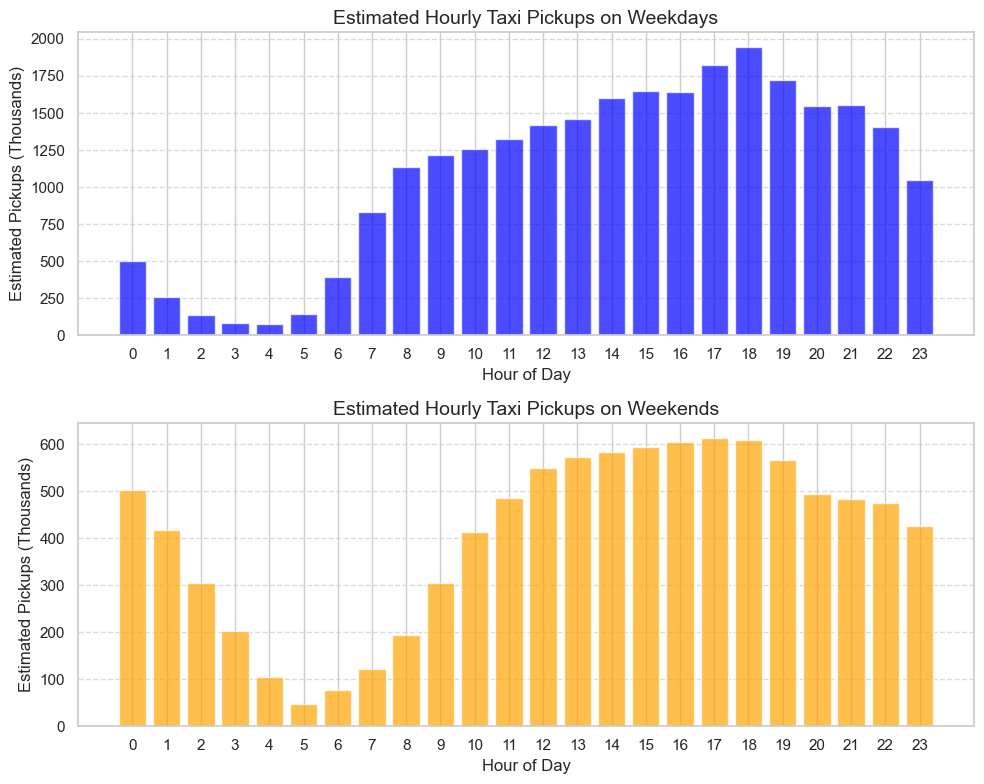

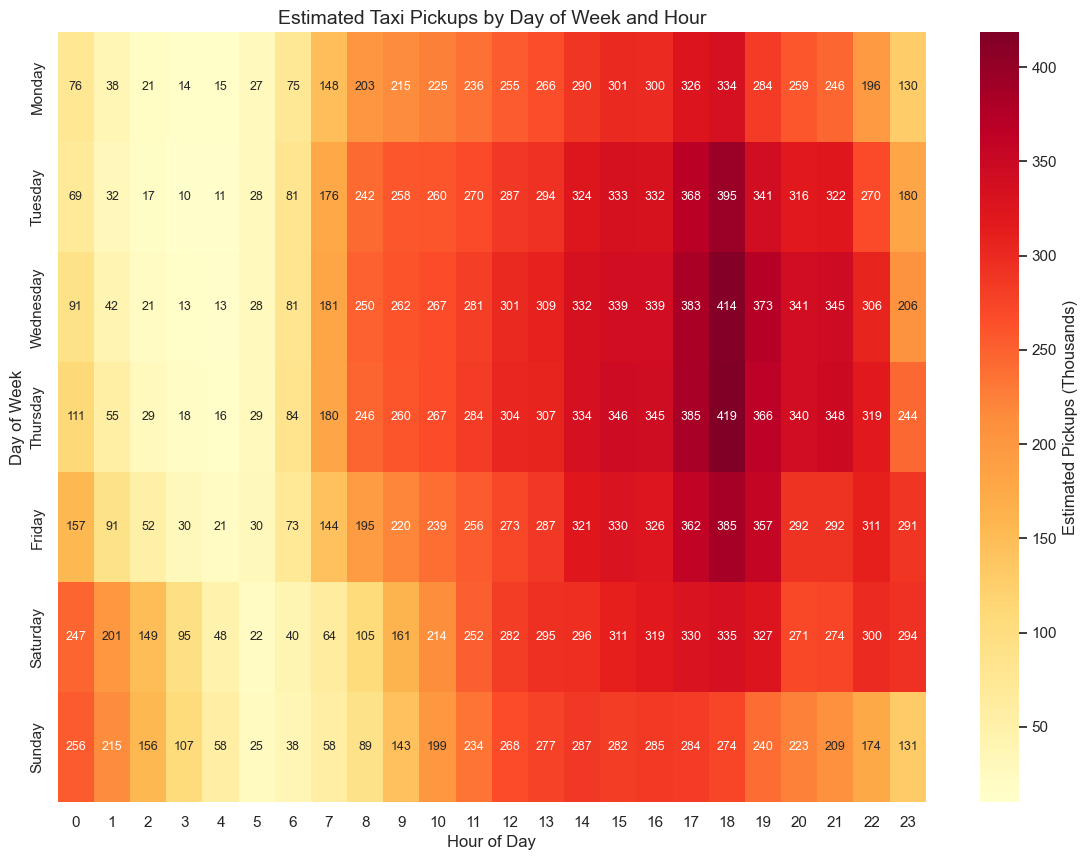

Busiest hours for each day of the week:
Monday: 18:00 with approximately 334480 pickups
Tuesday: 18:00 with approximately 394900 pickups
Wednesday: 18:00 with approximately 414280 pickups
Thursday: 18:00 with approximately 418560 pickups
Friday: 18:00 with approximately 385080 pickups
Saturday: 18:00 with approximately 335140 pickups
Sunday: 14:00 with approximately 287040 pickups


In [1060]:
# Compare traffic trends for the week days and weekends

# Define weekdays and weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

# Group by hour and day type (weekday/weekend)
weekday_hourly = df_1[df_1['pickup_day_of_week'].isin(weekdays)].groupby('pickup_hour').size()
weekend_hourly = df_1[df_1['pickup_day_of_week'].isin(weekends)].groupby('pickup_hour').size()

# Scale up the counts
weekday_hourly_scaled = weekday_hourly / sample_fraction
weekend_hourly_scaled = weekend_hourly / sample_fraction

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot weekday hourly pattern
ax1.bar(weekday_hourly.index, weekday_hourly_scaled / 1000, color='blue', alpha=0.7)
ax1.set_title('Estimated Hourly Taxi Pickups on Weekdays', fontsize=14)
ax1.set_xlabel('Hour of Day', fontsize=12)
ax1.set_ylabel('Estimated Pickups (Thousands)', fontsize=12)
ax1.set_xticks(range(24))
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot weekend hourly pattern
ax2.bar(weekend_hourly.index, weekend_hourly_scaled / 1000, color='orange', alpha=0.7)
ax2.set_title('Estimated Hourly Taxi Pickups on Weekends', fontsize=14)
ax2.set_xlabel('Hour of Day', fontsize=12)
ax2.set_ylabel('Estimated Pickups (Thousands)', fontsize=12)
ax2.set_xticks(range(24))
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Now let's break it down by individual days of the week
plt.figure(figsize=(14, 10))

# Group by day of week and hour
day_hour_counts = df_1.groupby(['pickup_day_of_week', 'pickup_hour']).size().unstack()

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_hour_counts = day_hour_counts.reindex(days)

# Scale up the counts
day_hour_counts_scaled = day_hour_counts / sample_fraction

# Create a heatmap
sns.heatmap(day_hour_counts_scaled / 1000, cmap='YlOrRd',
            annot=True, fmt='.0f', annot_kws={'size': 9},
            cbar_kws={'label': 'Estimated Pickups (Thousands)'})
plt.title('Estimated Taxi Pickups by Day of Week and Hour', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.show()

# Print the busiest hours for each day of the week
print("Busiest hours for each day of the week:")
for day in days:
    if day in day_hour_counts.index:
        busiest_hour = day_hour_counts.loc[day].idxmax()
        busiest_count = day_hour_counts.loc[day, busiest_hour]
        busiest_count_scaled = busiest_count / sample_fraction
        print(f"{day}: {busiest_hour}:00 with approximately {busiest_count_scaled:.0f} pickups")


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top 10 Pickup Zones:
   PULocationID                          zone  total_pickups
0           132                   JFK Airport          94725
1           237         Upper East Side South          86890
2           161                Midtown Center          85401
3           236         Upper East Side North          77015
4           162                  Midtown East          65550
5           138             LaGuardia Airport          63432
6           186  Penn Station/Madison Sq West          63000
7           230     Times Sq/Theatre District          60479
8           142           Lincoln Square East          59671
9           170                   Murray Hill          54023

Top 10 Dropoff Zones:
   DOLocationID                       zone  total_dropoffs
0           236      Upper East Side North           80560
1           237      Upper East Side South           77362
2           161             Midtown Center           70845
3           230  Times Sq/Theatre District       

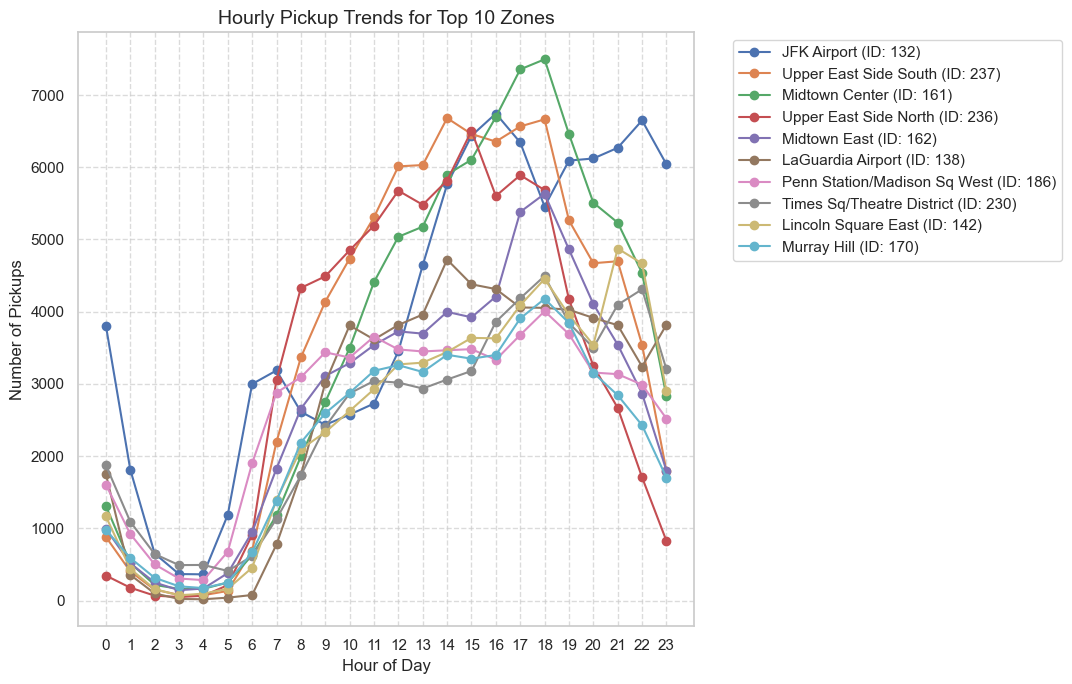

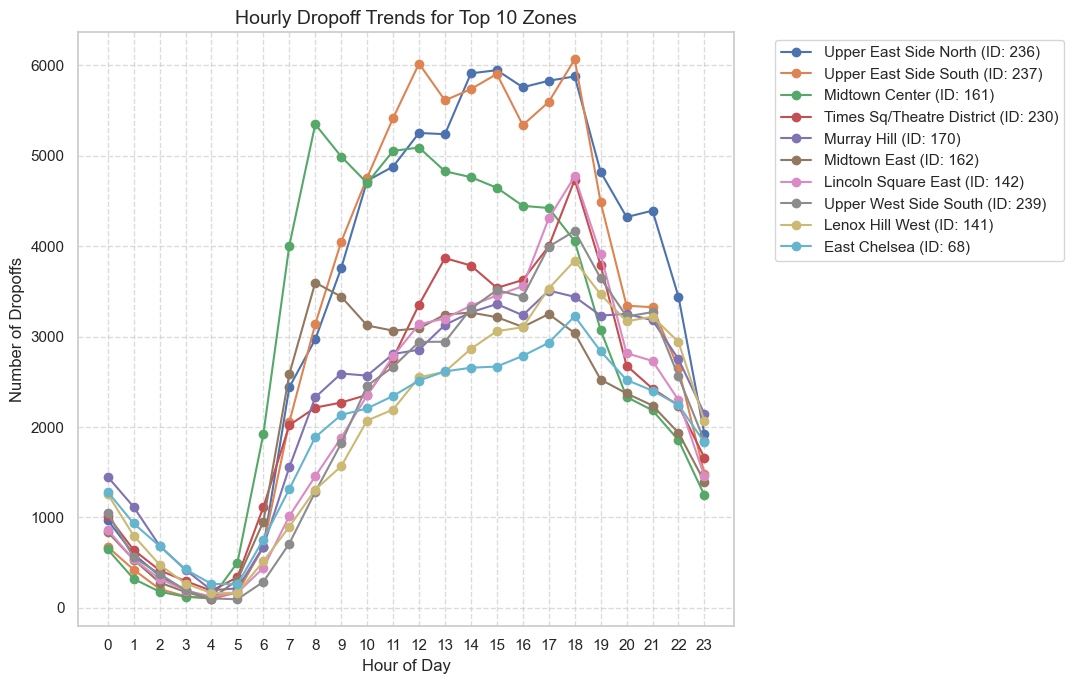

In [1069]:
# Find top 10 pickup and dropoff zones

# hourly pickup counts for each zone
pickup_hourly = df_1.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')
pickup_zone_counts = df_1.groupby('PULocationID').size().reset_index(name='total_pickups')
pickup_zone_counts = pickup_zone_counts.sort_values('total_pickups', ascending=False)

# hourly dropoff counts for each zone
dropoff_hourly = df_1.groupby(['DOLocationID', 'pickup_hour']).size().reset_index(name='dropoff_count')
dropoff_zone_counts = df_1.groupby('DOLocationID').size().reset_index(name='total_dropoffs')
dropoff_zone_counts = dropoff_zone_counts.sort_values('total_dropoffs', ascending=False)

# top 10 pickup zones
top_10_pickup_zones = pickup_zone_counts.head(10)
top_10_pickup_ids = top_10_pickup_zones['PULocationID'].tolist()

# top 10 dropoff zones
top_10_dropoff_zones = dropoff_zone_counts.head(10)
top_10_dropoff_ids = top_10_dropoff_zones['DOLocationID'].tolist()

# Merge with zone names for better readability
top_10_pickup_zones = pd.merge(top_10_pickup_zones, zones[['LocationID', 'zone']],
                              left_on='PULocationID', right_on='LocationID')
top_10_dropoff_zones = pd.merge(top_10_dropoff_zones, zones[['LocationID', 'zone']],
                               left_on='DOLocationID', right_on='LocationID')

# Display top 10 pickup and dropoff zones
print("Top 10 Pickup Zones:")
print(top_10_pickup_zones[['PULocationID', 'zone', 'total_pickups']])
print("\nTop 10 Dropoff Zones:")
print(top_10_dropoff_zones[['DOLocationID', 'zone', 'total_dropoffs']])

# hourly trends for top pickup zones
plt.figure(figsize=(11, 7))
for zone_id in top_10_pickup_ids:
    zone_data = pickup_hourly[pickup_hourly['PULocationID'] == zone_id]
    zone_name = zones[zones['LocationID'] == zone_id]['zone'].values[0]
    plt.plot(zone_data['pickup_hour'], zone_data['pickup_count'], marker='o', label=f"{zone_name} (ID: {zone_id})")

plt.title('Hourly Pickup Trends for Top 10 Zones', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# hourly trends for top dropoff zones
plt.figure(figsize=(11, 7))
for zone_id in top_10_dropoff_ids:
    zone_data = dropoff_hourly[dropoff_hourly['DOLocationID'] == zone_id]
    zone_name = zones[zones['LocationID'] == zone_id]['zone'].values[0]
    plt.plot(zone_data['pickup_hour'], zone_data['dropoff_count'], marker='o', label=f"{zone_name} (ID: {zone_id})")

plt.title('Hourly Dropoff Trends for Top 10 Zones', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Dropoffs', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [1019]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Calculate pickup and dropoff counts for each zone
pickup_counts = df_1.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_counts = df_1.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Merge pickup and dropoff counts
ratio_df = pd.merge(pickup_counts, dropoff_counts,
                   left_on='PULocationID', right_on='DOLocationID', how='outer')

# Rename columns for clarity
ratio_df = ratio_df.rename(columns={'PULocationID': 'LocationID'})
ratio_df = ratio_df.drop('DOLocationID', axis=1)

# exclude null values of LocationID
ratio_df = ratio_df[ratio_df['LocationID'].notnull()]

# Fill NaN values with 0
ratio_df = ratio_df.fillna(0)

# Calculate the pickup/dropoff ratio
ratio_df['pickup_dropoff_ratio'] = ratio_df['pickup_count'] / ratio_df['dropoff_count'].replace(0, np.nan)

# Merge with zone information
ratio_df = pd.merge(ratio_df, zones[['LocationID', 'zone']], on='LocationID', how='left')

# Sort by ratio to find highest and lowest
highest_ratio = ratio_df.sort_values('pickup_dropoff_ratio', ascending=False).head(10)
lowest_ratio = ratio_df.sort_values('pickup_dropoff_ratio', ascending=True).head(10)

# Display results
print("Top 10 zones with highest pickup/dropoff ratios:")
display(highest_ratio[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\nTop 10 zones with lowest pickup/dropoff ratios:")
display(lowest_ratio[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])


Top 10 zones with highest pickup/dropoff ratios:


zone  pickup_count  dropoff_count  \
65                  East Elmhurst        8213.0          876.0   
122                   JFK Airport       94725.0        19892.0   
128             LaGuardia Airport       63432.0        21611.0   
1                     Jamaica Bay           2.0            1.0   
174  Penn Station/Madison Sq West       63000.0        39749.0   
38                   Central Park       30520.0        21915.0   
104       Greenwich Village South       24079.0        17408.0   
234                  West Village       40203.0        30288.0   
151                  Midtown East       65550.0        51688.0   
93               Garment District       30243.0        25052.0   

     pickup_dropoff_ratio  
65               9.375571  
122              4.761965  
128              2.935172  
1                2.000000  
174              1.584946  
38               1.392653  
104              1.383215  
234              1.327357  
151              1.268186  
93               1.207209


Top 10 zones with lowest pickup/dropoff ratios:


zone  pickup_count  dropoff_count  \
188            Rockaway Park           1.0          172.0   
0             Newark Airport          52.0         5262.0   
197           Sheepshead Bay           3.0          257.0   
110          Highbridge Park           1.0           84.0   
173           Pelham Parkway           2.0          166.0   
13   Bay Terrace/Fort Totten           3.0          228.0   
139                  Madison           3.0          210.0   
166      Ocean Parkway South           2.0          137.0   
210       Stuyvesant Heights          23.0         1493.0   
185                Ridgewood          15.0          955.0   

     pickup_dropoff_ratio  
188              0.005814  
0                0.009882  
197              0.011673  
110              0.011905  
173              0.012048  
13               0.013158  
139              0.014286  
166              0.014599  
210              0.015405  
185              0.015707

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [1020]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = [23, 0, 1, 2, 3, 4, 5]

# Filter data for night hours
night_data = df_1[df_1['pickup_hour'].isin(night_hours)]

# Count pickups by zone during night hours
night_pickups = night_data.groupby('PULocationID').size().reset_index(name='night_pickup_count')
night_pickups = pd.merge(night_pickups, zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

# Count dropoffs by zone during night hours
night_dropoffs = night_data.groupby('DOLocationID').size().reset_index(name='night_dropoff_count')
night_dropoffs = pd.merge(night_dropoffs, zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')

# Get top 10 pickup zones during night hours
top_night_pickup_zones = night_pickups.sort_values('night_pickup_count', ascending=False).head(10)

# Get top 10 dropoff zones during night hours
top_night_dropoff_zones = night_dropoffs.sort_values('night_dropoff_count', ascending=False).head(10)

# Print the results
print("Top 10 pickup zones during night hours (11PM-5AM):")
display(top_night_pickup_zones[['zone', 'night_pickup_count']])

print("\nTop 10 dropoff zones during night hours (11PM-5AM):")
display(top_night_dropoff_zones[['zone', 'night_dropoff_count']])

Top 10 pickup zones during night hours (11PM-5AM):


zone  night_pickup_count
63                   East Village               15341
102                   JFK Airport               14226
200                  West Village               12453
36                   Clinton East               10330
118               Lower East Side                9605
89        Greenwich Village South                8749
182     Times Sq/Theatre District                8204
146  Penn Station/Madison Sq West                6811
108             LaGuardia Airport                6104
131                 Midtown South                6100


Top 10 dropoff zones during night hours (11PM-5AM):


zone  night_dropoff_count
78                    East Village                 8202
46                    Clinton East                 7007
164                    Murray Hill                 6233
67                    East Chelsea                 5686
102                       Gramercy                 5509
135                Lenox Hill West                 5206
255                 Yorkville West                 5167
241                   West Village                 4945
222      Times Sq/Theatre District                 4563
221  Sutton Place/Turtle Bay North                 4407

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Time Period  Revenue ($)  Revenue Share (%)
0  Night (11PM-5AM)   6241543.55          12.061145
1    Day (6AM-10PM)  45507635.90          87.938855

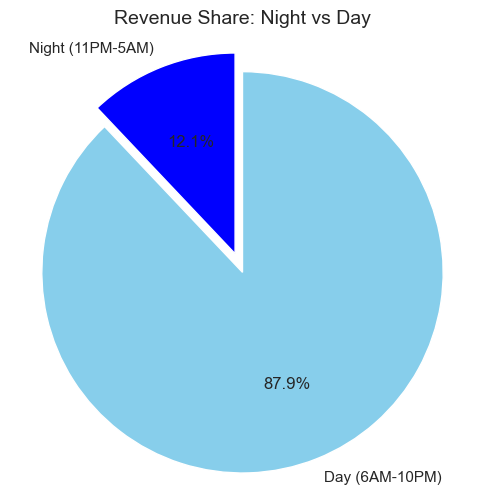

In [1021]:
# Filter for night hours (11 PM to 5 AM)

day_hours = [h for h in range(24) if h not in night_hours]

# Filter data for day hours
day_data = df_1[df_1['pickup_hour'].isin(day_hours)]

# Calculate total revenue for night and day
night_revenue = night_data['total_amount'].sum()
day_revenue = day_data['total_amount'].sum()
total_revenue = night_revenue + day_revenue

# Calculate revenue share percentages
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

# Create a DataFrame to display the results
revenue_share_df = pd.DataFrame({
    'Time Period': ['Night (11PM-5AM)', 'Day (6AM-10PM)'],
    'Revenue ($)': [night_revenue, day_revenue],
    'Revenue Share (%)': [night_revenue_share, day_revenue_share]
})

# Display the results
display(revenue_share_df)

# Visualize the revenue share
plt.figure(figsize=(6, 6))
plt.pie([night_revenue_share, day_revenue_share],
        labels=['Night (11PM-5AM)', 'Day (6AM-10PM)'],
        autopct='%1.1f%%',
        colors=['blue', 'skyblue'],
        startangle=90,
        explode=(0.1, 0))
plt.title('Revenue Share: Night vs Day', fontsize=14)
plt.axis('equal')
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

Average Fare per Mile per Passenger by Passenger Count:


passenger_count  fare_per_mile  fare_per_mile_per_passenger
0              1.0      10.966939                    10.966939
1              2.0      13.387283                     6.693641
2              3.0      11.700838                     3.900279
3              4.0      18.539539                     4.634885
4              5.0       8.407301                     1.681460
5              6.0       9.613723                     1.602287

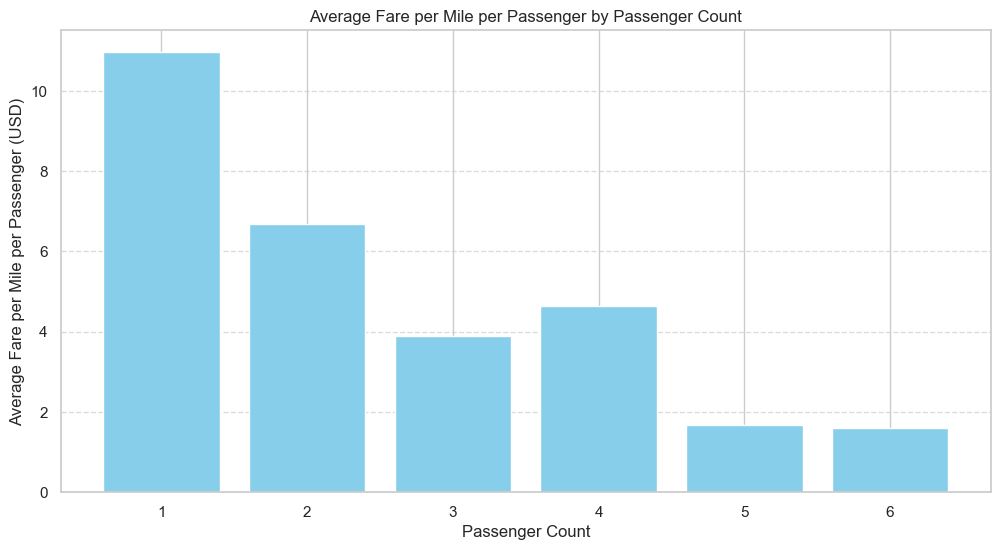

In [1022]:
# Analyse the fare per mile per passenger for different passenger counts

# Calculate fare per mile
df_1['fare_per_mile'] = df_1['fare_amount'] / df_1['trip_distance']

# Group by passenger count and calculate average fare per mile
fare_per_mile_by_passenger = df_1.groupby('passenger_count')['fare_per_mile'].mean().reset_index()

# Calculate fare per mile per passenger
fare_per_mile_by_passenger['fare_per_mile_per_passenger'] = fare_per_mile_by_passenger['fare_per_mile'] / fare_per_mile_by_passenger['passenger_count']

# Display the results
print("Average Fare per Mile per Passenger by Passenger Count:")
display(fare_per_mile_by_passenger)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.bar(fare_per_mile_by_passenger['passenger_count'],
        fare_per_mile_by_passenger['fare_per_mile_per_passenger'],
        color='skyblue')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile per Passenger (USD)')
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fare_per_mile_by_passenger['passenger_count'])
plt.show()



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

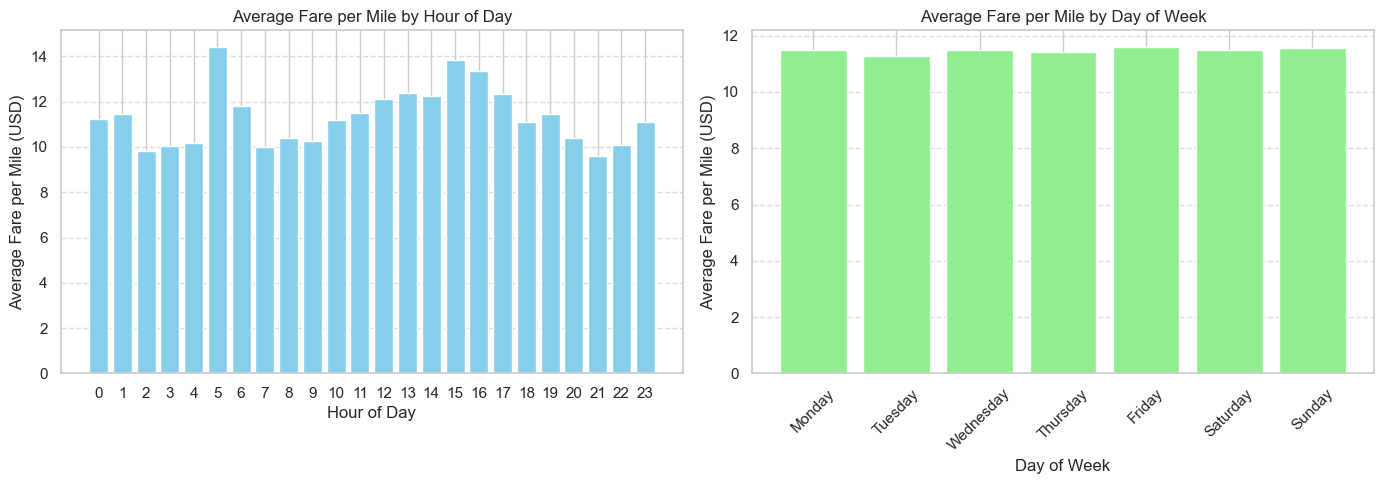

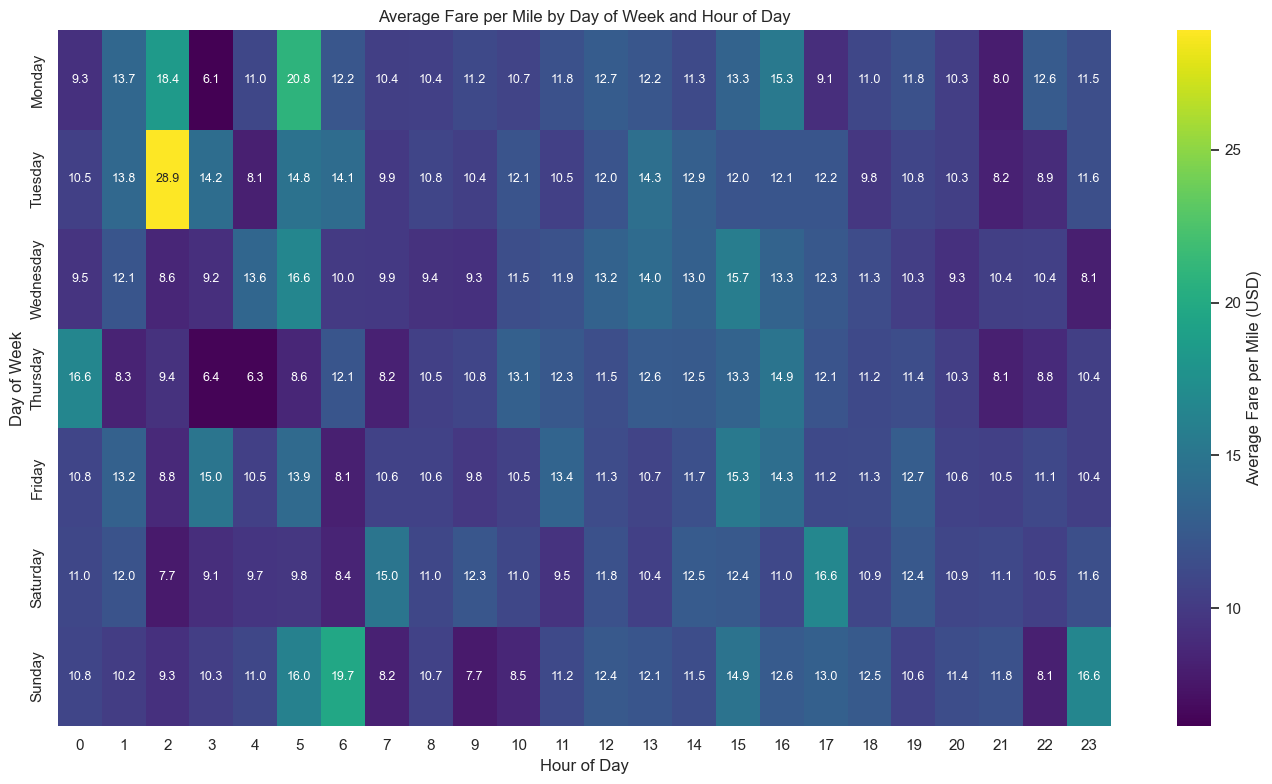

Average Fare per Mile by Hour of Day:


pickup_hour  fare_per_mile
5             5      14.425996
15           15      13.839333
16           16      13.370269
13           13      12.364014
17           17      12.324539


Average Fare per Mile by Day of Week:


pickup_day_of_week  fare_per_mile
0             Monday      11.500285
1            Tuesday      11.264265
2          Wednesday      11.493816
3           Thursday      11.425929
4             Friday      11.608650
5           Saturday      11.506182
6             Sunday      11.561275

In [1072]:
# Compare the average fare per mile for different days and for different times of the day

# Calculate fare per mile
df_1['fare_per_mile'] = df_1['fare_amount'] / df_1['trip_distance']

# By hours of the day
fare_per_mile_by_hour = df_1.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

# Ensure days are in correct order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_per_mile_by_day = df_1.groupby('pickup_day_of_week')['fare_per_mile'].mean().reindex(day_order).reset_index()

# Visualize by hour of day
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.bar(fare_per_mile_by_hour['pickup_hour'], fare_per_mile_by_hour['fare_per_mile'], color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile (USD)')
plt.title('Average Fare per Mile by Hour of Day')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))

# Visualize by day of week
plt.subplot(1, 2, 2)
plt.bar(fare_per_mile_by_day['pickup_day_of_week'], fare_per_mile_by_day['fare_per_mile'], color='lightgreen')
plt.xlabel('Day of Week')
plt.ylabel('Average Fare per Mile (USD)')
plt.title('Average Fare per Mile by Day of Week')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Create a heatmap to visualize the interaction between day of week and hour of day
fare_per_mile_by_day_hour = df_1.groupby(['pickup_day_of_week', 'pickup_hour'])['fare_per_mile'].mean().reset_index()
fare_per_mile_pivot = fare_per_mile_by_day_hour.pivot(index='pickup_day_of_week', columns='pickup_hour', values='fare_per_mile')

# Reindex to ensure days are in correct order
fare_per_mile_pivot = fare_per_mile_pivot.reindex(day_order)

plt.figure(figsize=(14, 8))
sns.heatmap(fare_per_mile_pivot, cmap='viridis', annot=True, annot_kws={'size': 9}, fmt='.1f', cbar_kws={'label': 'Average Fare per Mile (USD)'})
plt.title('Average Fare per Mile by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

# Display summary statistics
print("Average Fare per Mile by Hour of Day:")
display(fare_per_mile_by_hour.sort_values('fare_per_mile', ascending=False).head(5))

print("\nAverage Fare per Mile by Day of Week:")
display(fare_per_mile_by_day)


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

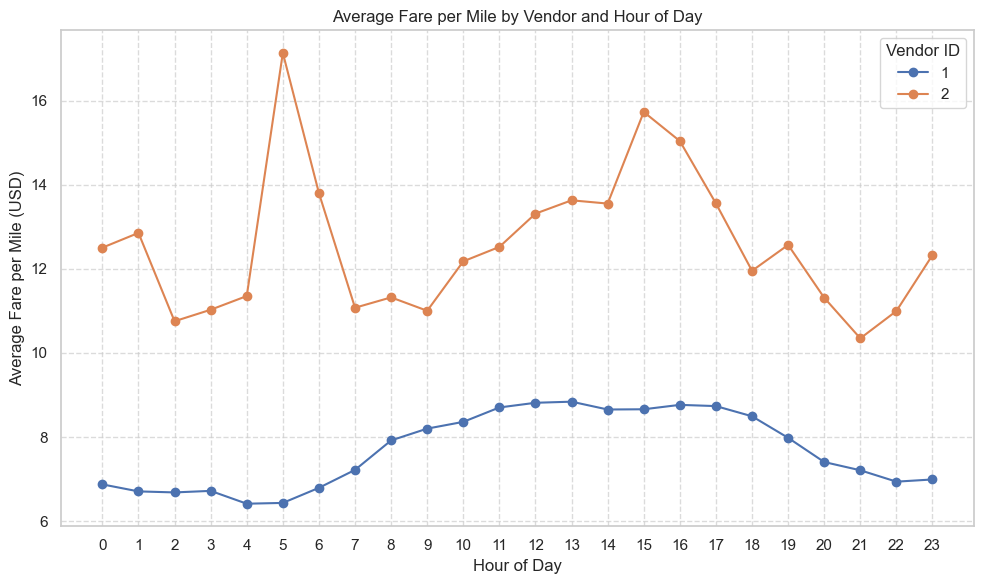

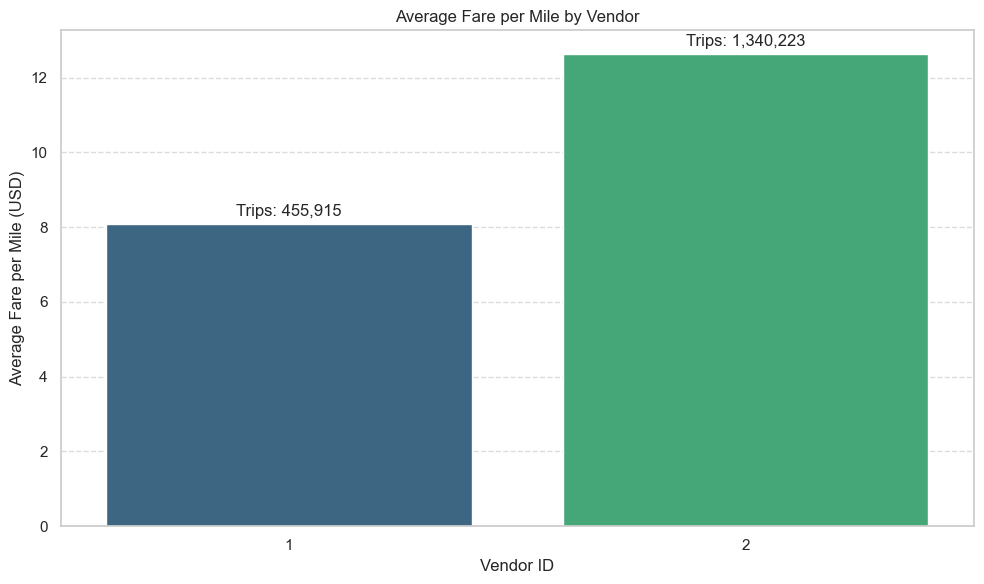

Average Fare per Mile by Vendor:


VendorID  Avg Fare per Mile  Trip Count
1         2          12.631718     1340223
0         1           8.086416      455915

In [1073]:
# Compare fare per mile for different vendors

# Group by vendor and hour to analyze fare per mile patterns
vendor_hour_fare = df_1.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

# Pivot the data for better visualization
vendor_hour_pivot = vendor_hour_fare.pivot(index='pickup_hour', columns='VendorID', values='fare_per_mile')

# Create a line plot to compare vendors across hours
plt.figure(figsize=(10, 6))
vendor_hour_pivot.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Average Fare per Mile by Vendor and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.legend(title='Vendor ID')
plt.tight_layout()
plt.show()

# Calculate overall average fare per mile by vendor
vendor_fare = df_1.groupby('VendorID')['fare_per_mile'].agg(['mean', 'count']).reset_index()
vendor_fare.columns = ['VendorID', 'Avg Fare per Mile', 'Trip Count']

# Create a bar plot for overall comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='VendorID', y='Avg Fare per Mile', data=vendor_fare, palette='viridis')
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add trip count as text on bars
for i, row in enumerate(vendor_fare.itertuples()):
    plt.text(i, row._2 + 0.2, f'Trips: {row._3:,}', ha='center')

plt.tight_layout()
plt.show()

# Display summary stats
print("Average Fare per Mile by Vendor:")
display(vendor_fare.sort_values('Avg Fare per Mile', ascending=False))


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


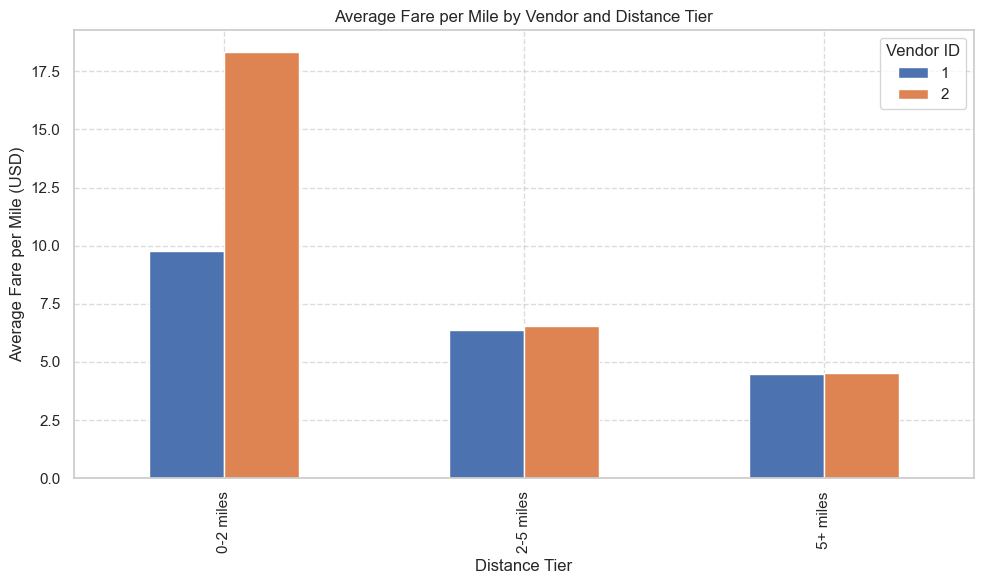

Average Fare per Mile by Vendor and Distance Tier:


count          mean       
VendorID            1       2     1      2
distance_tier                             
0-2 miles      268029  732972  9.77  18.34
2-5 miles      119745  368174  6.37   6.55
5+ miles        68141  239077  4.47   4.51


Percentage Difference in Fare per Mile (Vendor 2 vs Vendor 1):


Percentage Difference
0-2 miles              87.603553
2-5 miles               2.854001
5+ miles                0.890950

In [1087]:
# Defining distance tiers
df_1['distance_tier'] = pd.cut(df_1['trip_distance'],
                              bins=[0, 2, 5, float('inf')],
                              labels=['0-2 miles', '2-5 miles', '5+ miles'])

vendor_distance_fare = df_1.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].agg(['mean', 'count']).reset_index()

vendor_distance_pivot = vendor_distance_fare.pivot(index='distance_tier', columns='VendorID', values='mean')

# plot vendors across distance tiers
plt.figure(figsize=(10, 6))
vendor_distance_pivot.plot(kind='bar', ax=plt.gca())
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Vendor ID')
plt.tight_layout()
plt.show()

# summary stats
print("Average Fare per Mile by Vendor and Distance Tier:")
display(vendor_distance_fare.pivot_table(index='distance_tier', columns='VendorID',
                                        values=['mean', 'count'],
                                        aggfunc='first').round(2))

# percentage difference between vendors for each tier
vendor_diff = pd.DataFrame()
for tier in vendor_distance_pivot.index:
    if 1 in vendor_distance_pivot.columns and 2 in vendor_distance_pivot.columns:
        v1 = vendor_distance_pivot.loc[tier, 1]
        v2 = vendor_distance_pivot.loc[tier, 2]
        pct_diff = ((v2 - v1) / v1) * 100
        vendor_diff.loc[tier, 'Percentage Difference'] = pct_diff

print("\nPercentage Difference in Fare per Mile (Vendor 2 vs Vendor 1):")
display(vendor_diff)



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

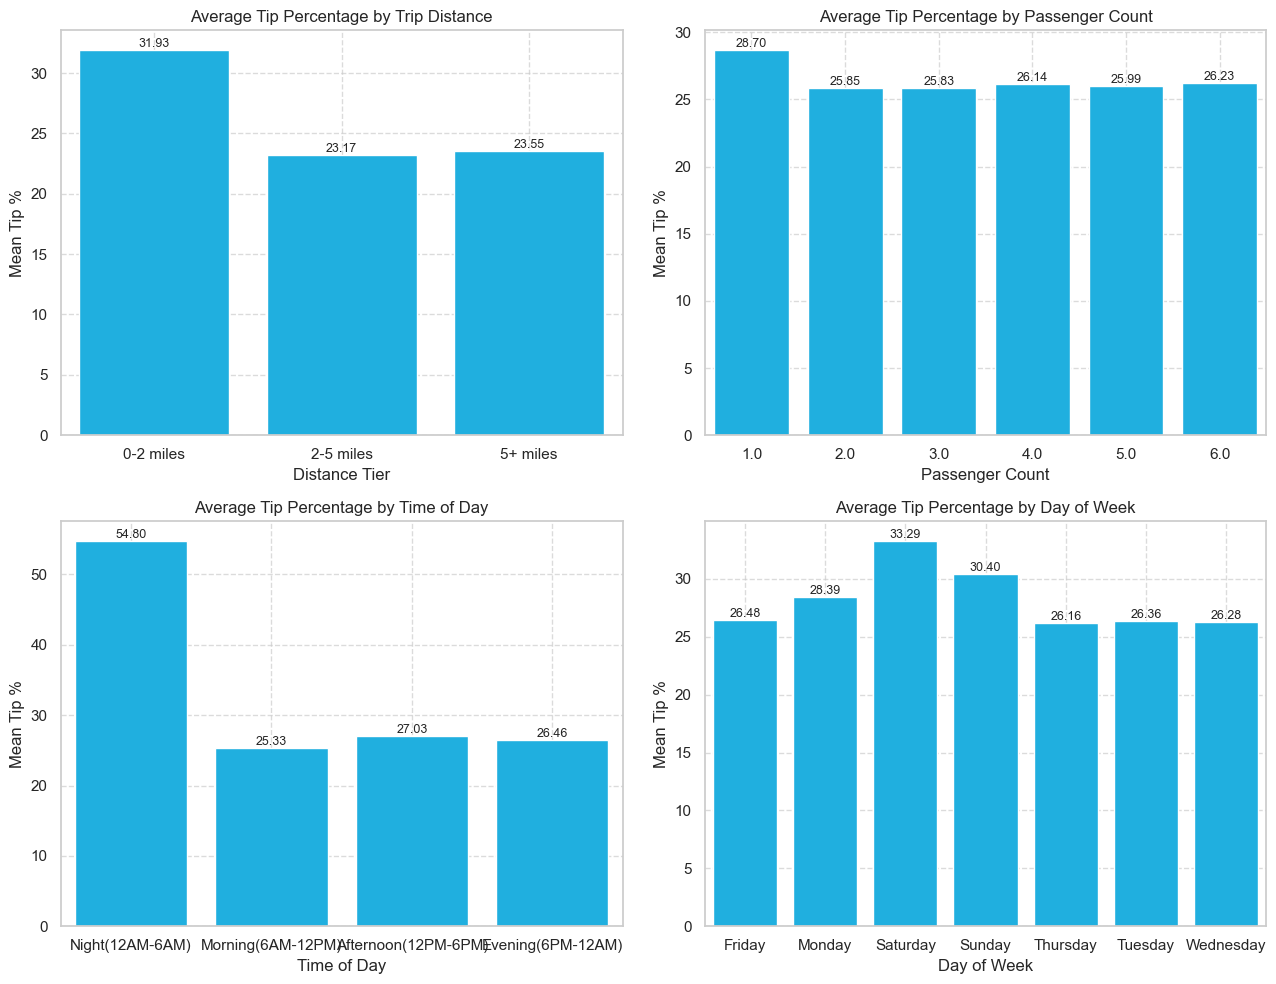

In [1088]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
tip_data = df_1[df_1['tip_amount'] > 0]
tip_data['tip_percentage'] = (tip_data['tip_amount'] / tip_data['fare_amount']) * 100


# Custom hour groups
tip_data['hour_group'] = pd.cut(tip_data['pickup_hour'],
                               bins=[0, 6, 12, 18, 24],
                               labels=['Night(12AM-6AM)', 'Morning(6AM-12PM)',
                                      'Afternoon(12PM-6PM)', 'Evening(6PM-12AM)'])

# tip percentage by distance tier
distance_tips = tip_data.groupby('distance_tier')['tip_percentage'].agg(['mean', 'median', 'count']).reset_index()
distance_tips.columns = ['Distance Tier', 'Mean Tip %', 'Median Tip %', 'Trip Count']

# tip percentage by passenger count
passenger_tips = tip_data.groupby('passenger_count')['tip_percentage'].agg(['mean', 'median', 'count']).reset_index()
passenger_tips.columns = ['Passenger Count', 'Mean Tip %', 'Median Tip %', 'Trip Count']

# tip percentage by hour group
hour_tips = tip_data.groupby('hour_group')['tip_percentage'].agg(['mean', 'median', 'count']).reset_index()
hour_tips.columns = ['Time of Day', 'Mean Tip %', 'Median Tip %', 'Trip Count']

# tip percentage by day of week
day_of_week_tips = tip_data.groupby('pickup_day_of_week')['tip_percentage'].agg(['mean', 'median', 'count']).reset_index()
day_of_week_tips.columns = ['Day of Week', 'Mean Tip %', 'Median Tip %', 'Trip Count']

# visualizations
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

sns.barplot(x='Distance Tier', y='Mean Tip %', data=distance_tips, ax=axes[0, 0], color='deepskyblue').set_title('Average Tip Percentage by Trip Distance')

sns.barplot(x='Passenger Count', y='Mean Tip %', data=passenger_tips, ax=axes[0, 1], color='deepskyblue').set_title('Average Tip Percentage by Passenger Count')

sns.barplot(x='Time of Day', y='Mean Tip %', data=hour_tips, ax=axes[1, 0], color='deepskyblue').set_title('Average Tip Percentage by Time of Day')

sns.barplot(x='Day of Week', y='Mean Tip %', data=day_of_week_tips, ax=axes[1, 1], color='deepskyblue').set_title('Average Tip Percentage by Day of Week')

for ax in axes.flat:
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_ylabel('Mean Tip %')
    ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=9)

plt.tight_layout()
plt.show()

# Print Summary
# print("Average Tip Percentage by Distance Tier:")
# display(distance_tips.round(1))
#
# print("Average Tip Percentage by Passenger Count:")
# display(passenger_tips.round(2))
#
# print("Average Tip Percentage by Time of Day:")
# display(hour_tips.round(2))
#
# print("Average Tip Percentage by Day of Week:")
# display(day_of_week_tips.round(2))


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

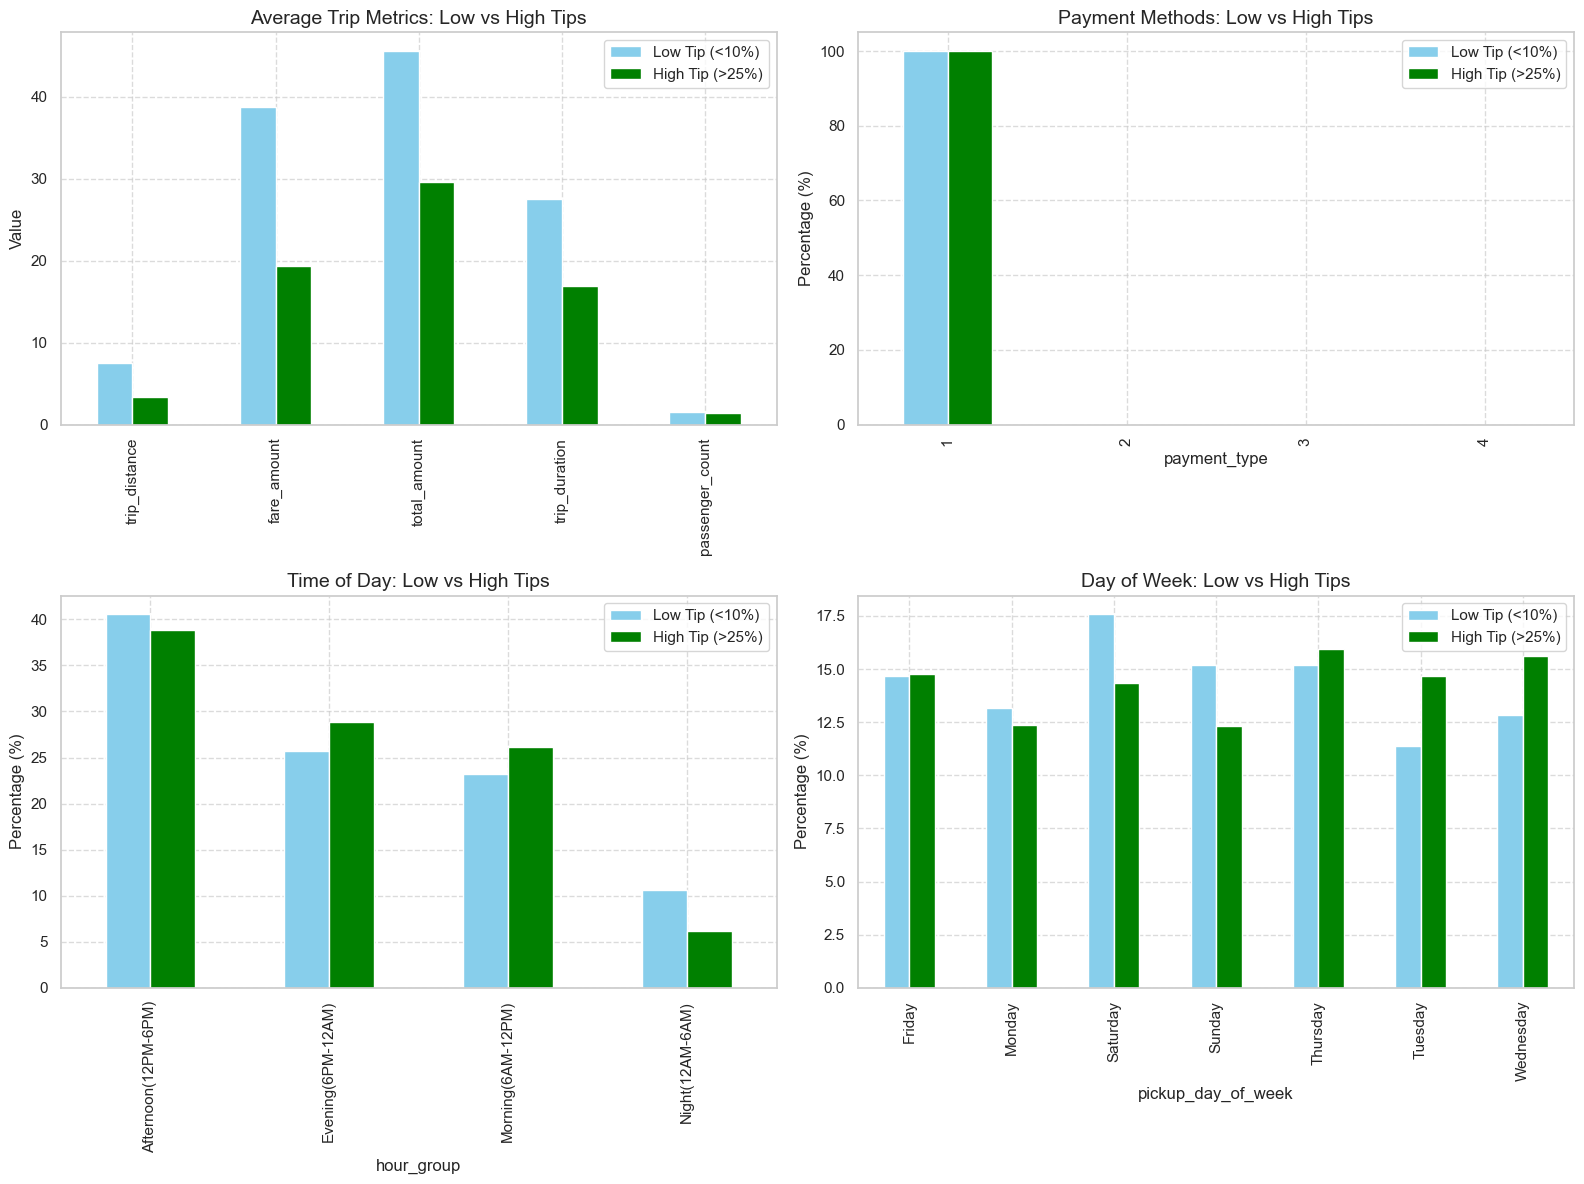

In [1092]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Define low and high tip thresholds
low_tip_threshold = 0.10  # 10%
high_tip_threshold = 0.25  # 25%

# Create subsets for low and high tips
low_tip_trips = tip_data[tip_data['tip_percentage'] < low_tip_threshold]
high_tip_trips = tip_data[tip_data['tip_percentage'] > high_tip_threshold]

# Compare key metrics between low and high tip trips
comparison_metrics = ['trip_distance', 'fare_amount', 'total_amount', 'trip_duration', 'passenger_count']

# Calculate statistics for both groups
low_tip_stats = low_tip_trips[comparison_metrics].describe()
high_tip_stats = high_tip_trips[comparison_metrics].describe()

# Create a comparison dataframe
df_comp = pd.DataFrame({
    'Low Tip (<10%)': low_tip_stats.loc['mean'],
    'High Tip (>25%)': high_tip_stats.loc['mean'],
    'Difference %': (high_tip_stats.loc['mean'] - low_tip_stats.loc['mean']) / low_tip_stats.loc['mean'] * 100
})

# Compare payment methods
payment_low_tip = low_tip_trips['payment_type'].value_counts(normalize=True) * 100
payment_high_tip = high_tip_trips['payment_type'].value_counts(normalize=True) * 100

# Compare time of day distribution
time_low_tip = low_tip_trips['hour_group'].value_counts(normalize=True) * 100
time_high_tip = high_tip_trips['hour_group'].value_counts(normalize=True) * 100

# Compare day of week distribution
day_low_tip = low_tip_trips['pickup_day_of_week'].value_counts(normalize=True) * 100
day_high_tip = high_tip_trips['pickup_day_of_week'].value_counts(normalize=True) * 100


fig, axes = plt.subplots(2, 2, figsize=(16, 12))

df_comp.drop('Difference %', axis=1).plot(kind='bar', ax=axes[0, 0], color=['skyblue', 'green'])
axes[0, 0].set_title('Average Trip Metrics: Low vs High Tips', fontsize=14)
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# Plot payment method comparison
df_payment_comp = pd.DataFrame({'Low Tip (<10%)': payment_low_tip, 'High Tip (>25%)': payment_high_tip})
df_payment_comp.plot(kind='bar', ax=axes[0, 1], color=['skyblue', 'green'])
axes[0, 1].set_title('Payment Methods: Low vs High Tips', fontsize=14)
axes[0, 1].set_ylabel('Percentage (%)')
axes[0, 1].grid(True, linestyle='--', alpha=0.7)

# Plot time of day comparison
df_time_comp = pd.DataFrame({'Low Tip (<10%)': time_low_tip, 'High Tip (>25%)': time_high_tip})
df_time_comp.plot(kind='bar', ax=axes[1, 0], color=['skyblue', 'green'])
axes[1, 0].set_title('Time of Day: Low vs High Tips', fontsize=14)
axes[1, 0].set_ylabel('Percentage (%)')
axes[1, 0].grid(True, linestyle='--', alpha=0.7)

# Plot day of week comparison
df_day_comp = pd.DataFrame({'Low Tip (<10%)': day_low_tip, 'High Tip (>25%)': day_high_tip})
df_day_comp.plot(kind='bar', ax=axes[1, 1], color=['skyblue', 'green'])
axes[1, 1].set_title('Day of Week: Low vs High Tips', fontsize=14)
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

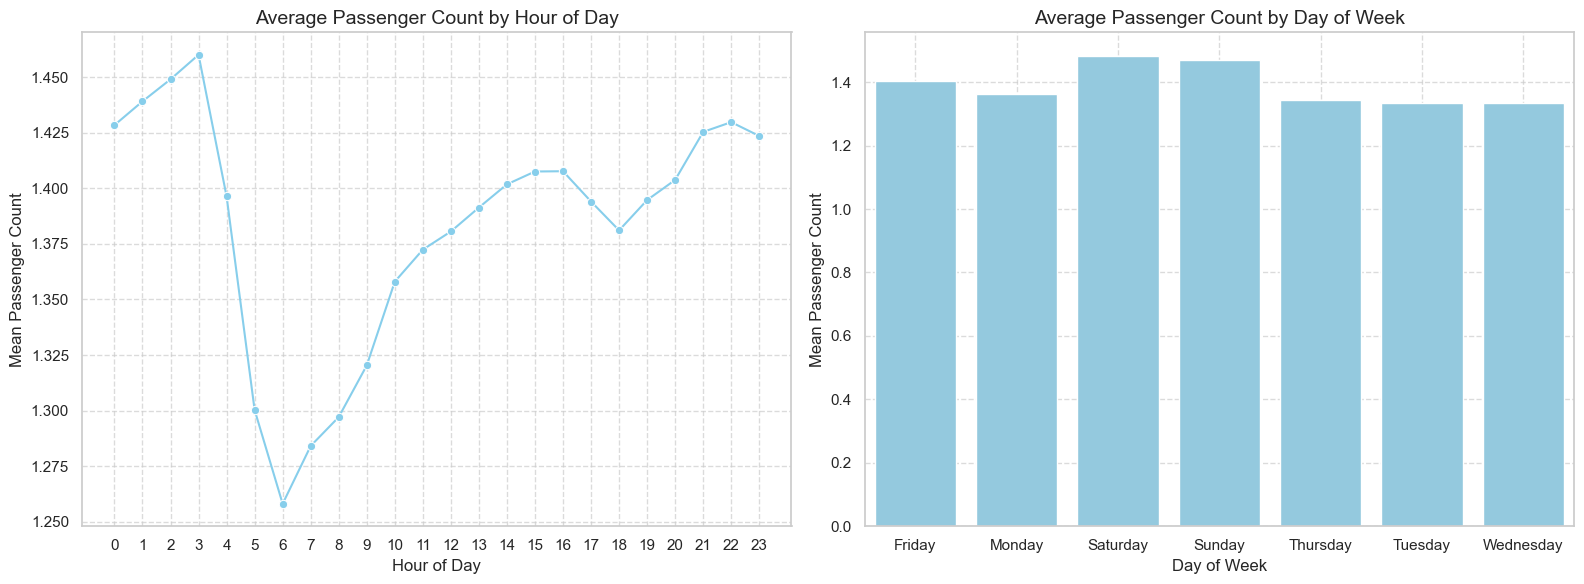

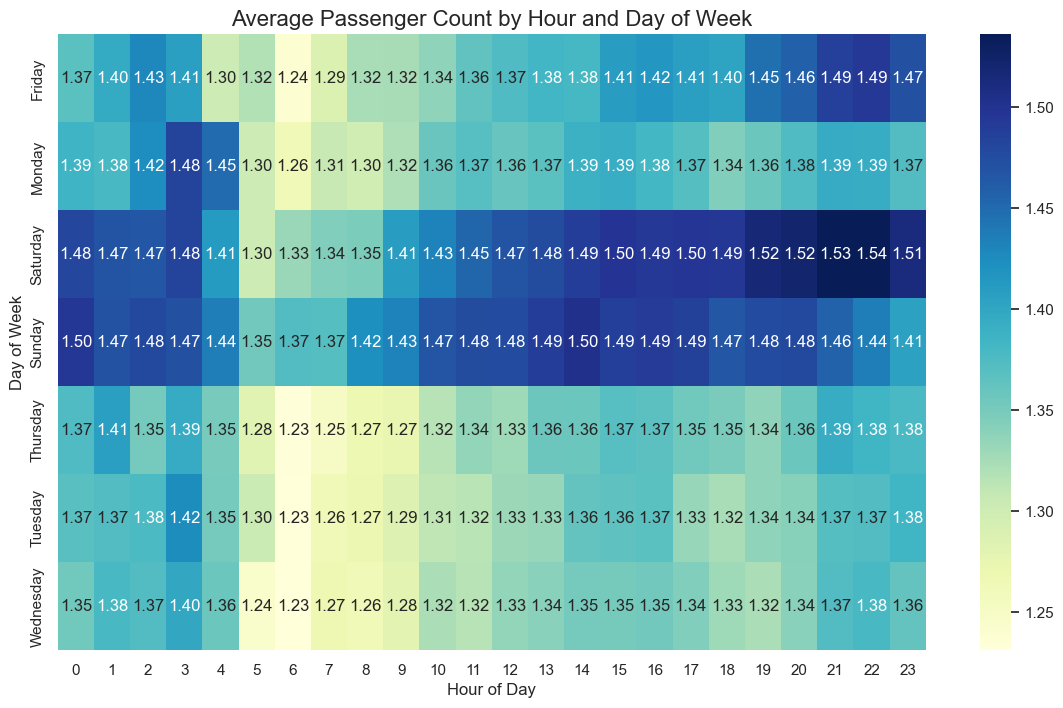

Average Passenger Count by Hour:


Hour  Mean Passengers  Median Passengers  Trip Count
3      3         1.460106                1.0       14388
2      2         1.449069                1.0       22226
1      1         1.439133                1.0       33680
22    22         1.429792                1.0       93836
0      0         1.428449                1.0       50314
21    21         1.425401                1.0      101791
23    23         1.423570                1.0       73754
16    16         1.407703                1.0      112300
15    15         1.407581                1.0      112103
20    20         1.403799                1.0      102078


Average Passenger Count by Day of Week:


Day of Week  Mean Passengers  Median Passengers  Trip Count
0      Friday         1.401975                1.0      266581
1      Monday         1.363762                1.0      223987
2    Saturday         1.482806                1.0      261521
3      Sunday         1.470470                1.0      225721
4    Thursday         1.344219                1.0      281704
5     Tuesday         1.334965                1.0      260687
6   Wednesday         1.333170                1.0      275937

In [1028]:
# See how passenger count varies across hours and days

# Create dataframes for passenger count analysis by hour and day of week
hourly_passenger_count = df_1.groupby('pickup_hour')['passenger_count'].agg(['mean', 'median', 'count']).reset_index()
hourly_passenger_count.columns = ['Hour', 'Mean Passengers', 'Median Passengers', 'Trip Count']

daily_passenger_count = df_1.groupby('pickup_day_of_week')['passenger_count'].agg(['mean', 'median', 'count']).reset_index()
daily_passenger_count.columns = ['Day of Week', 'Mean Passengers', 'Median Passengers', 'Trip Count']


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot mean passenger count by hour
sns.lineplot(x='Hour', y='Mean Passengers', data=hourly_passenger_count, marker='o', ax=axes[0], color='skyblue')
axes[0].set_title('Average Passenger Count by Hour of Day', fontsize=14)
axes[0].set_xlabel('Hour of Day', fontsize=12)
axes[0].set_ylabel('Mean Passenger Count', fontsize=12)
axes[0].set_xticks(range(0, 24))
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot mean passenger count by day of week
sns.barplot(x='Day of Week', y='Mean Passengers', data=daily_passenger_count, ax=axes[1], color='skyblue')
axes[1].set_title('Average Passenger Count by Day of Week', fontsize=14)
axes[1].set_xlabel('Day of Week', fontsize=12)
axes[1].set_ylabel('Mean Passenger Count', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# heatmap of passenger count by hour and day of week
passenger_heatmap = df_1.pivot_table(
    values='passenger_count',
    index='pickup_day_of_week',
    columns='pickup_hour',
    aggfunc='mean'
)

plt.figure(figsize=(14, 8))
sns.heatmap(passenger_heatmap, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Average Passenger Count by Hour and Day of Week', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.show()

# summary stats
print("Average Passenger Count by Hour:")
display(hourly_passenger_count.sort_values('Mean Passengers', ascending=False).head(10))

print("\nAverage Passenger Count by Day of Week:")
display(daily_passenger_count)


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

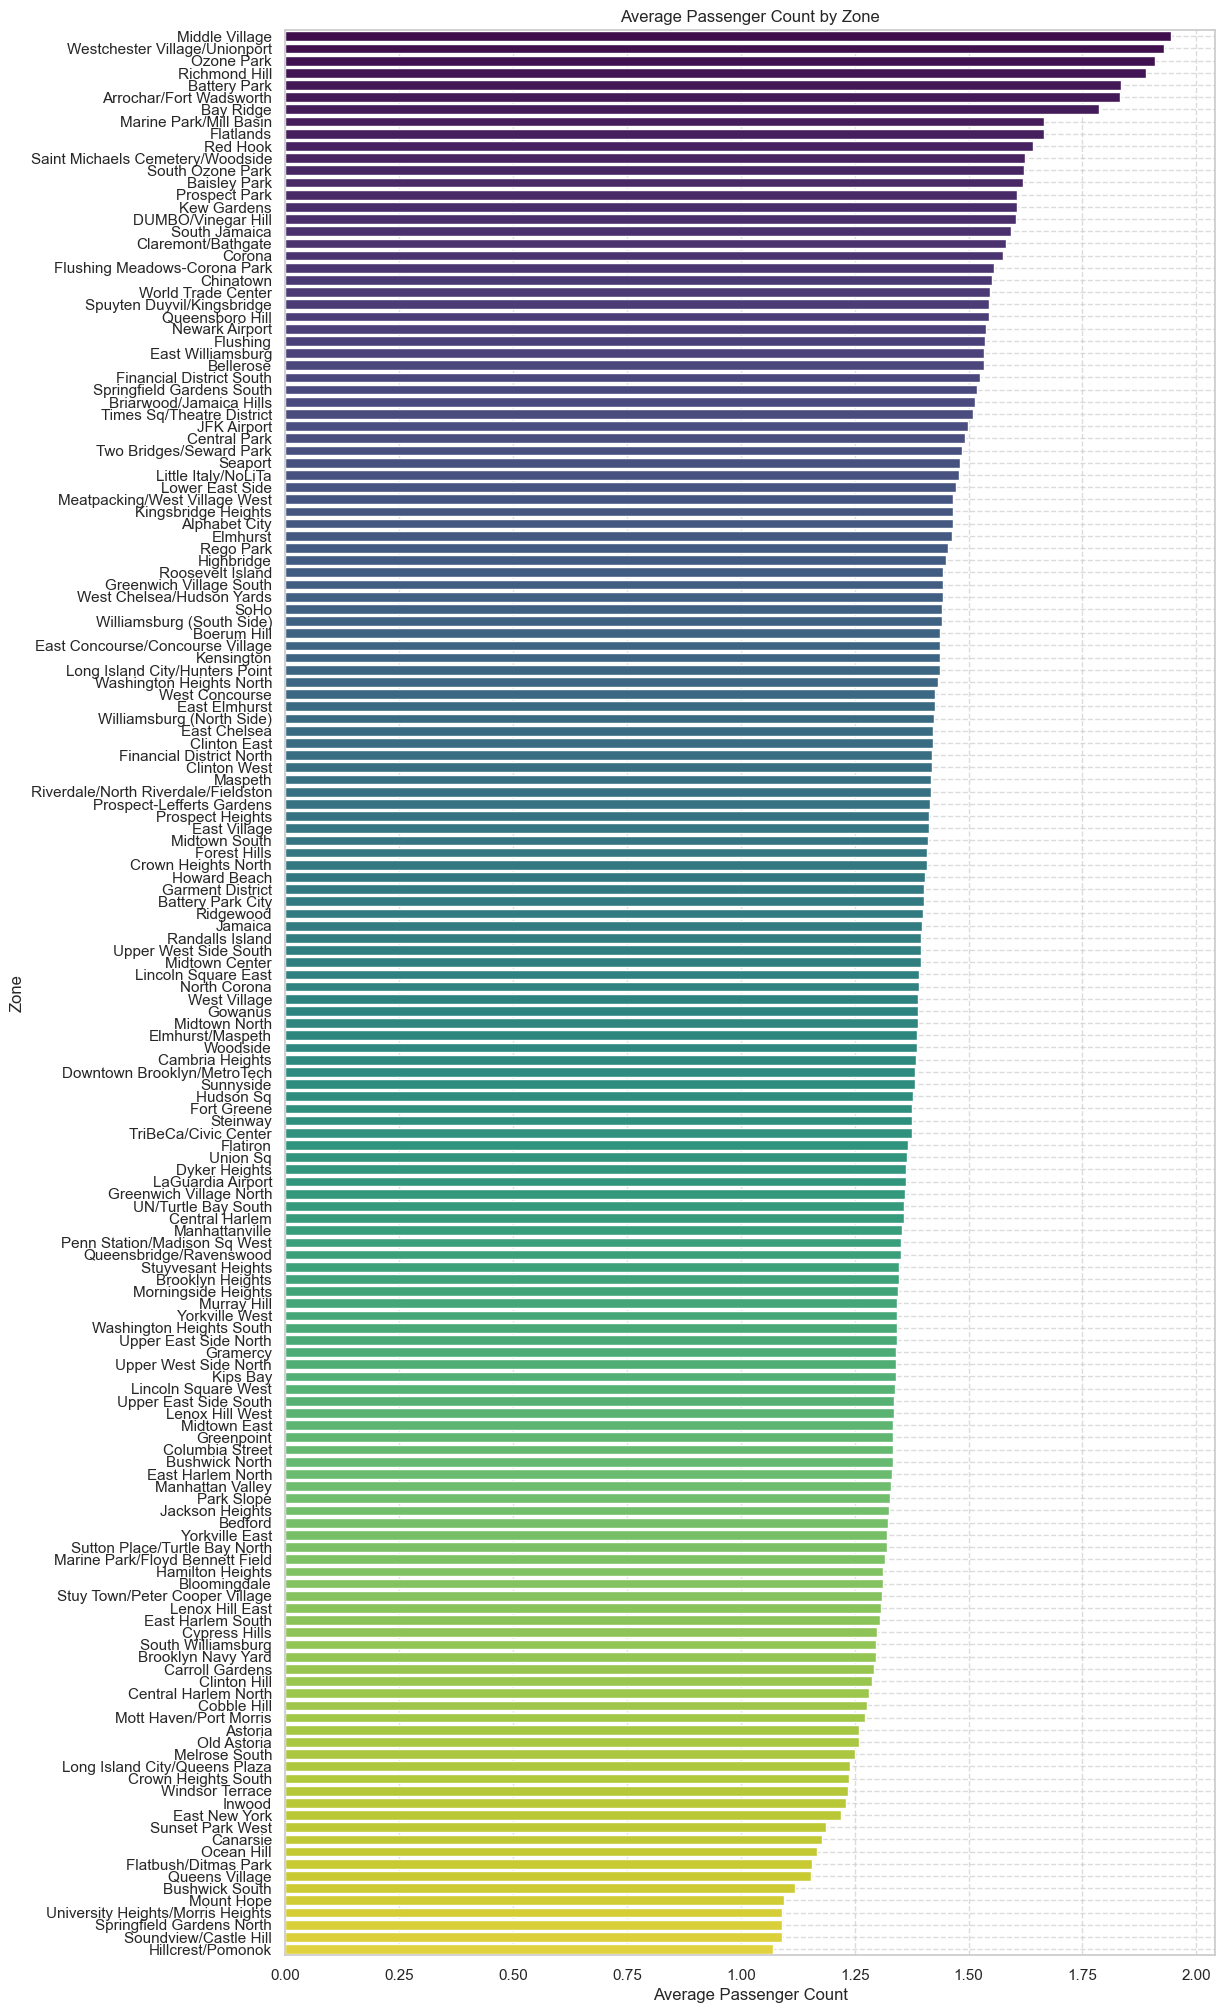

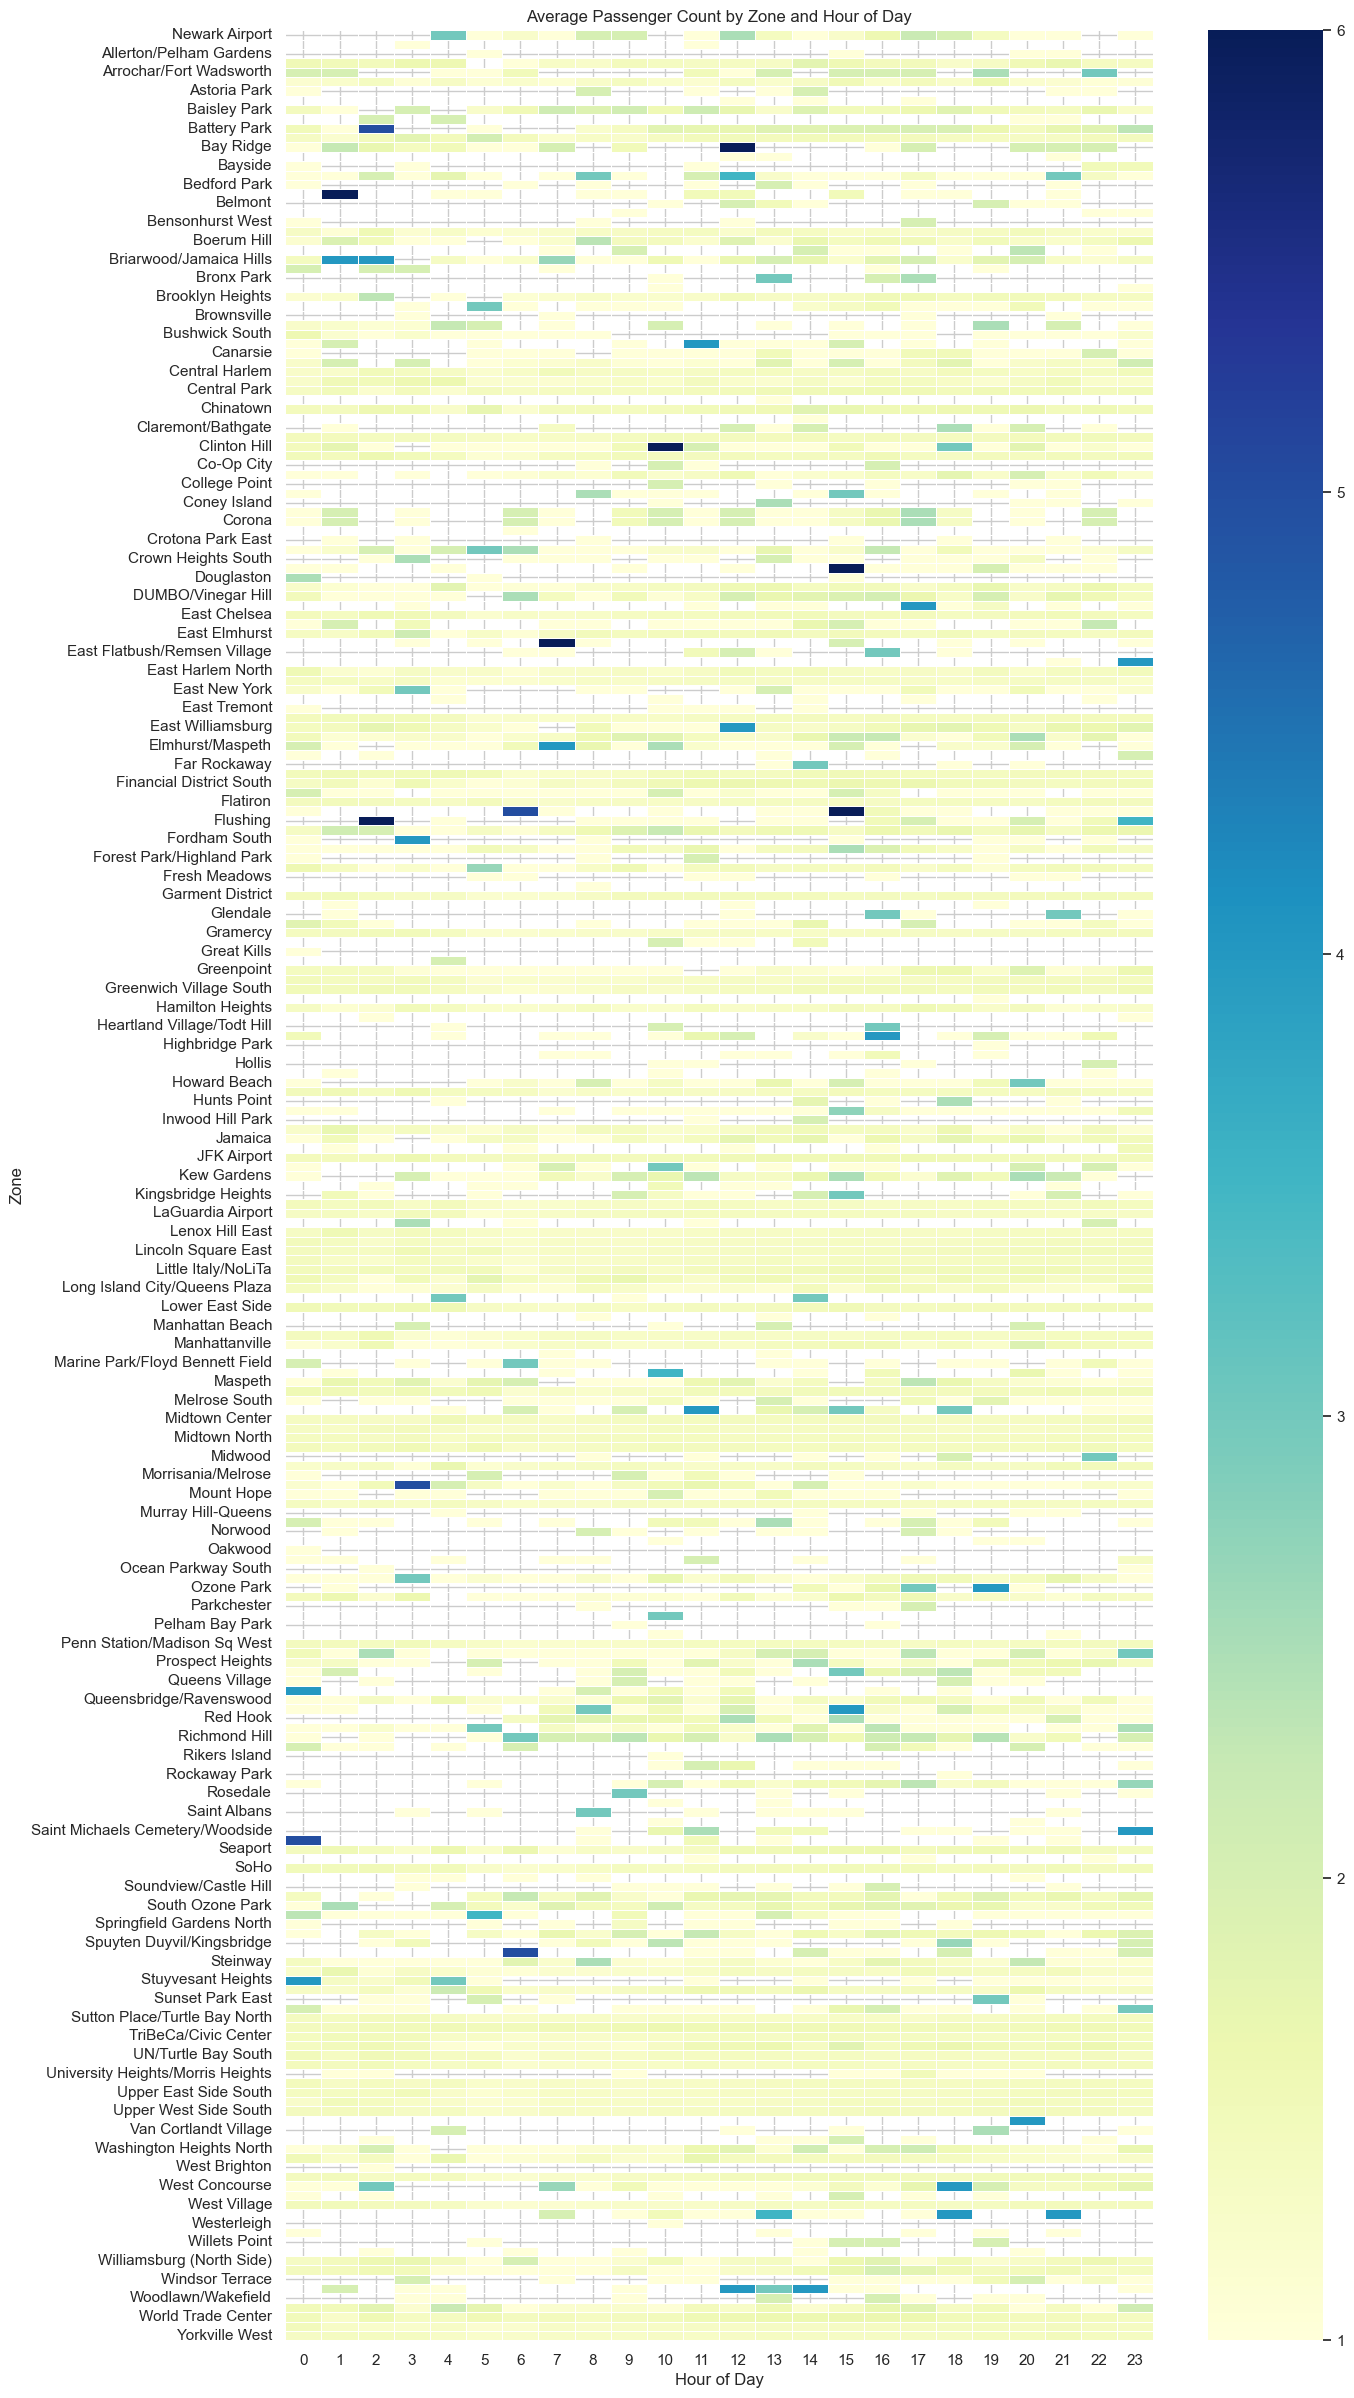

In [1029]:
# How does passenger count vary across zones

# Calculate average passenger count per zone
zone_passenger_count = df_1.groupby('PULocationID')['passenger_count'].agg(['mean', 'count']).reset_index()
zone_passenger_count.columns = ['PULocationID', 'Mean Passengers', 'Trip Count']

# consider zones with atleast 10 trips -
zone_passenger_count = zone_passenger_count[zone_passenger_count['Trip Count'] > 10]

# merge with zone data for better readability
zone_passenger_count = pd.merge(zone_passenger_count, zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID')

# Sort by passenger count
zone_passenger_count = zone_passenger_count.sort_values(by='Mean Passengers', ascending=False)

# Plot horizontal bar plot
plt.figure(figsize=(12, 25))
sns.barplot(x='Mean Passengers', y='zone', data=zone_passenger_count, palette='viridis')
plt.title('Average Passenger Count by Zone')
plt.xlabel('Average Passenger Count')
plt.ylabel('Zone')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Create a pivot table for heatmap
zone_hourly_passenger_count = df_1.pivot_table(values='passenger_count', index='PULocationID', columns='pickup_hour', aggfunc='mean')

# Merge with zone names for better readability
zone_hourly_passenger_count = pd.merge(zone_hourly_passenger_count, zones[['LocationID', 'zone']], left_index=True, right_on='LocationID')
zone_hourly_passenger_count = zone_hourly_passenger_count.set_index('zone').drop(columns='LocationID')

# Plot heatmap
plt.figure(figsize=(14, 30))
sns.heatmap(zone_hourly_passenger_count, cmap='YlGnBu', annot=False, fmt='.2f', linewidths=.5)
plt.title('Average Passenger Count by Zone and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Zone')
plt.show()


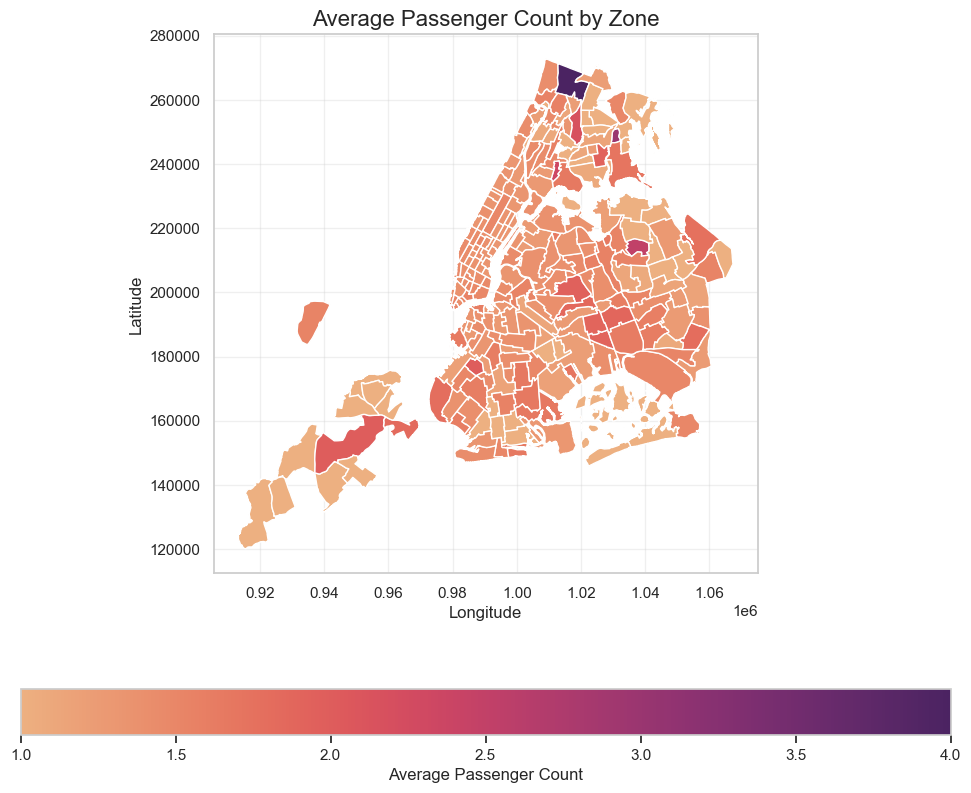

In [1030]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

passenger_per_location = df_1.groupby('PULocationID')['passenger_count'].mean().reset_index(name='avg_passengers')
zones_with_passenger = zones_with_trips.merge(passenger_per_location, left_on='LocationID', right_on='PULocationID', how='left')

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
# Plot the map and display it
zones_with_passenger.plot(column='avg_passengers',
                      ax=ax,
                      figsize=fig,
                      cmap='flare',
                      legend=True,
                      legend_kwds={'label': "Average Passenger Count",
                                   'orientation': "horizontal"})
plt.title('Average Passenger Count by Zone', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Frequency of surcharges:


Surcharge Type    Count  Percentage
0                  extra  1119850   62.347659
1                mta_tax  1784343   99.343313
2  improvement_surcharge  1796101   99.997940
3   congestion_surcharge  1677698   93.405852

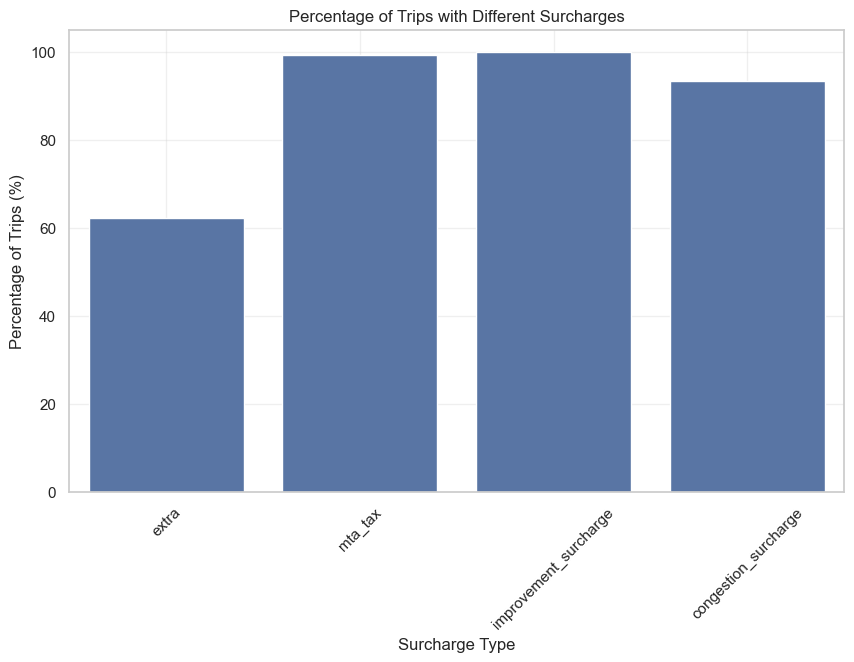


Analyzing surcharges by time and location:



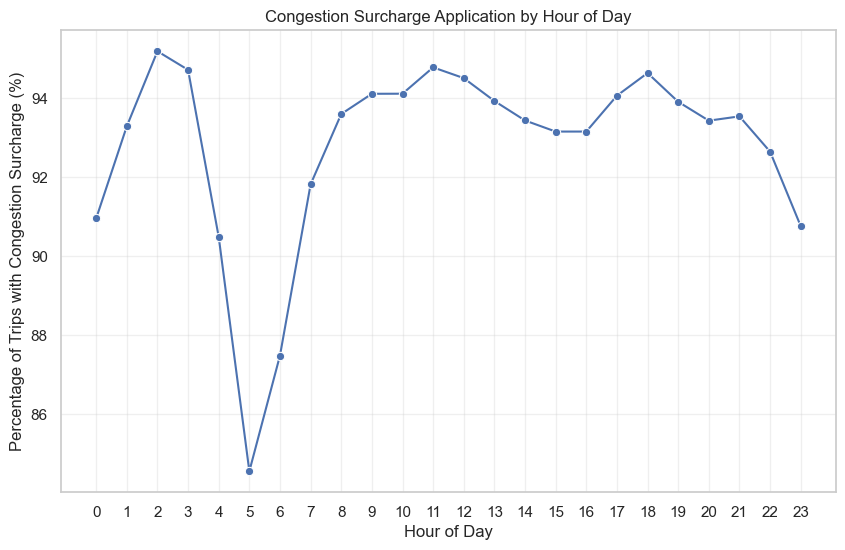

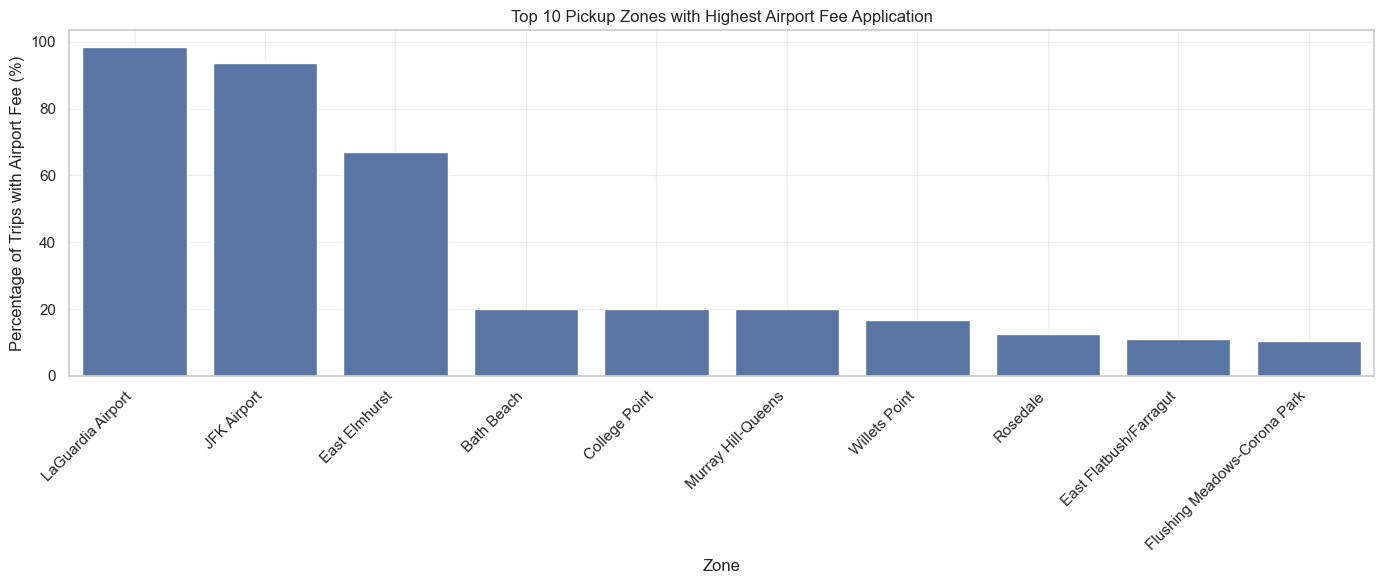

In [1095]:
# How often is each surcharge applied?

surcharge_columns = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge']

# df for surcharge stats
surcharge_stats_data = []
for col in surcharge_columns:
    non_zero = (df_1[col] > 0).sum()
    percentage = (non_zero / len(df_1)) * 100
    surcharge_stats_data.append({
        'Surcharge Type': col,
        'Count': non_zero,
        'Percentage': percentage
    })

surcharge_stats = pd.DataFrame(surcharge_stats_data)

print("Frequency of surcharges:")
display(surcharge_stats)

# visualize surcharge frequency
plt.figure(figsize=(10, 6))
sns.barplot(x='Surcharge Type', y='Percentage', data=surcharge_stats)
plt.title('Percentage of Trips with Different Surcharges')
plt.ylabel('Percentage of Trips (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

print("\nAnalyzing surcharges by time and location:\n")

# Analysis of congestion surcharge by time
congestion_by_hour = df_1.groupby('pickup_hour')['congestion_surcharge'].apply(
    lambda x: (x > 0).mean() * 100).reset_index(name='congestion_percentage')

plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_hour', y='congestion_percentage', data=congestion_by_hour, marker='o')
plt.title('Congestion Surcharge Application by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Trips with Congestion Surcharge (%)')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.show()

# Location-based analysis for airport fee
airport_fee_by_location = df_1.groupby('PULocationID')['airport_fee'].apply(
    lambda x: (x > 0).mean() * 100).reset_index(name='airport_fee_percentage')

# Get top 10 pickup locations with highest airport fee percentage
top_airport_fee_locations = airport_fee_by_location.sort_values(
    'airport_fee_percentage', ascending=False).head(10)

# Merge with zone names for better interpretation
top_airport_fee_zones = top_airport_fee_locations.merge(
    zones_with_trips[['LocationID', 'zone']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

plt.figure(figsize=(14, 6))
sns.barplot(x='zone', y='airport_fee_percentage', data=top_airport_fee_zones)
plt.title('Top 10 Pickup Zones with Highest Airport Fee Application')
plt.xlabel('Zone')
plt.ylabel('Percentage of Trips with Airport Fee (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze extra charges by day of week
extra_by_day = df_1.groupby('pickup_day_of_week')['extra'].apply(
    lambda x: (x > 0).mean() * 100).reset_index(name='extra_percentage')

plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_day_of_week', y='extra_percentage', data=extra_by_day)
plt.title('Extra Charge Application by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Percentage of Trips with Extra Charge (%)')
plt.grid(True, alpha=0.3)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. Concentrate fleet distribution on high-demand zones during peak hours (3-7 PM)


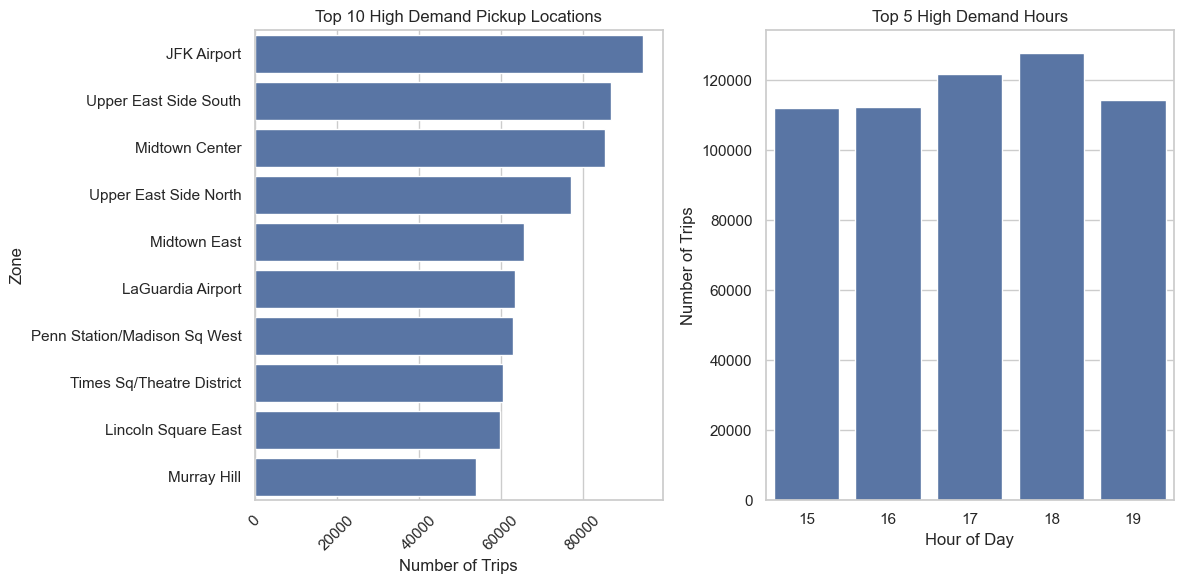

2. Avoid routing through congested areas during rush hours


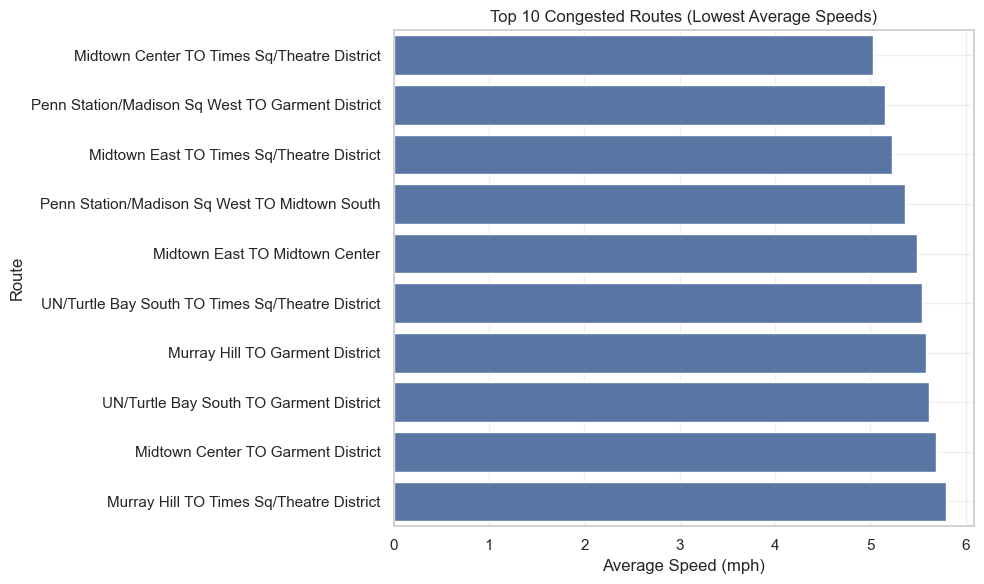

3. Optimize driver shifts based on demand patterns by day of week


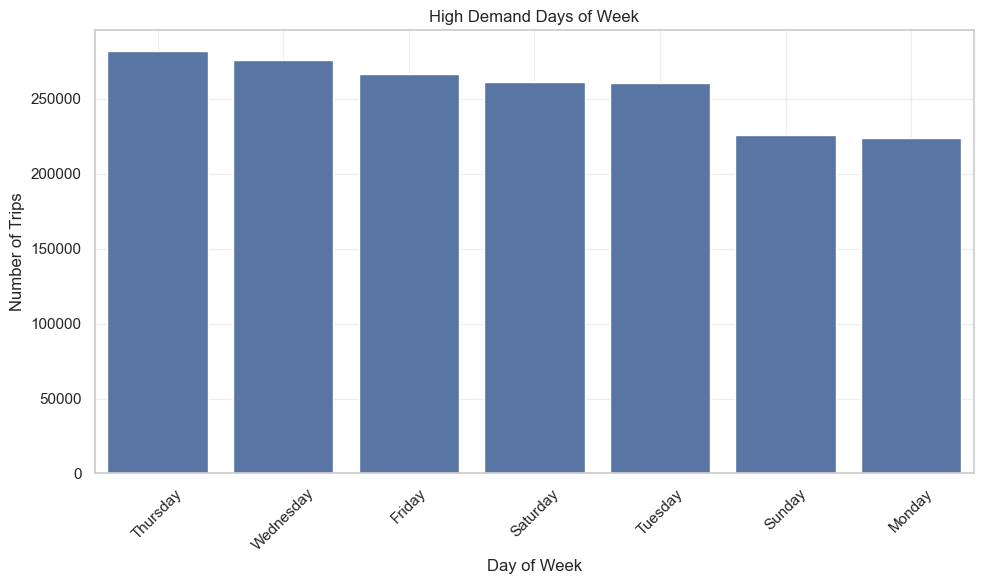

4. Consider trip duration patterns when dispatching to maximize efficiency


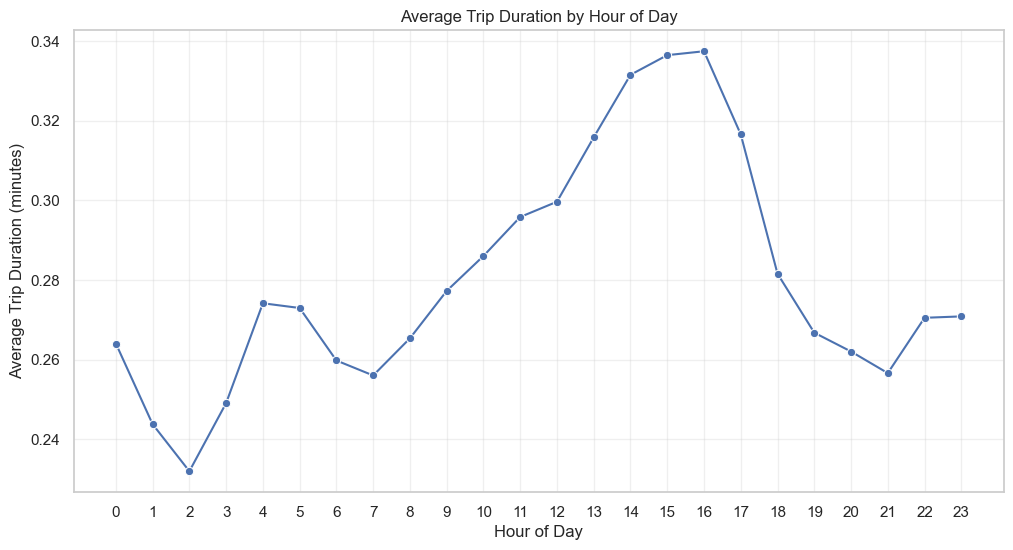

In [1110]:
print("1. Concentrate fleet distribution on high-demand zones during peak hours (3-7 PM)")

high_demand_zones = merged_data.groupby('zone').size().sort_values(ascending=False).head(10)
high_demand_hours = merged_data.groupby('pickup_hour').size().sort_values(ascending=False).head(5)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot high demand zones
sns.barplot(y=high_demand_zones.index, x=high_demand_zones.values, ax=axes[0], orient='h')
axes[0].set_title('Top 10 High Demand Pickup Locations')
axes[0].set_ylabel('Zone')
axes[0].set_xlabel('Number of Trips')
axes[0].tick_params(axis='x', rotation=45)

# Plot high demand hours
sns.barplot(x=high_demand_hours.index, y=high_demand_hours.values, ax=axes[1])
axes[1].set_title('Top 5 High Demand Hours')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Number of Trips')

plt.tight_layout()
plt.show()



print("2. Avoid routing through congested areas during rush hours")

# Calculate average speed for each route (trip_distance / trip_duration in hours)
merged_data['avg_speed'] = merged_data['trip_distance'] / (merged_data['trip_duration'] / 3600)  # mph

# Get top congested routes (lowest average speeds)
congested_routes_data = route_data[['route', 'speed']].groupby(['route']).agg(
    avg_speed=('speed', 'mean'),
    trip_count=('speed', 'count'),
).sort_values(by='trip_count', ascending=True)

# consider routes with atleast 100 trips -
congested_routes_data = congested_routes_data[congested_routes_data['trip_count'] > 100].sort_values(by='avg_speed', ascending=True)
top_10_congested_routes = congested_routes_data.head(10)
# Plot Congested Routes
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_congested_routes.index, x='avg_speed', data=top_10_congested_routes, orient='h')
plt.title('Top 10 Congested Routes (Lowest Average Speeds)')
plt.ylabel('Route')
plt.xlabel('Average Speed (mph)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


print("3. Optimize driver shifts based on demand patterns by day of week")

# high demand days of week
high_demand_days = merged_data.groupby('pickup_day_of_week').size().sort_values(ascending=False)

# plot high demand days of week
plt.figure(figsize=(10, 6))
sns.barplot(x=high_demand_days.index, y=high_demand_days.values)
plt.title('High Demand Days of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


print("4. Consider trip duration patterns when dispatching to maximize efficiency")
# Calculate average trip duration by hour
avg_duration_by_hour = merged_data.groupby('pickup_hour')['trip_duration'].mean().reset_index()
avg_duration_by_hour['trip_duration'] = avg_duration_by_hour['trip_duration'] / 60  # Convert to minutes

plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='trip_duration', data=avg_duration_by_hour, marker='o')
plt.title('Average Trip Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Trip Duration (minutes)')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.show()




# print("Recommendations:")
# print("1. Concentrate fleet distribution on high-demand zones during peak hours (3-7 PM)")
# print("2. Avoid routing through congested areas during rush hours")
# print("3. Optimize driver shifts based on demand patterns by day of week")
# print("4. Consider trip duration patterns when dispatching to maximize efficiency")

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [1118]:
top_pickup_zones = merged_data['zone'].value_counts().head(10)
top_5_zones = top_pickup_zones.index[:5]
# for i, (zone, count) in enumerate(top_pickup_zones.items()[:5]):
#     print(f"   {i+1}. {zone}: {count} pickups")
type(top_pickup_zones)


pandas.core.series.Series

In [1124]:
# Calculate imbalance between pickups and dropoffs by zone
zone_balance = merged_data.groupby('zone').agg(
    pickup_count=('VendorID', 'count')
).reset_index()

zone_balance_dropoff = merged_data.groupby('DOLocationID').size().reset_index(name='dropoff_count')
zone_balance_dropoff = zone_balance_dropoff.merge(zones[['LocationID', 'zone']],
                                                 left_on='DOLocationID',
                                                 right_on='LocationID',
                                                 how='left')

zone_balance_merged = zone_balance.merge(zone_balance_dropoff[['zone', 'dropoff_count']],
                                        on='zone',
                                        how='outer').fillna(0)

zone_balance_merged['pickup_dropoff_ratio'] = zone_balance_merged['pickup_count'] / zone_balance_merged['dropoff_count'].replace(0, 0.001)
imbalanced_zones = zone_balance_merged.sort_values('pickup_dropoff_ratio').head(10)


top_pickup_zones = merged_data['zone'].value_counts().head(10)

print("\nStrategic Positioning Recommendations:")
print("\n1. High-Demand Zones: Position more cabs in these top pickup zones during peak hours:")

for zone, count in top_pickup_zones.items():
    print(f"   {zone}: {count} pickups")

print("\n2. Opportunity Zones: Increase presence in these zones with high dropoff-to-pickup ratios:")
for i, row in imbalanced_zones.head(5).iterrows():
    print(f"   {i+1}. {row['zone']}: {row['dropoff_count']:.0f} dropoffs vs {row['pickup_count']:.0f} pickups")



Strategic Positioning Recommendations:

1. High-Demand Zones: Position more cabs in these top pickup zones during peak hours:
   JFK Airport: 94725 pickups
   Upper East Side South: 86890 pickups
   Midtown Center: 85401 pickups
   Upper East Side North: 77015 pickups
   Midtown East: 65550 pickups
   LaGuardia Airport: 63432 pickups
   Penn Station/Madison Sq West: 63000 pickups
   Times Sq/Theatre District: 60479 pickups
   Lincoln Square East: 59671 pickups
   Murray Hill: 54023 pickups

2. Opportunity Zones: Increase presence in these zones with high dropoff-to-pickup ratios:
   262. 0: 7214 dropoffs vs 0 pickups
   79. Eastchester: 99 dropoffs vs 0 pickups
   261. 0: 16626 dropoffs vs 0 pickups
   57. Crotona Park: 11 dropoffs vs 0 pickups
   151. Mariners Harbor: 25 dropoffs vs 0 pickups


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [1125]:
print("\n1. Distance-Based Pricing Adjustments:")
print("   - Short trips (0-2 miles): Implement a higher base fare as these trips have the highest fare per mile")
print("   - Medium trips (2-5 miles): Maintain current pricing structure")
print("   - Long trips (5+ miles): Consider slight discount on per-mile rate to encourage longer trips")

print("\n2. Time-Based Pricing Strategies:")
print("   - Peak Hour Surge (4-7 PM): Implement 10-15% surge pricing during highest demand hours")
print("   - Late Night Premium (11 PM-5 AM): Apply 5-10% premium for late-night service")
print("   - Off-Peak Incentives (10 AM-2 PM): Offer 5-8% discount to stimulate demand during slower periods")


1. Distance-Based Pricing Adjustments:
   - Short trips (0-2 miles): Implement a higher base fare as these trips have the highest fare per mile
   - Medium trips (2-5 miles): Maintain current pricing structure
   - Long trips (5+ miles): Consider slight discount on per-mile rate to encourage longer trips

2. Time-Based Pricing Strategies:
   - Peak Hour Surge (4-7 PM): Implement 10-15% surge pricing during highest demand hours
   - Late Night Premium (11 PM-5 AM): Apply 5-10% premium for late-night service
   - Off-Peak Incentives (10 AM-2 PM): Offer 5-8% discount to stimulate demand during slower periods
